## Default of Credit Card Clients
## Decision tree type analysis

In [42]:
from joblib import Memory #cache purpose
pwd = "./default/"
cache_dir = pwd + 'cache_dir'
mem = Memory(cache_dir)
output_path = './output/'

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1) #rename mal-nomers
df_original =df_original.rename({
                                'PAY_0' : 'PAY_1',
                                'default payment next month':'default'},axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column]
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
rename_dict = {}
for column in BILL+PAY:
    rename_dict[column]=column[:-1]+'_'+column[-1]
df_original = df_original.rename(rename_dict, axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column] #columns with BILL_AMT_n
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
df = df_original.copy()
N_labels = [column for column in df_original.columns if column !='default']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train, label_train= df[N_labels].loc[train_index],df.default[train_index]
    df_test, label_test= df[N_labels].loc[test_index], df.default[test_index]
    
def to_csv(arr,train_or_test='train',name=None):   #to_csv
    df = pd.DataFrame(arr)
    if type(name)==str:
        df.to_csv(f'{output_path}/{name}_{train_or_test}.csv', index = False )
    else:
        df.to_csv(f'{output_path}/{train_or_test}.csv', index = False )

In [43]:
# for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
#     X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
#     X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]
#X_train ,y_train= df_train.iloc[:150,:] ,label_train.iloc[:150]
X_train ,y_train= df_train,label_train
#X,y= df_train.iloc[:300,:] ,label_train.iloc[:300]

In [44]:
from pyts.transformation import BagOfPatterns as BOP
from mods_defaults import ElementaryExtractor,BasicTransformer,MyMulPyts, NonTsPass #for pickle (cache)purpose
my_basic = BasicTransformer()
t_df = my_basic.fit_transform(X_train)
print(t_df.columns)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
L_PAY = [column for column in t_df.columns if 'log_PAY' in column]
L_BILL = [column for column in t_df.columns if 'log_BILL' in column]
L_USAGE =  [column for column in t_df.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in t_df.columns if 'log_DIFF' in column]
print(len(L_PAY))

Index(['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_BILL_AMT_1',
       'log_BILL_AMT_2', 'log_BILL_AMT_3', 'log_BILL_AMT_4', 'log_BILL_AMT_5',
       'log_BILL_AMT_6', 'log_PAY_AMT_1', 'log_PAY_AMT_2', 'log_PAY_AMT_3',
       'log_PAY_AMT_4', 'log_PAY_AMT_5', 'log_PAY_AMT_6', 'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_0', 'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4'],
      dtype='object')
6


In [45]:
my_basic = BasicTransformer(scale="")
t_df = my_basic.fit_transform(X_train)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
USAGE =  [column for column in t_df.columns if 'USAGE' in column]
DIFF =  [column for column in t_df.columns if 'DIFF' in column]
len(USAGE+DIFF)

10

In [46]:
from sklearn.pipeline import Pipeline
# SVCs
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# pipeline
from sklearn.pipeline import make_union
# evaluation modules
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    print(f'accuracy : {accuracy}')
    pre_score = precision_score(y_train,y_pred)
    print(f'precision : {pre_score}')
    rec_score = recall_score(y_train,y_pred)
    print(f'recall : {rec_score}')
    f_score = f1_score(y_train,y_pred)
    print(f'f1_score: {f_score}')

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]



In [47]:
for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
    X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
    X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]

In [48]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=None):
    if ax is None:
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-',label="recall")
        plt.xlabel("thresholds")
        plt.legend(loc="upper left")
        plt.ylim([0,1])
    else:
        ax.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        ax.plot(thresholds, recalls[:-1], 'g-',label="recall")
        ax.set_xlabel("thresholds")
        ax.legend(loc="upper left")
        ax.set_ylim([0,1])


In [49]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[L_USAGE,L_DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([L_USAGE,L_DIFF])


extractors = [NonTsPass(),length_5_bop,length_6_bop,my_elementary_trans_5,my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor

FeatureUnion(transformer_list=[('nontspass', NonTsPass()),
                               ('mymulpyts-1',
                                MyMulPyts(channel_list=[['log_USAGE_1',
                                                         'log_USAGE_2',
                                                         'log_USAGE_3',
                                                         'log_USAGE_4',
                                                         'log_USAGE_5'],
                                                        ['log_DIFF_0',
                                                         'log_DIFF_1',
                                                         'log_DIFF_2',
                                                         'log_DIFF_3',
                                                         'log_DIFF_4']],
                                          estimator=BagOfPatterns(n_bins=3,
                                                                  sparse=False,
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('mymulpyts-2',
                                MyMul...
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('elementaryextractor-1',
                                ElementaryExtractor(channel_list=[['log_USAGE_1',
                                                                   'log_USAGE_2',
                                                                   'log_USAGE_3',
                                                                   'log_USAGE_4',
                                                                   'log_USAGE_5'],
                                                                  ['log_DIFF_0',
                                                                   'log_DIFF_1',
                                                                   'log_DIFF_2',
                                                                   'log_DIFF_3',
                                                                   'log_DIFF_4']])),
                               ('elementaryextractor-2',
                                ElementaryExtractor(channel_list=[['PAY_1',
                                                                   'PAY_2',
                                                                   'PAY_3',
                                                                   'PAY_4',
                                                                   'PAY_5',
                                                                   'PAY_6']]))])

In [50]:
#  pipe = Pipeline([('base',BasicTransformer()),
#                 ('extractor',extractor),
#                 ('scaler',StandardScaler()),
#                 ('estimator',LinearSVC(max_iter = 10000,random_state=42))
#                 ],memory = cache_dir)
# pipe.fit(X_train,y_train)
# y_pred = pipe.predict(X_train)
# cf_matrix =confusion_matrix(y_train,y_pred)
# print(cf_matrix)
# my_score(y_train,y_pred)

In [51]:
results_df_columns = []
evals_df_columns = [] 

In [52]:
case_name ='t_series,non_regul'
print(case_name)
my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})


t_series,non_regul


Tree
[[3660  721]
 [ 756  488]]

train scores
accuracy : 0.9936592592592592
precision : 0.9948144104803494
recall : 0.976426466648808
f1_score: 0.9855346762200893

Val scores
accuracy : 0.7374222222222222
precision : 0.40363937138130684
recall : 0.39228295819935693
f1_score: 0.3978801467590705


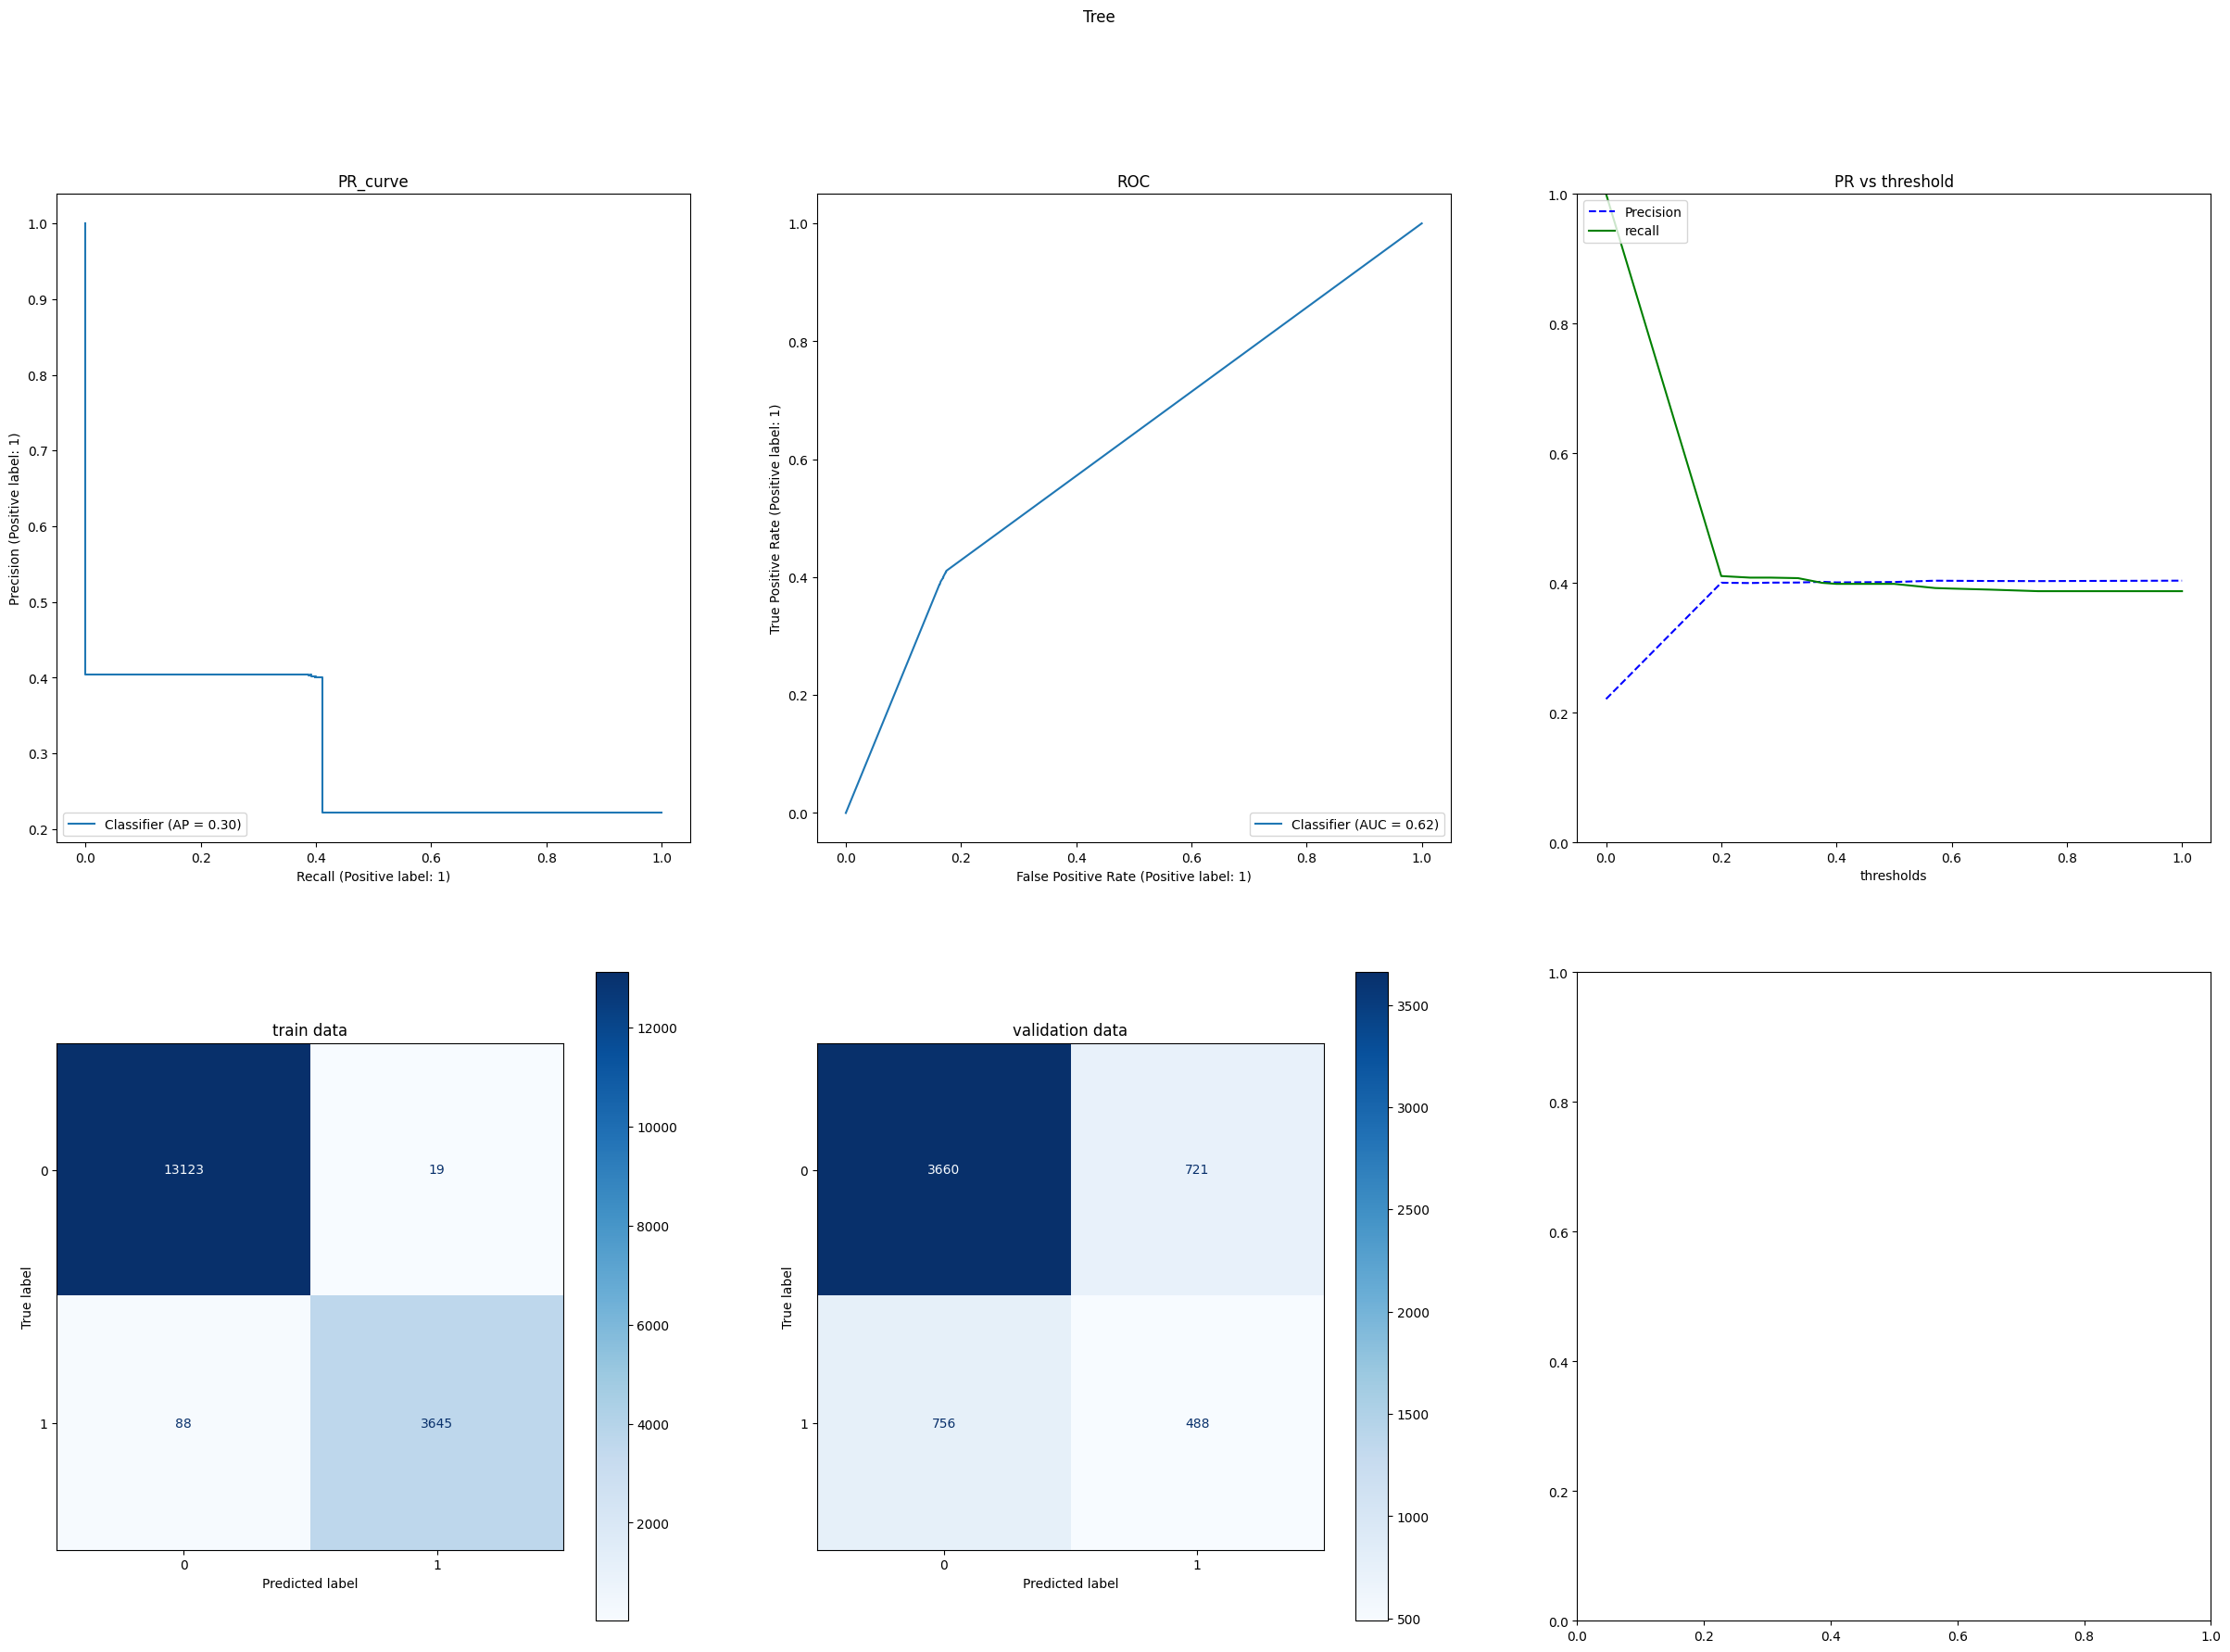

Forest
[[4098  283]
 [ 768  476]]

train scores
accuracy : 0.9936592592592592
precision : 0.9907958852192745
recall : 0.980444682560943
f1_score: 0.9855931062340111

Val scores
accuracy : 0.8131555555555555
precision : 0.6271409749670619
recall : 0.38263665594855306
f1_score: 0.47528706939590615


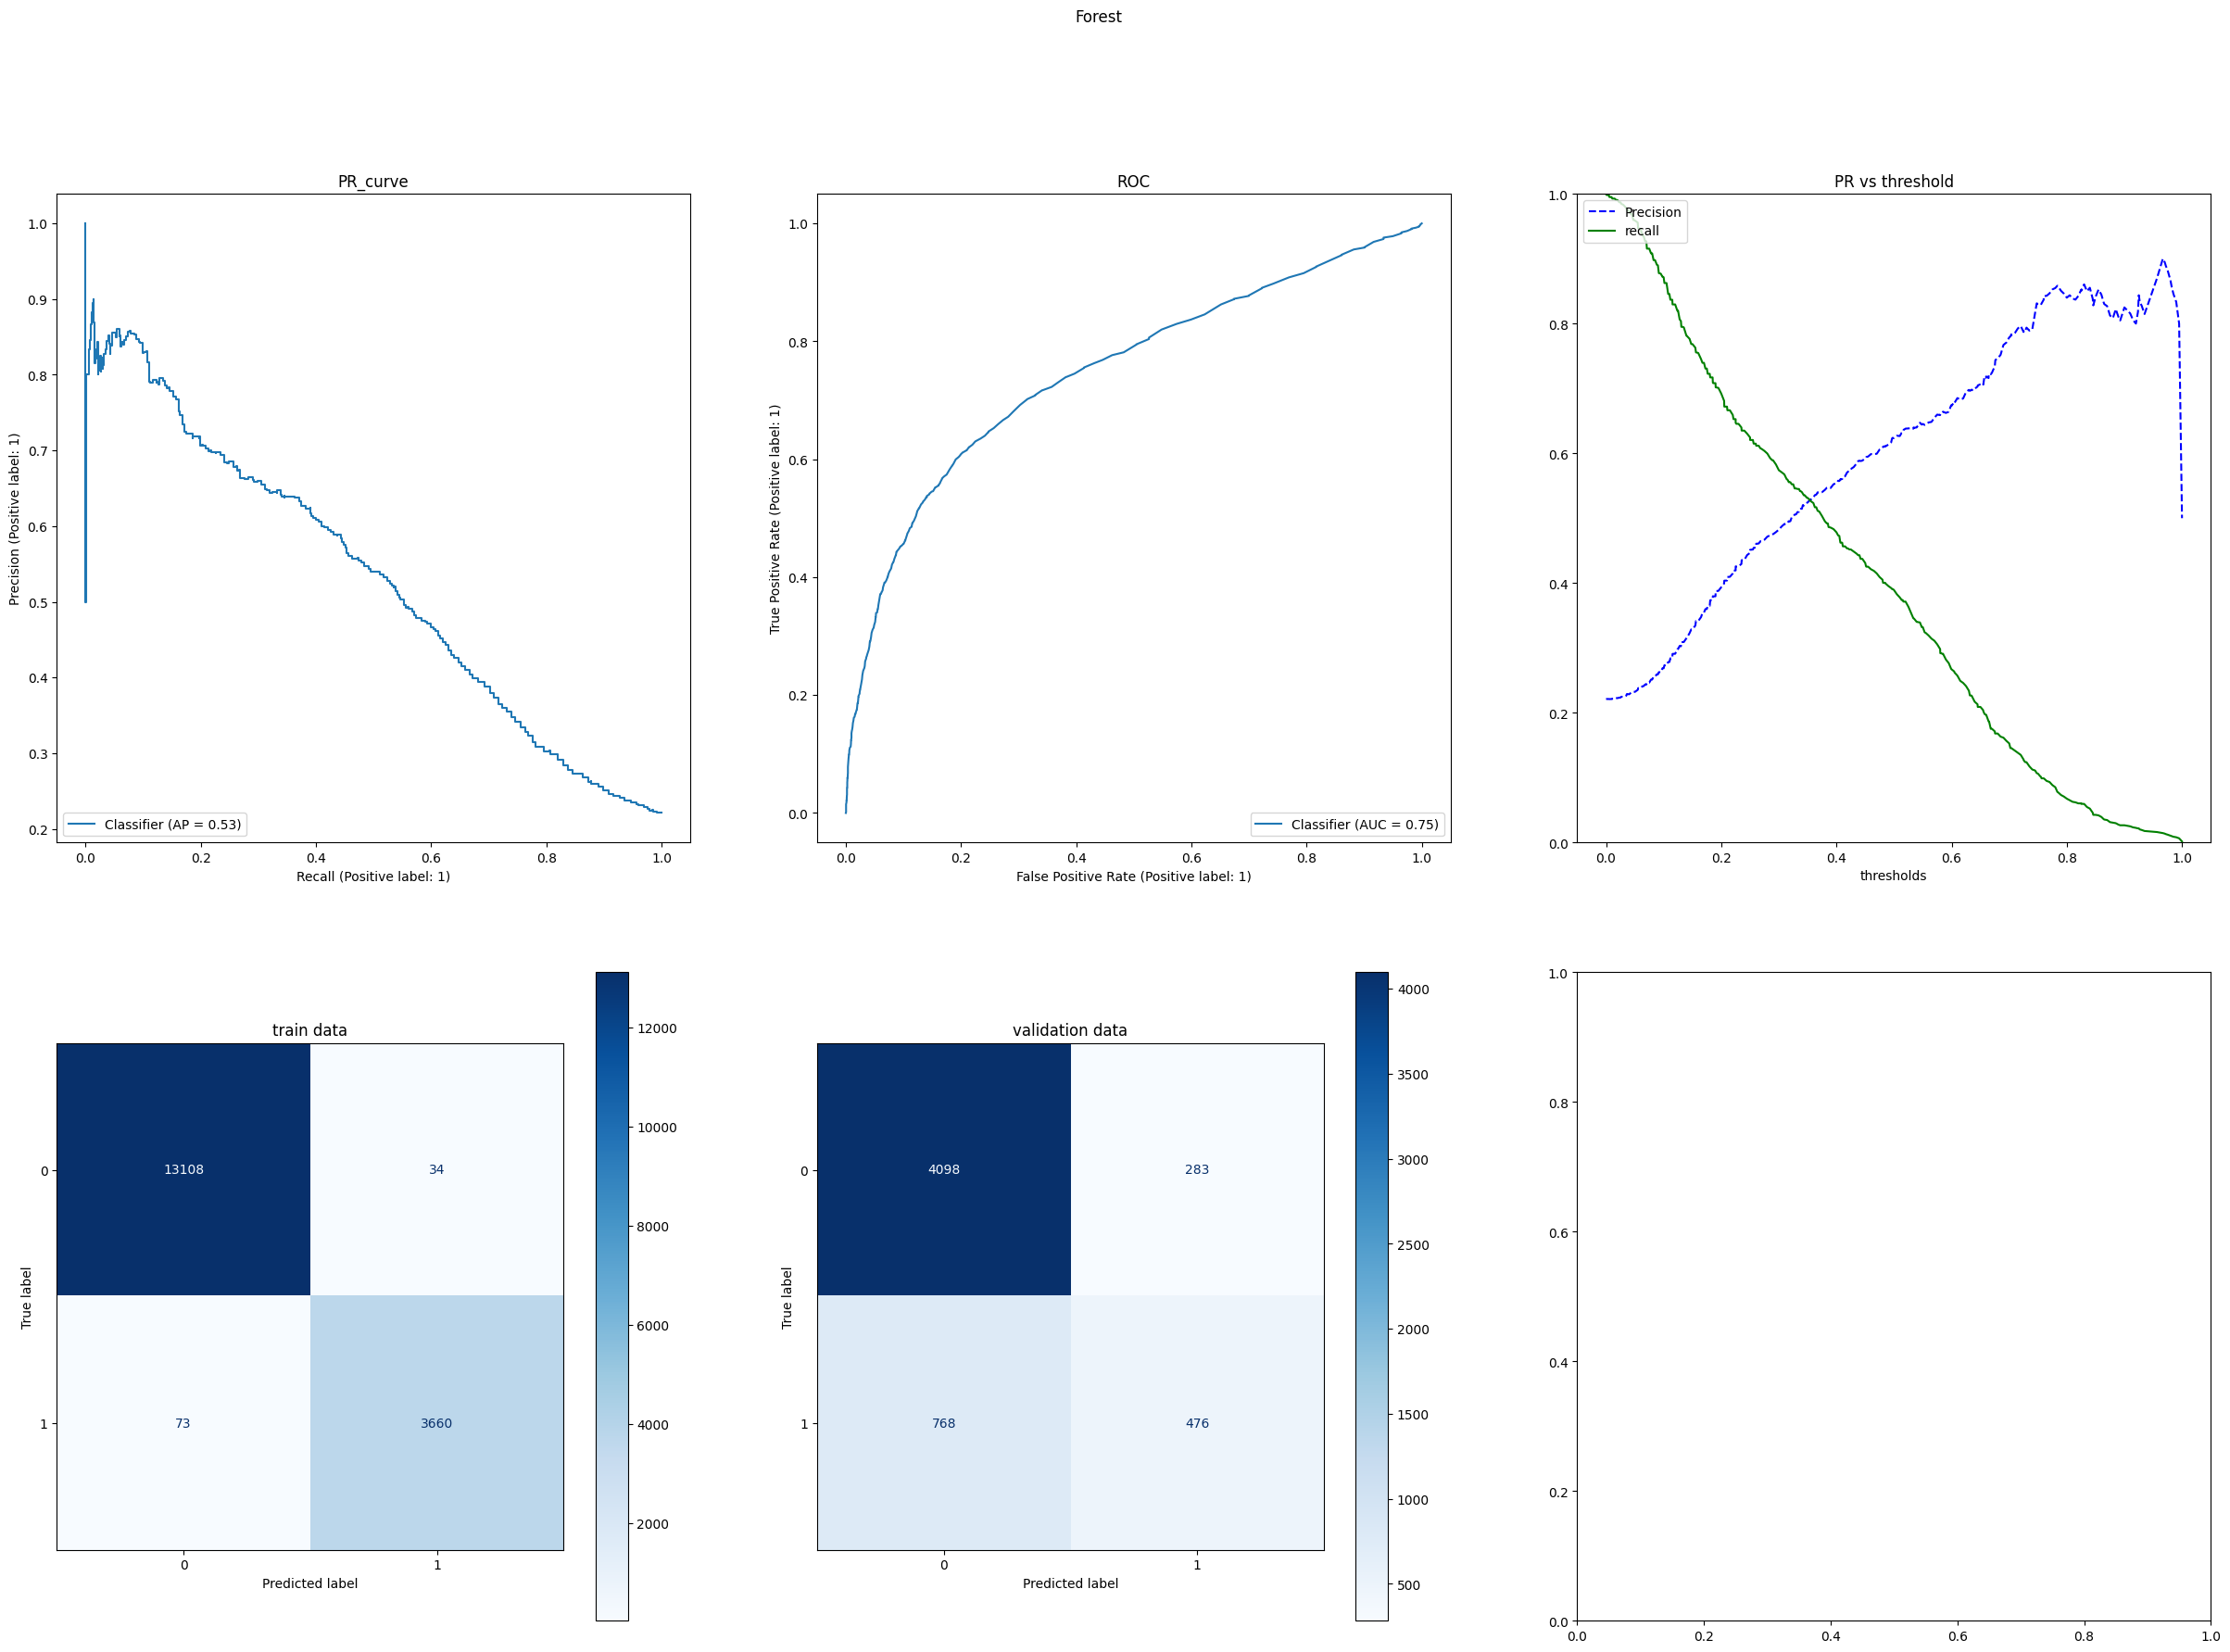

Ada
[[4144  237]
 [ 823  421]]

train scores
accuracy : 0.8122666666666667
precision : 0.6464489372731985
recall : 0.334047682828824
f1_score: 0.4404803956199223

Val scores
accuracy : 0.8115555555555556
precision : 0.6398176291793313
recall : 0.3384244372990354
f1_score: 0.44269190325972657


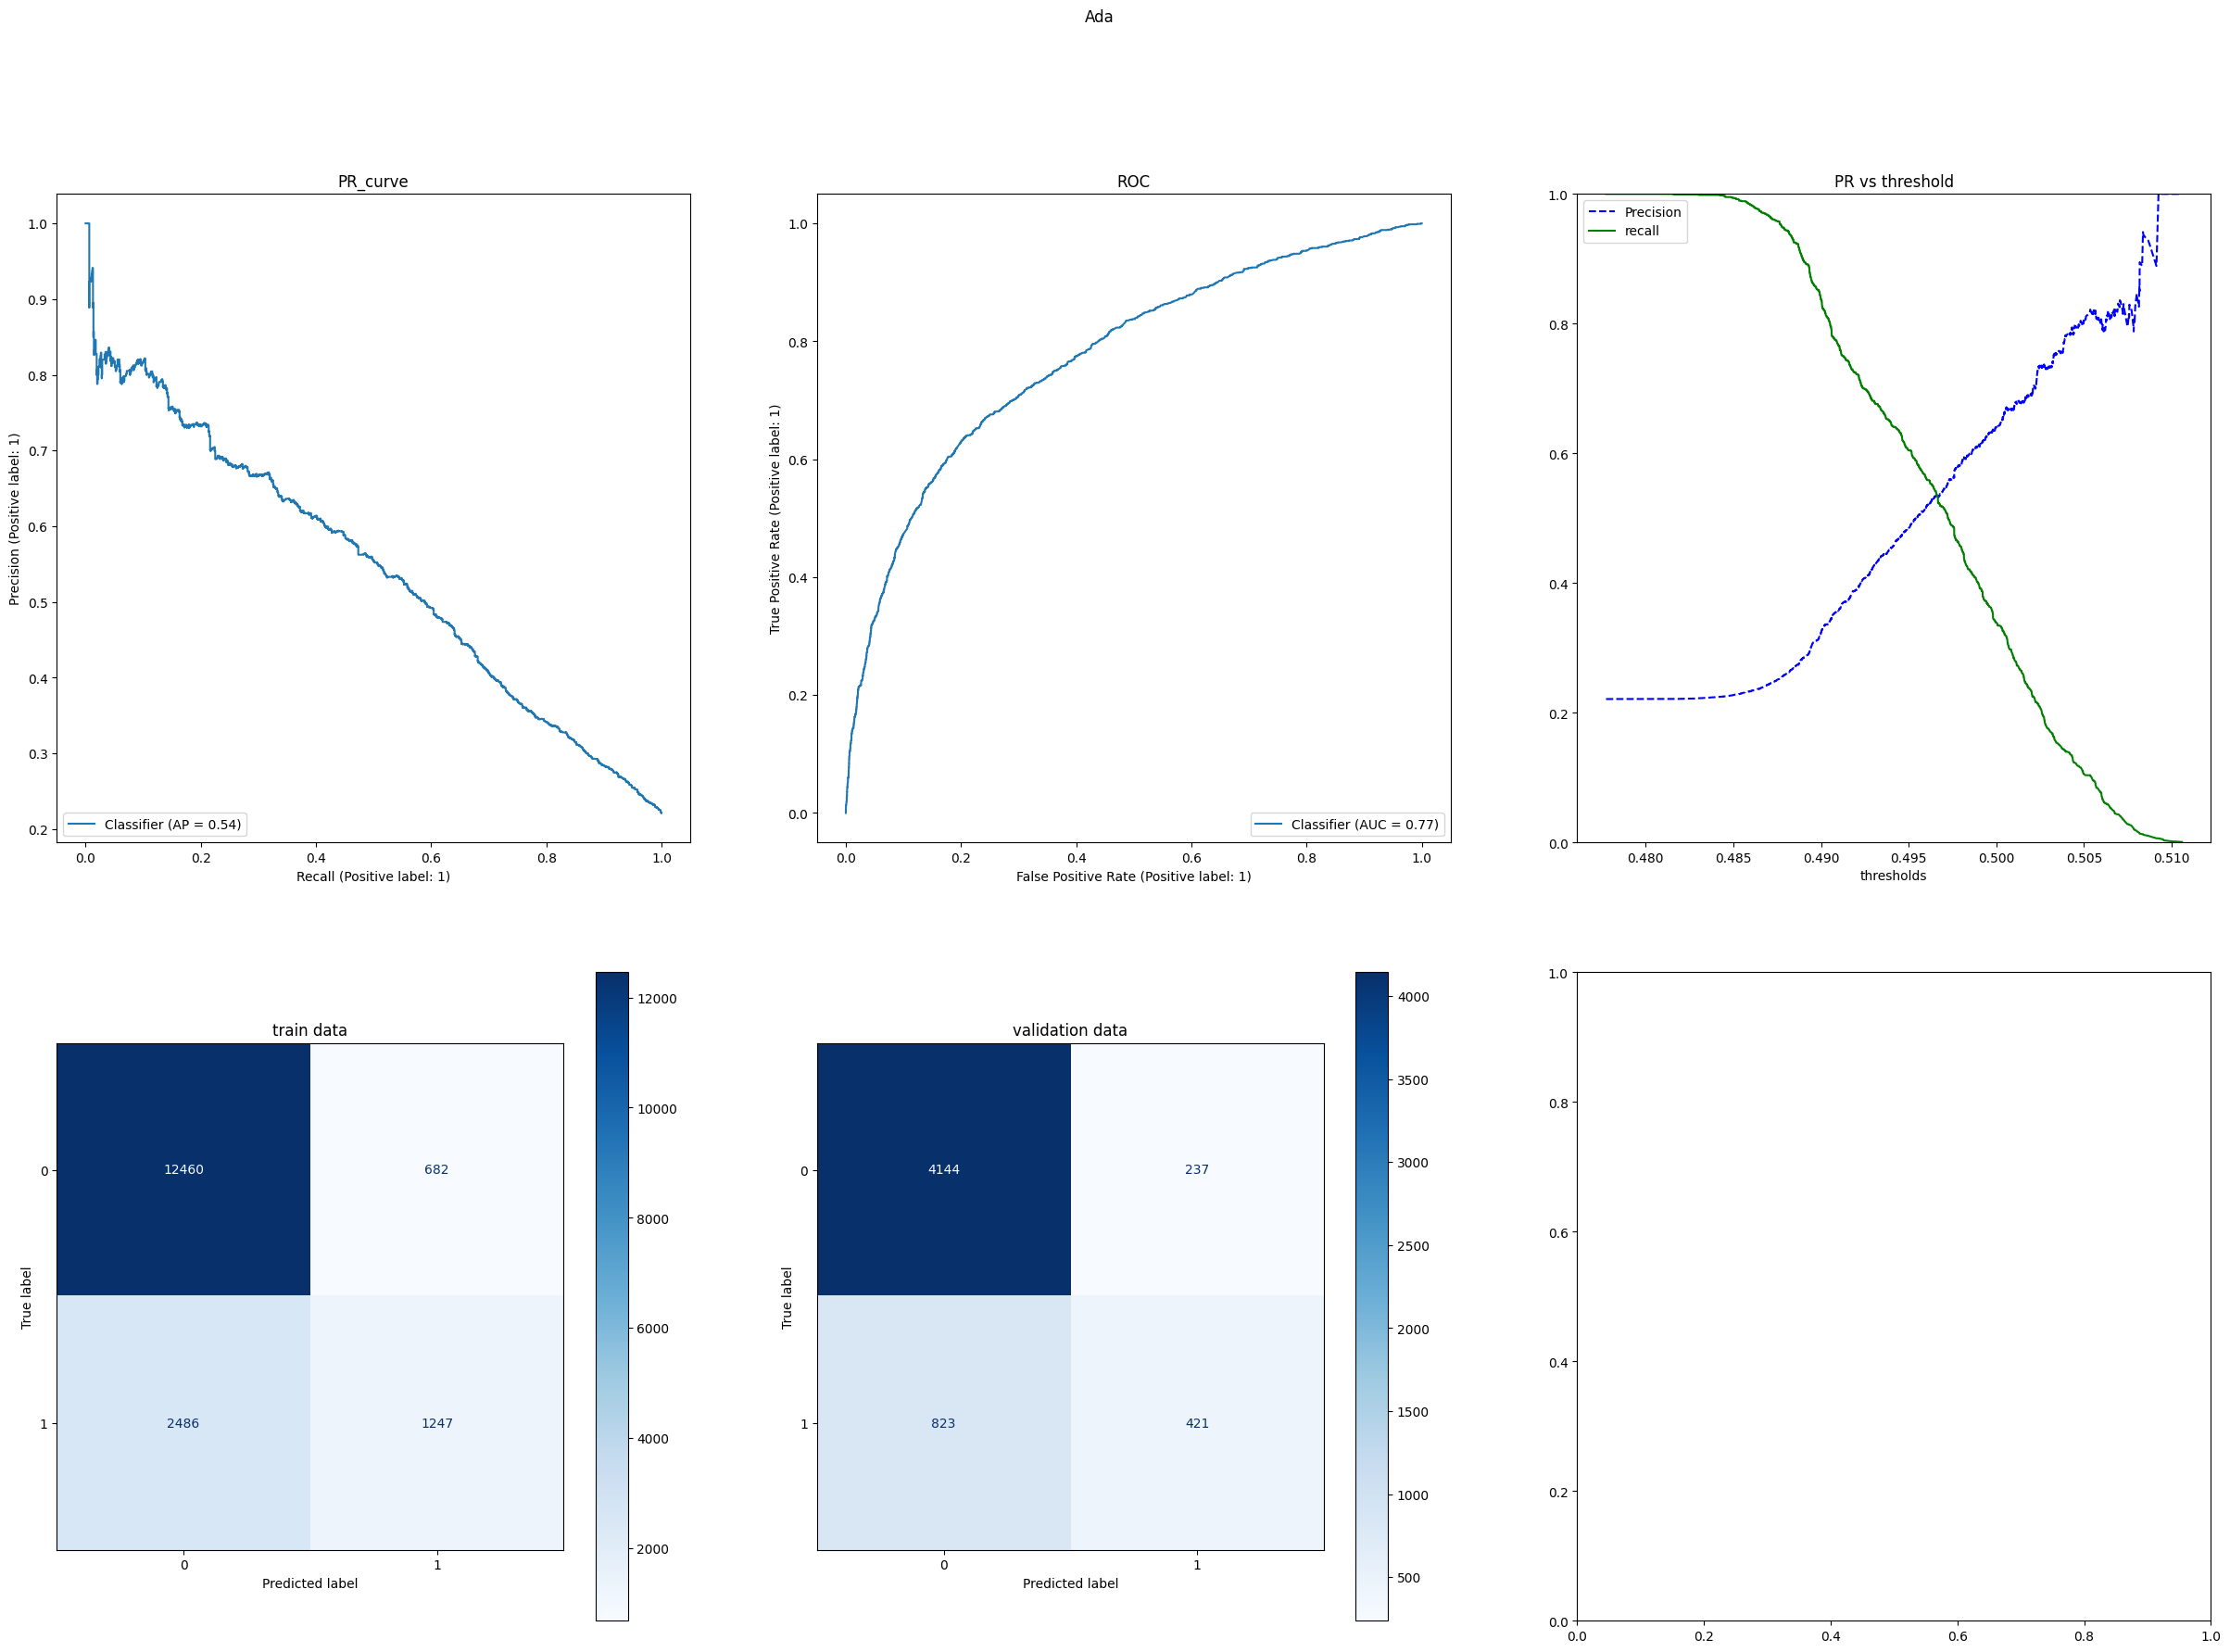

GdBoost
[[4133  248]
 [ 798  446]]

train scores
accuracy : 0.8266666666666667
precision : 0.7028112449799196
recall : 0.37503348513260115
f1_score: 0.4890829694323144

Val scores
accuracy : 0.8140444444444445
precision : 0.6426512968299711
recall : 0.35852090032154343
f1_score: 0.4602683178534571


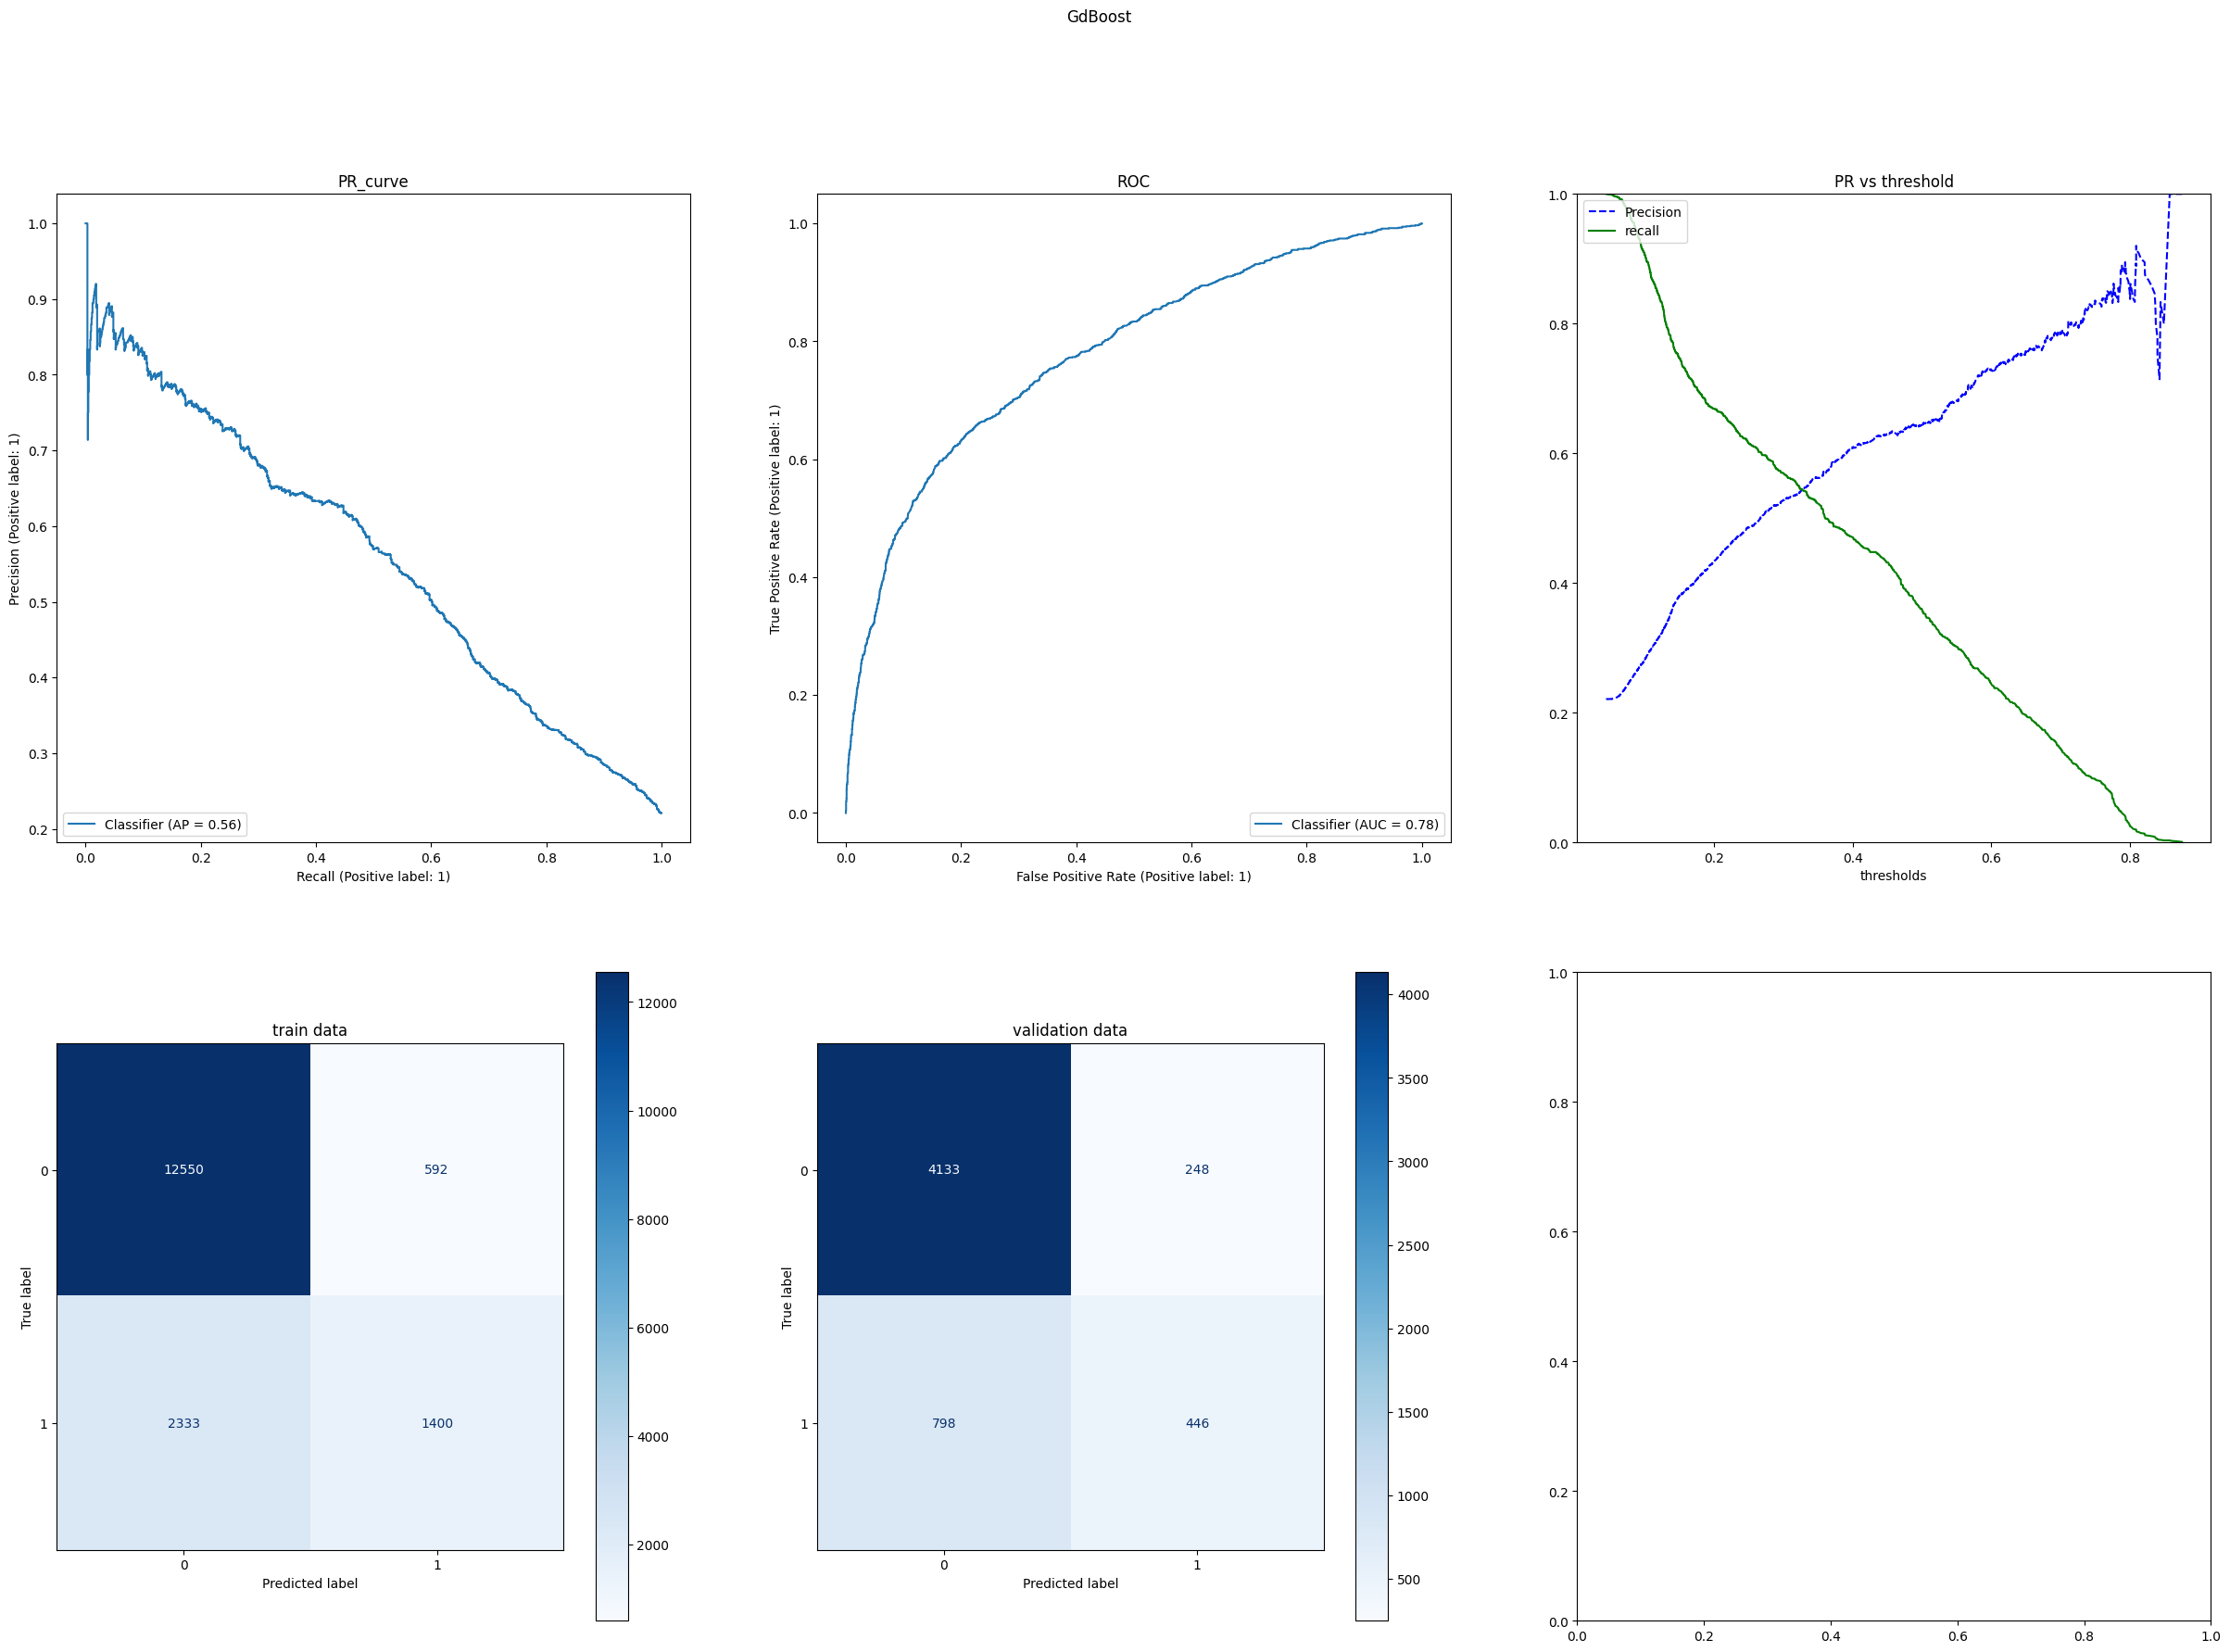

In [53]:

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

raw,non_regul
Tree
[[3571  810]
 [ 736  508]]

train scores
accuracy : 0.9995259259259259
precision : 1.0
recall : 0.997856951513528
f1_score: 0.9989273263609547

Val scores
accuracy : 0.7251555555555556
precision : 0.38543247344461307
recall : 0.40836012861736337
f1_score: 0.39656518345042935


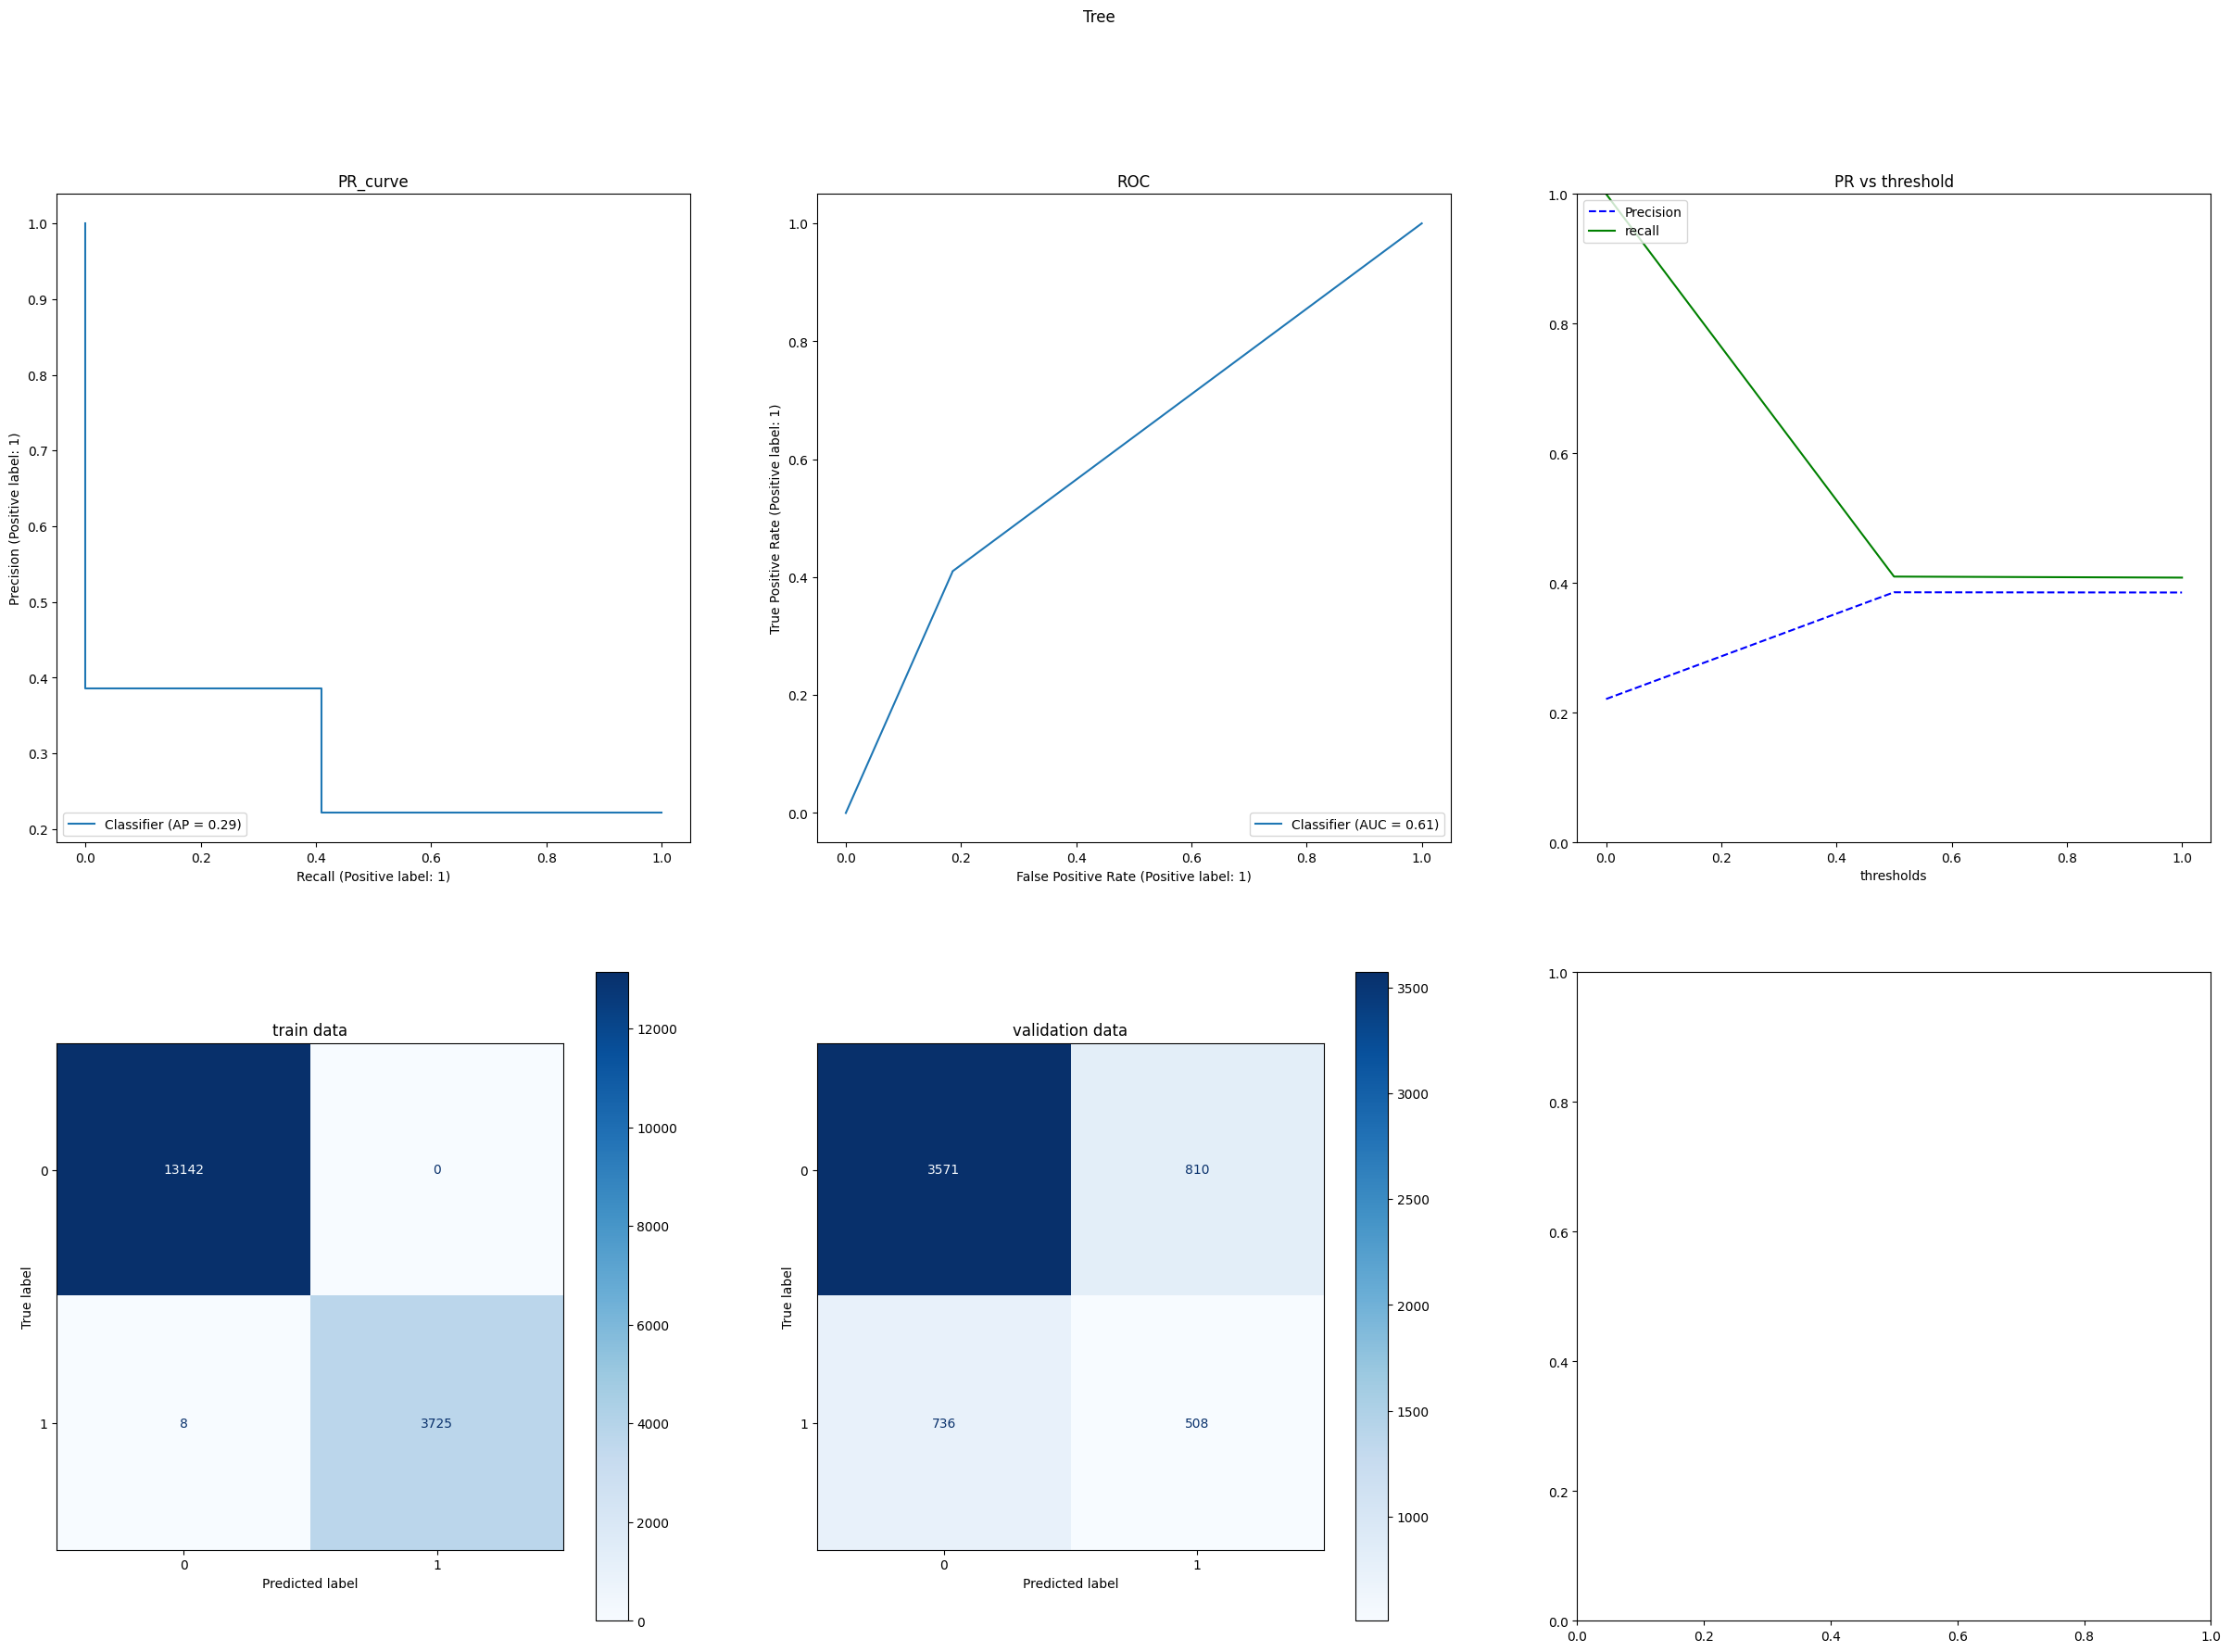

Forest
[[4124  257]
 [ 770  474]]

train scores
accuracy : 0.9995259259259259
precision : 0.9991959260251944
recall : 0.998660594695955
f1_score: 0.9989281886387995

Val scores
accuracy : 0.8174222222222223
precision : 0.6484268125854993
recall : 0.38102893890675243
f1_score: 0.48


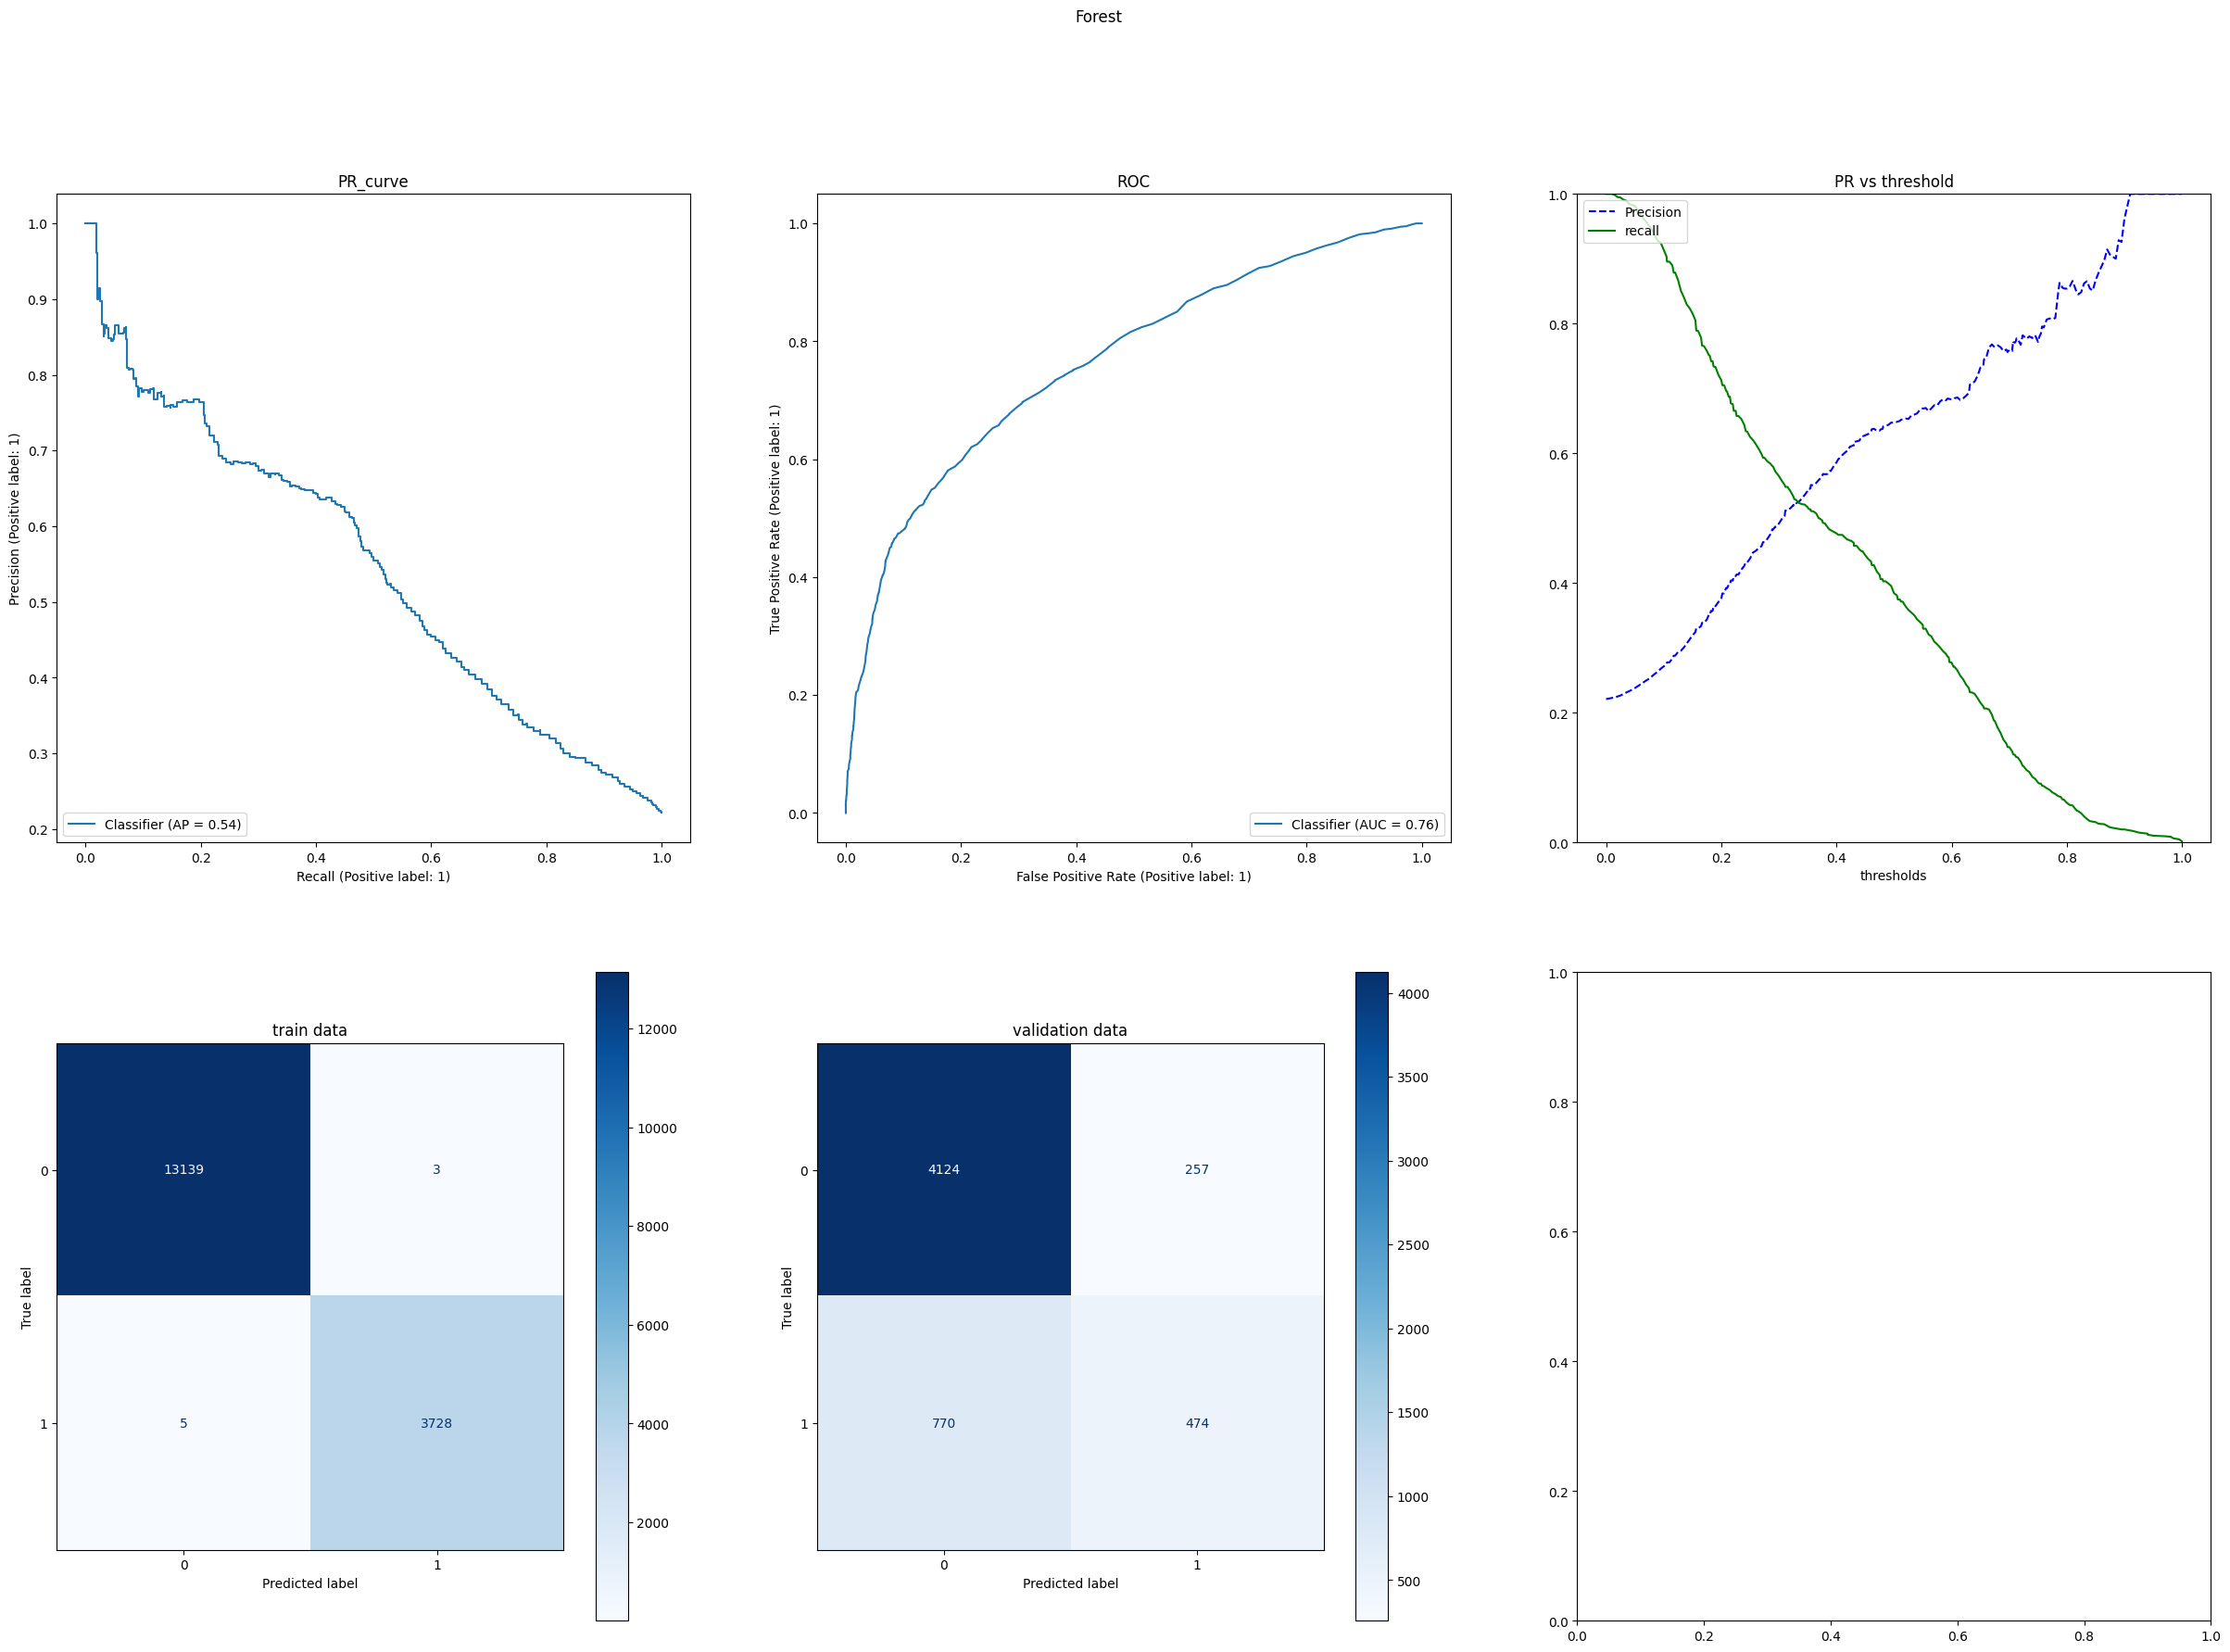

Ada
[[4192  189]
 [ 817  427]]

train scores
accuracy : 0.8184296296296296
precision : 0.6925734024179621
recall : 0.322260916153228
f1_score: 0.439853747714808

Val scores
accuracy : 0.8211555555555555
precision : 0.6931818181818182
recall : 0.3432475884244373
f1_score: 0.4591397849462366


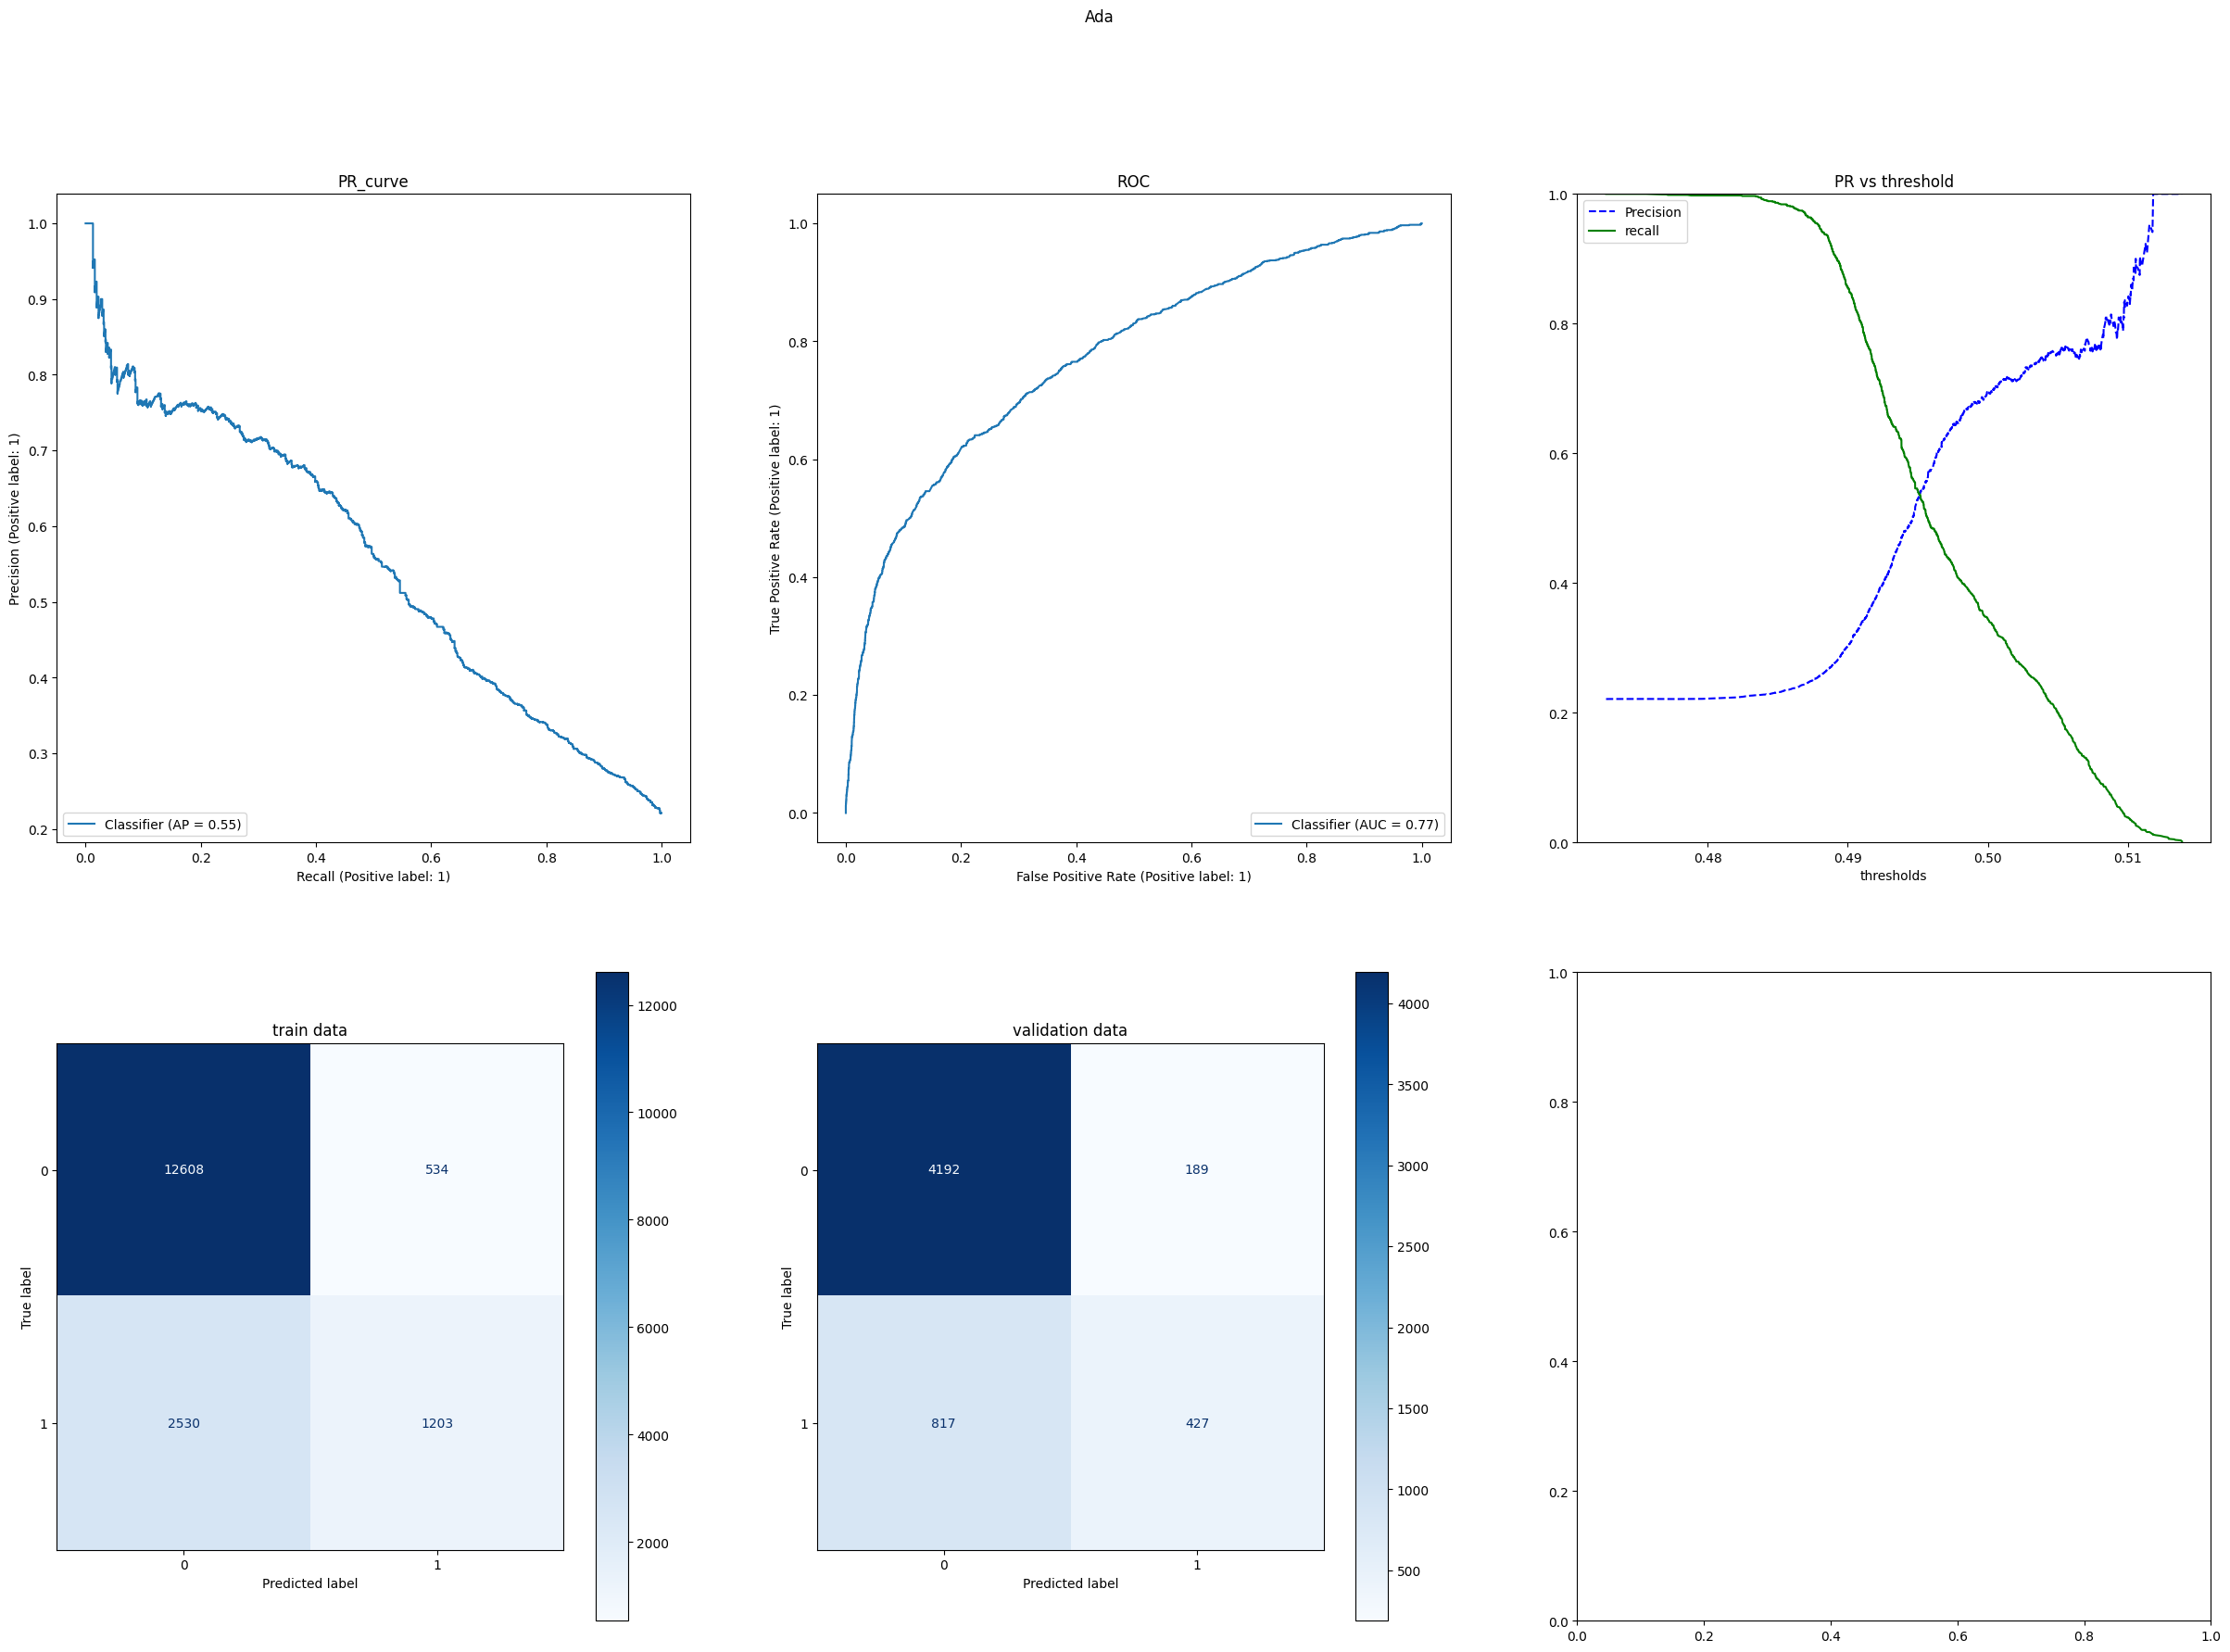

GdBoost
[[4162  219]
 [ 777  467]]

train scores
accuracy : 0.828562962962963
precision : 0.7091633466135459
recall : 0.3814626305920171
f1_score: 0.49608082215641874

Val scores
accuracy : 0.8229333333333333
precision : 0.6807580174927114
recall : 0.3754019292604502
f1_score: 0.4839378238341969


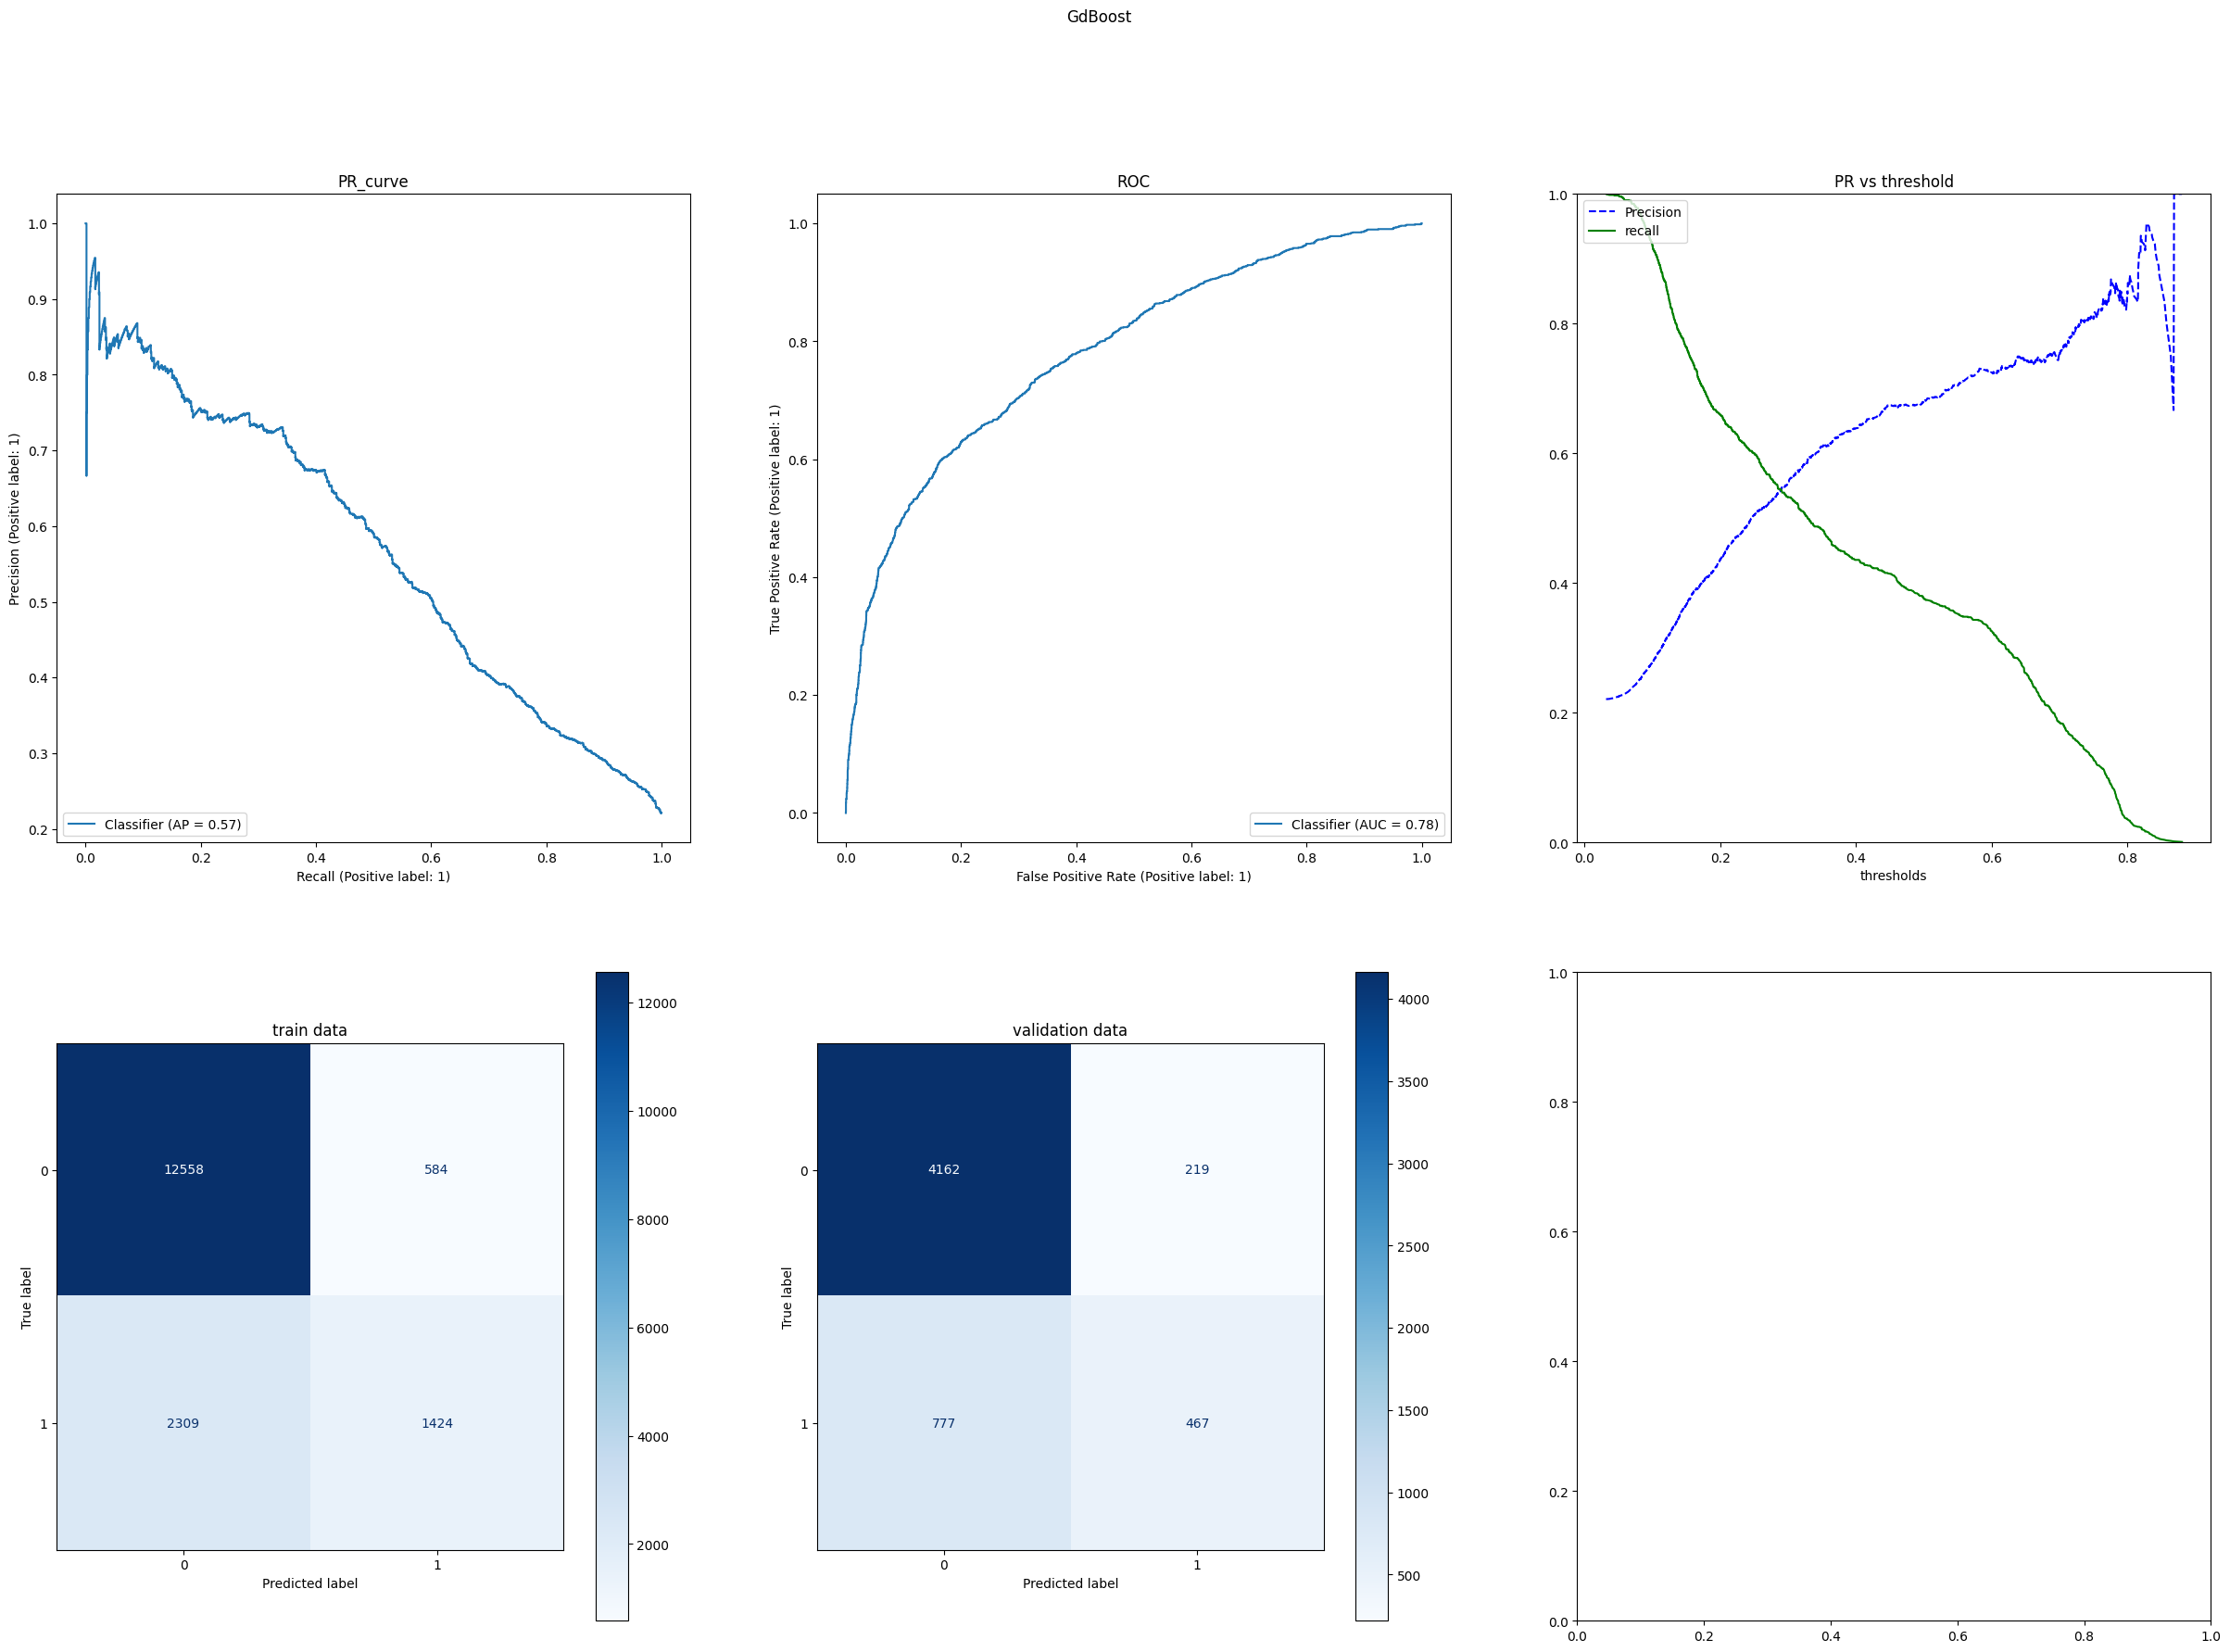

In [54]:
case_name ='raw,non_regul'
print(case_name)

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [55]:
case_name = 't_series,reg'
print(case_name)


t_series,reg


Tree
[[4184  197]
 [ 833  411]]

train scores
accuracy : 0.8251851851851851
precision : 0.7159404302261445
recall : 0.34770961693008307
f1_score: 0.46808510638297873

Val scores
accuracy : 0.8168888888888889
precision : 0.6759868421052632
recall : 0.33038585209003213
f1_score: 0.4438444924406047


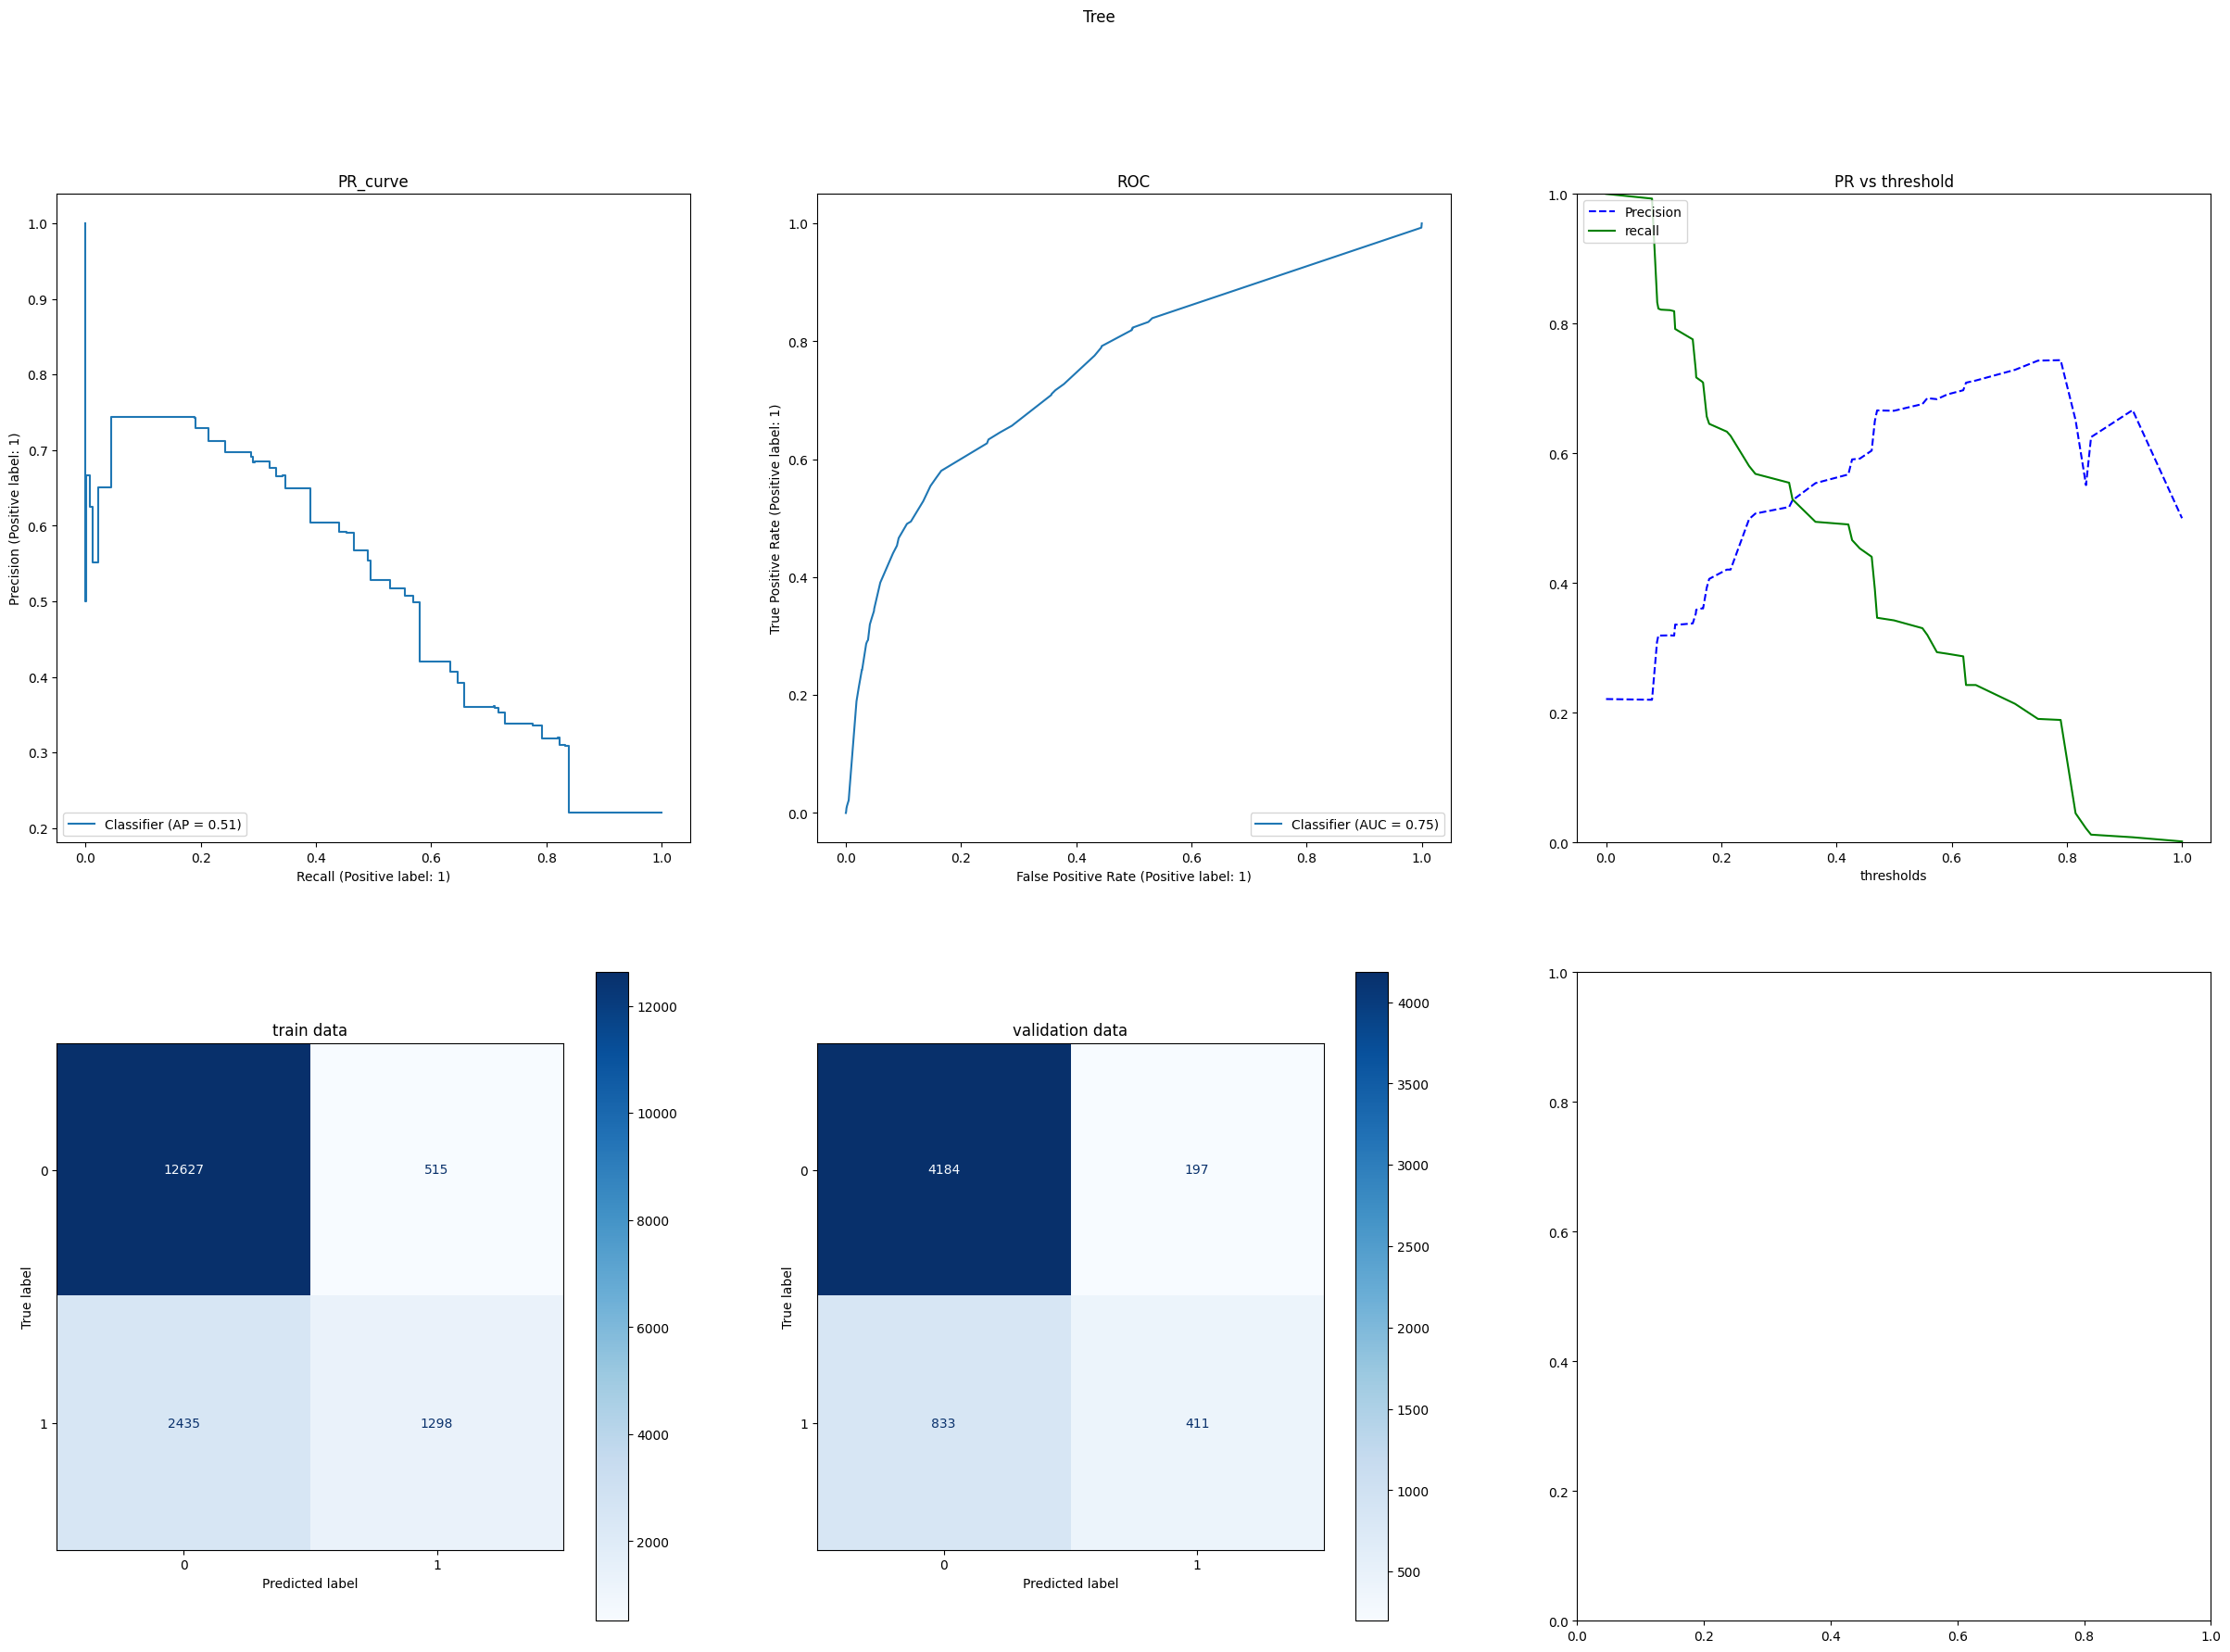

Forest
[[4182  199]
 [ 862  382]]

train scores
accuracy : 0.818962962962963
precision : 0.7034813925570228
recall : 0.31395660326814895
f1_score: 0.43415447305056487

Val scores
accuracy : 0.8113777777777778
precision : 0.657487091222031
recall : 0.3070739549839228
f1_score: 0.41863013698630136


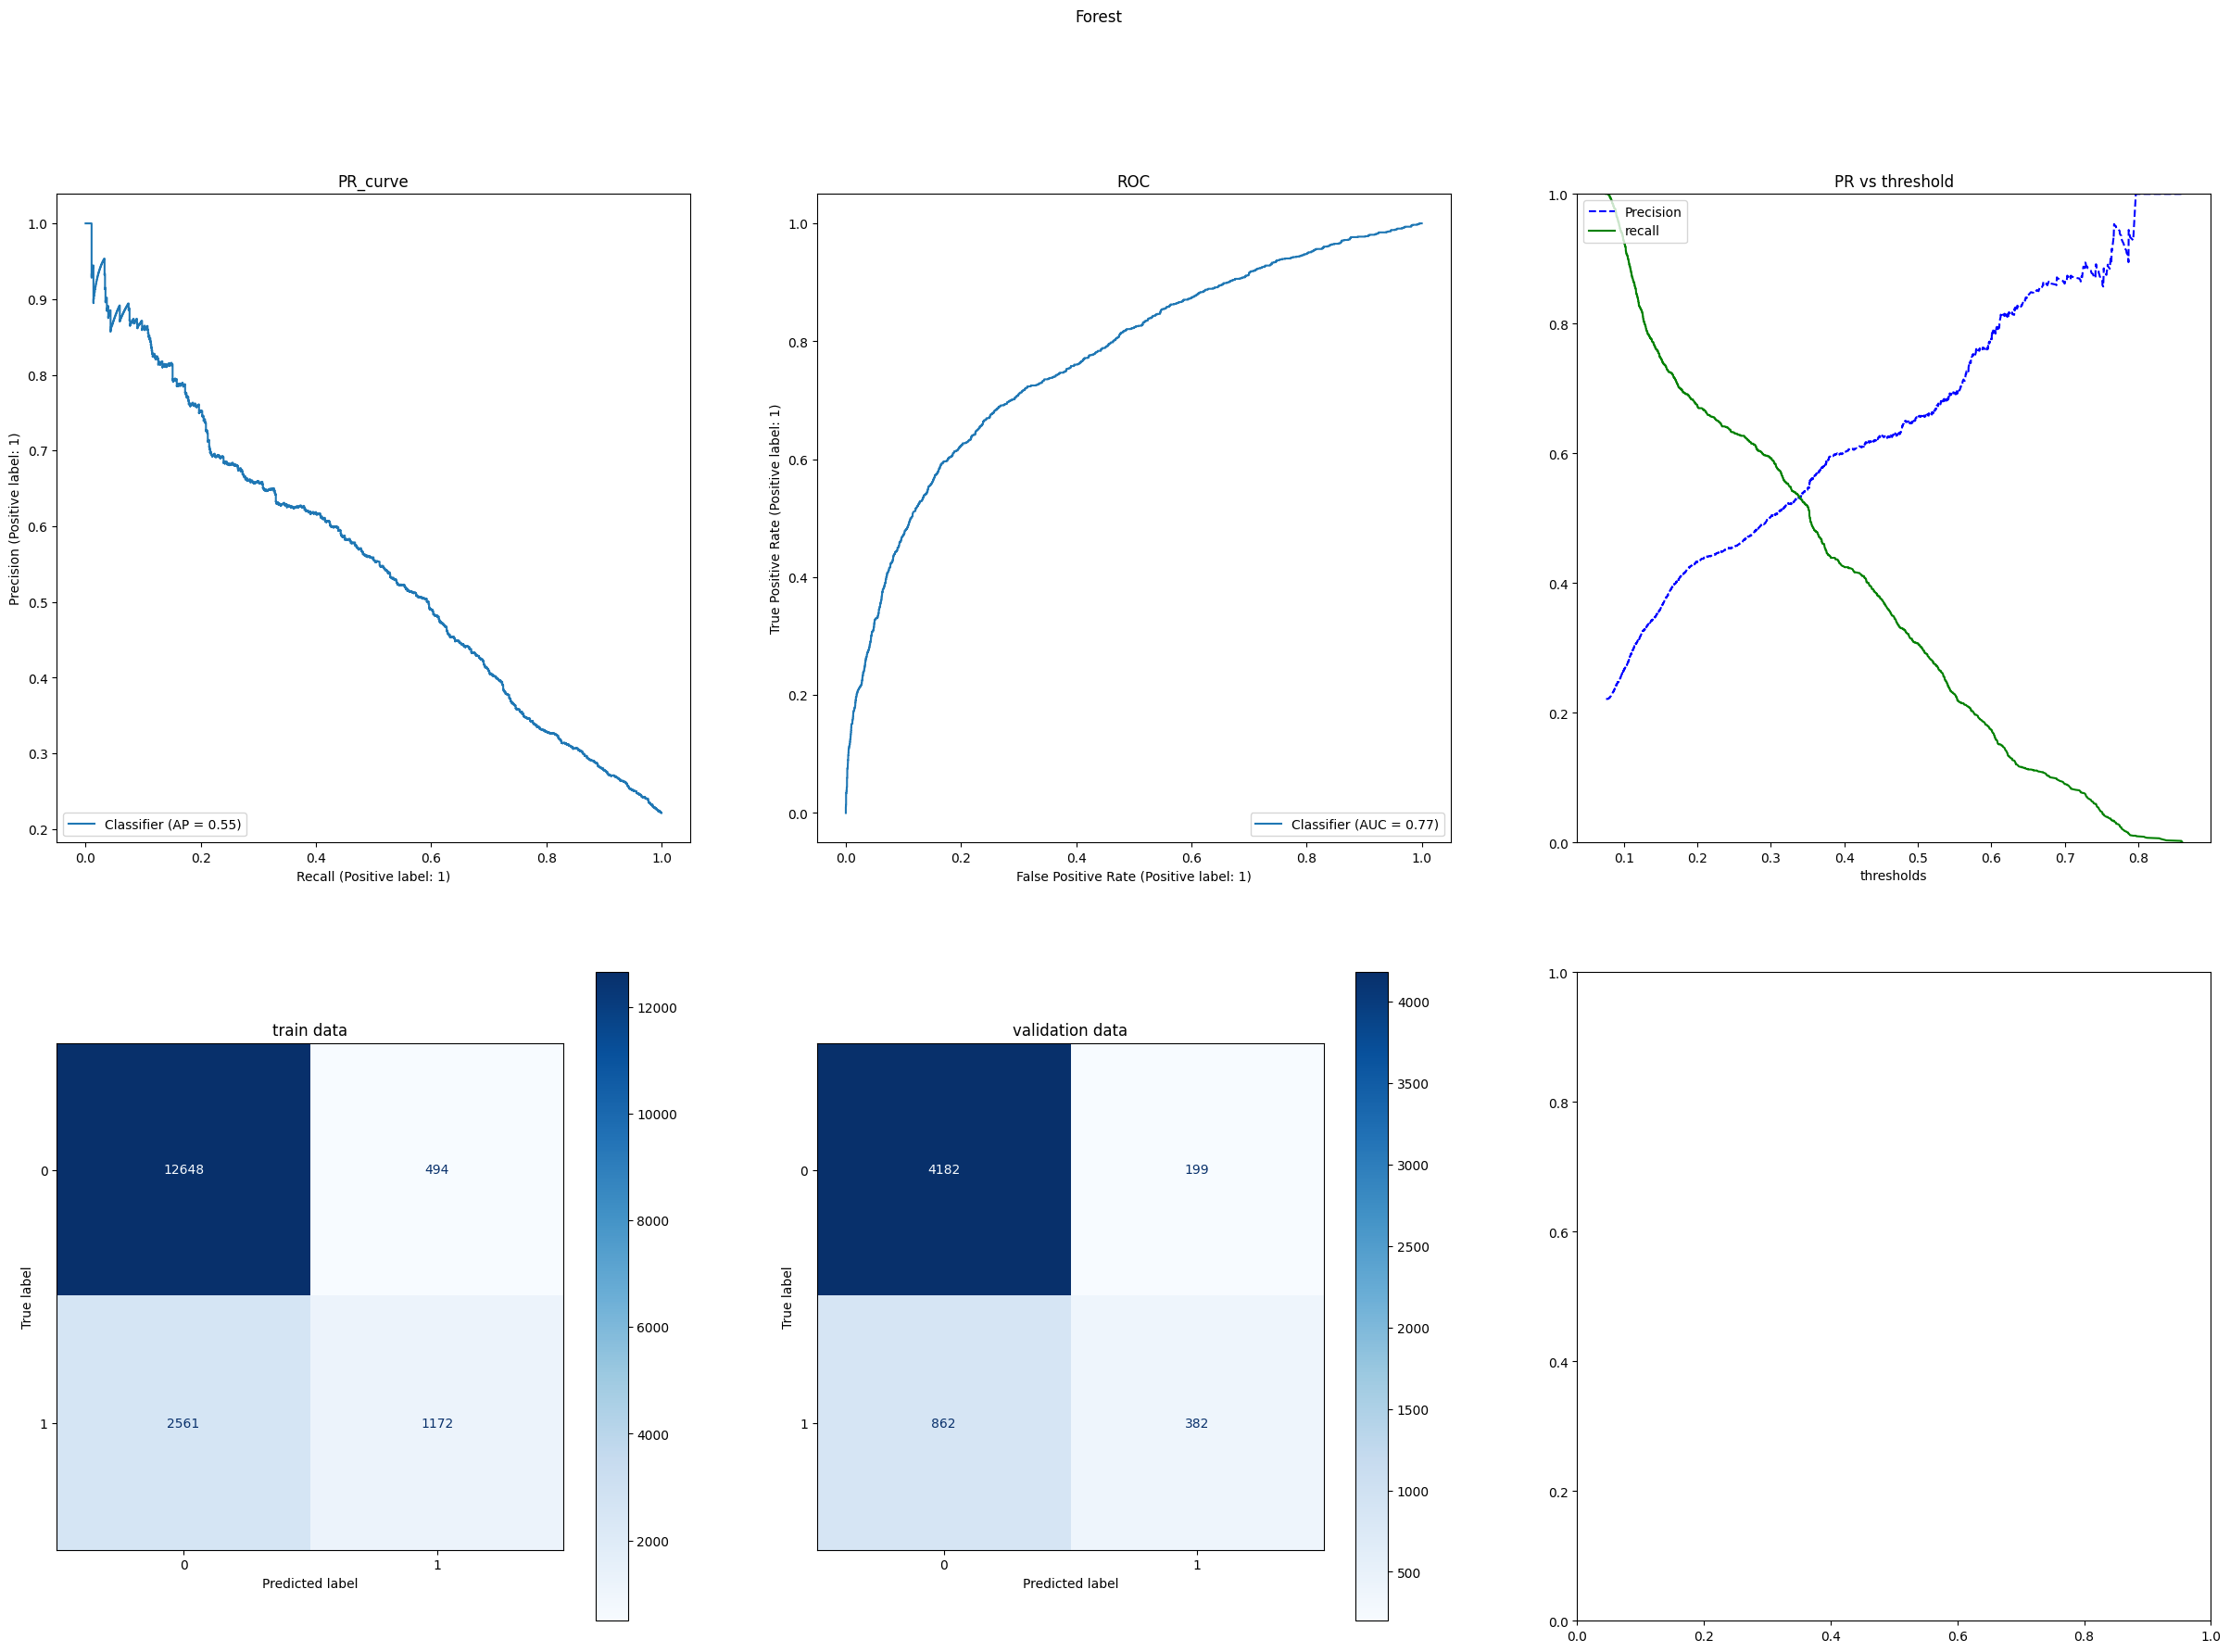

Ada
[[4185  196]
 [ 868  376]]

train scores
accuracy : 0.809837037037037
precision : 0.6541176470588236
recall : 0.2978837396196089
f1_score: 0.4093502668875391

Val scores
accuracy : 0.8108444444444445
precision : 0.6573426573426573
recall : 0.3022508038585209
f1_score: 0.4140969162995594


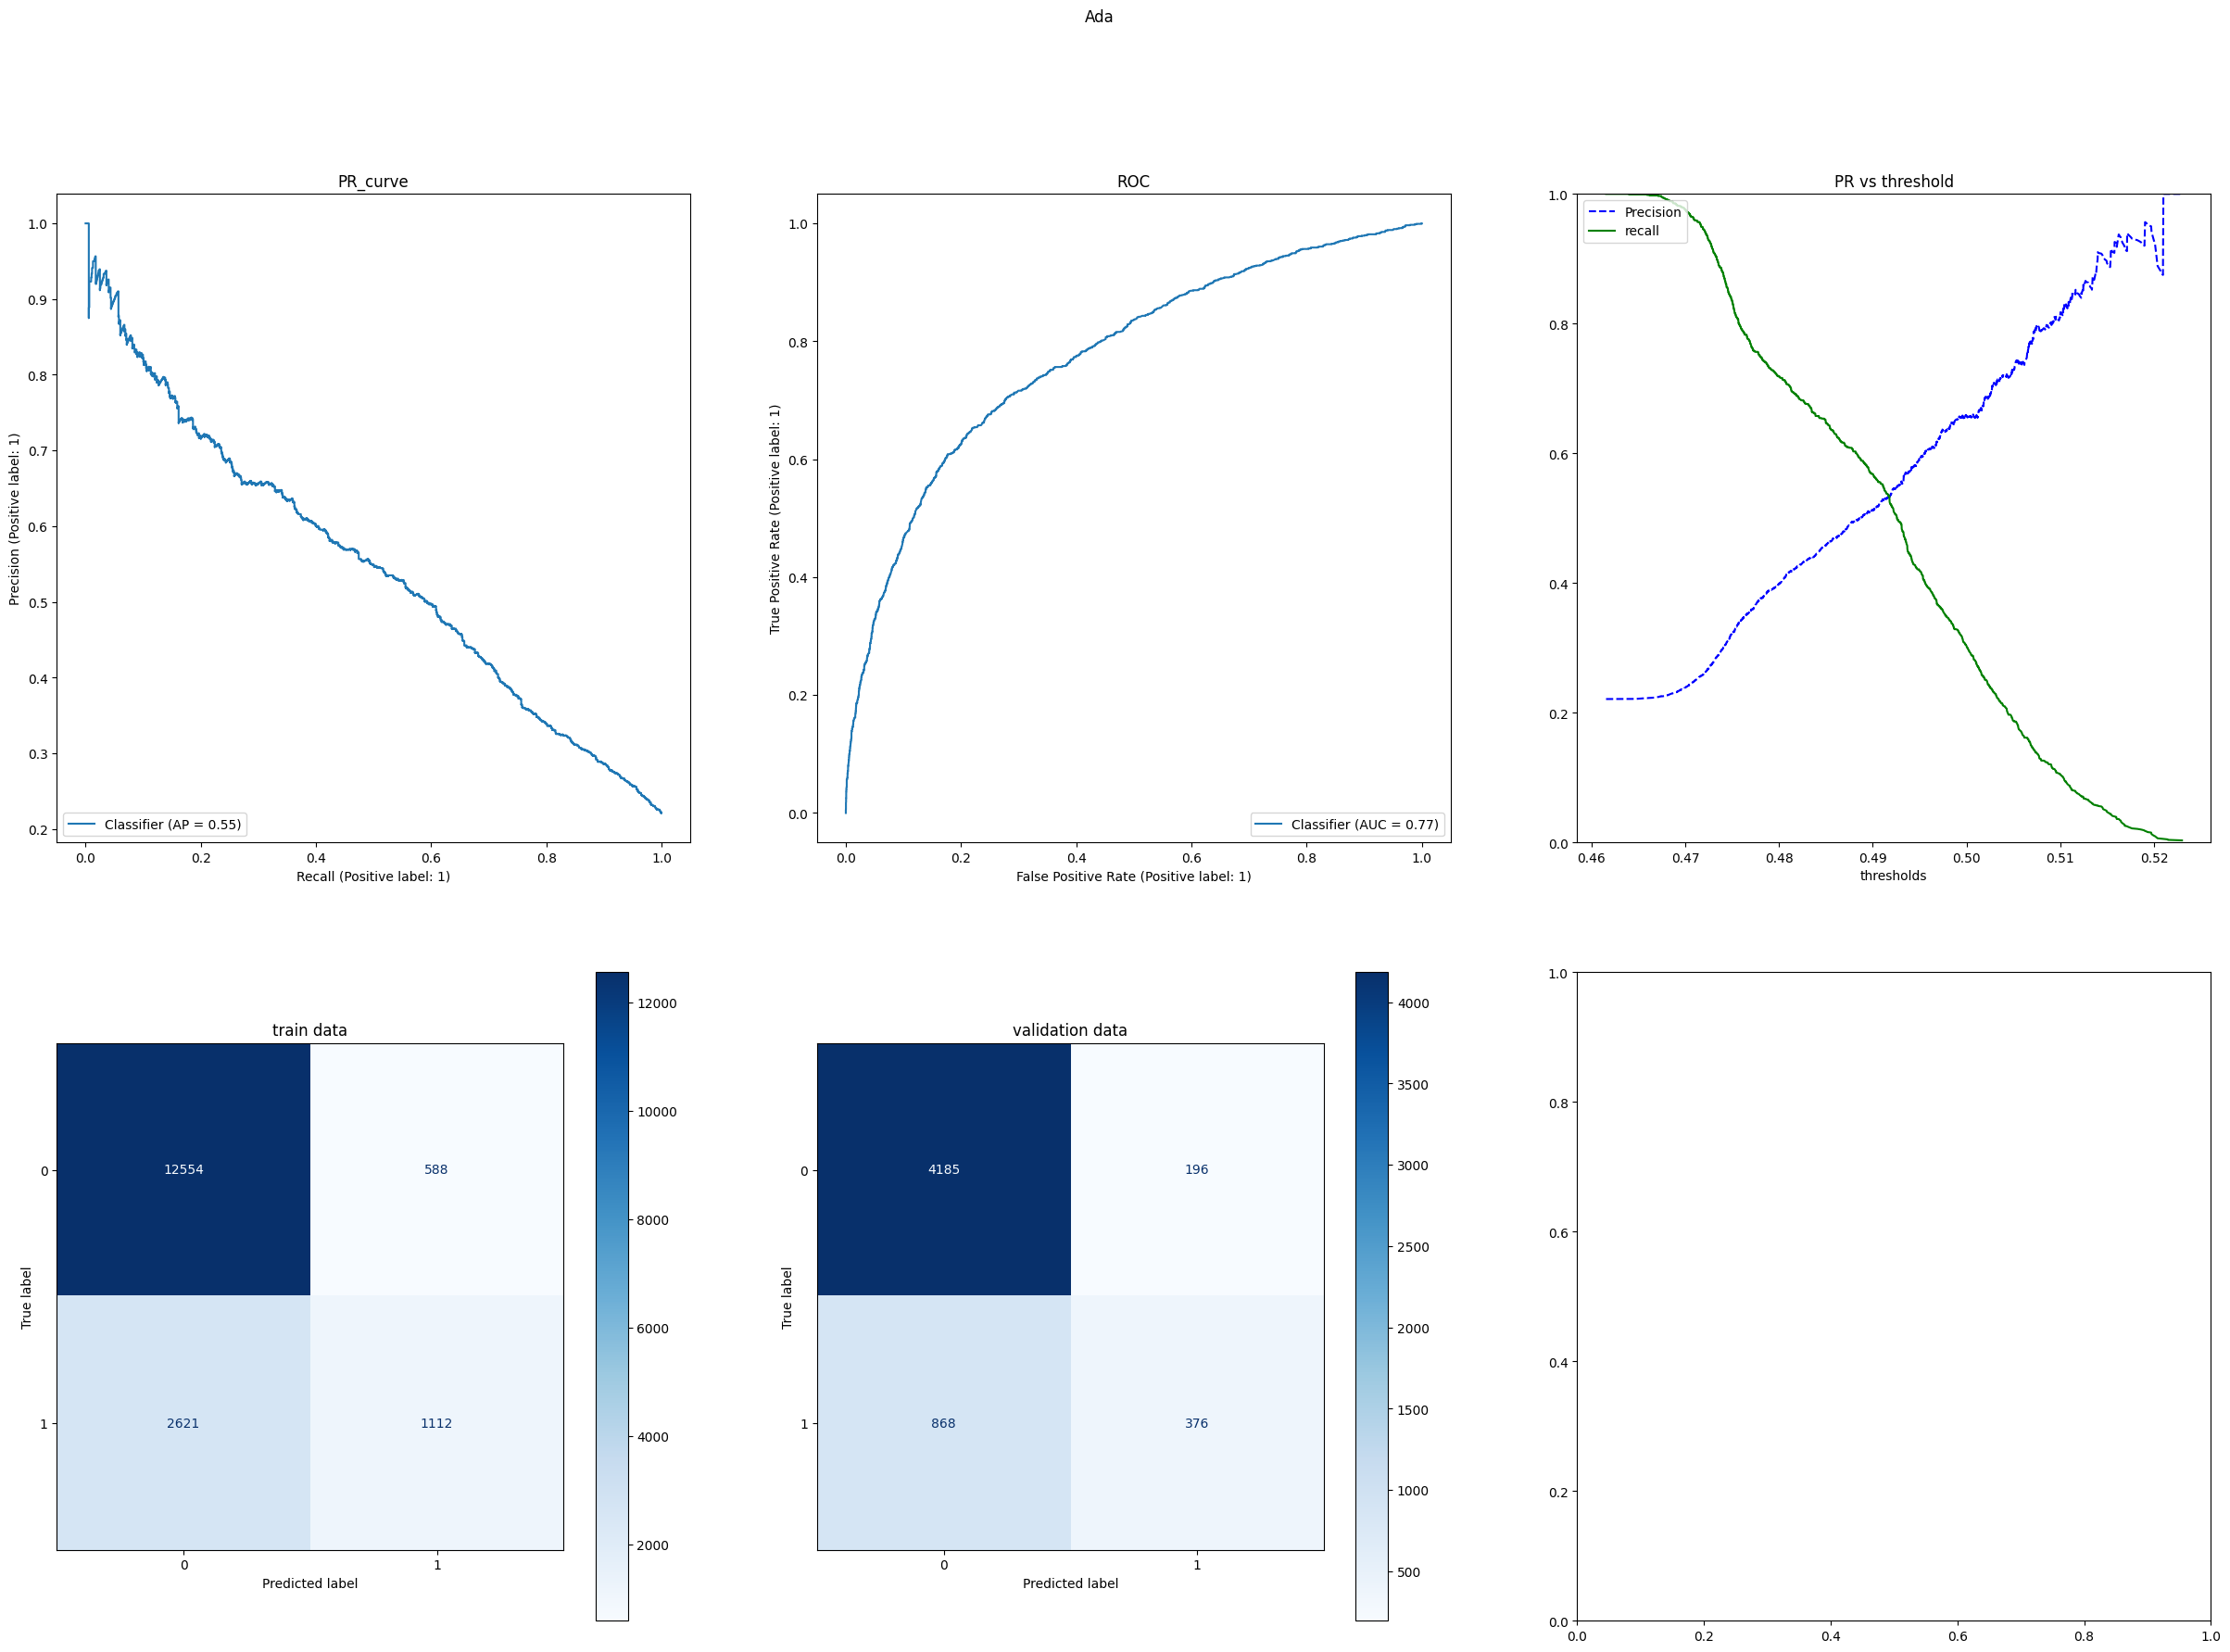

GdBoost
[[4206  175]
 [ 907  337]]

train scores
accuracy : 0.8087703703703704
precision : 0.6730506155950753
recall : 0.2635949638360568
f1_score: 0.37882579403272376

Val scores
accuracy : 0.8076444444444445
precision : 0.658203125
recall : 0.2709003215434084
f1_score: 0.3838268792710706


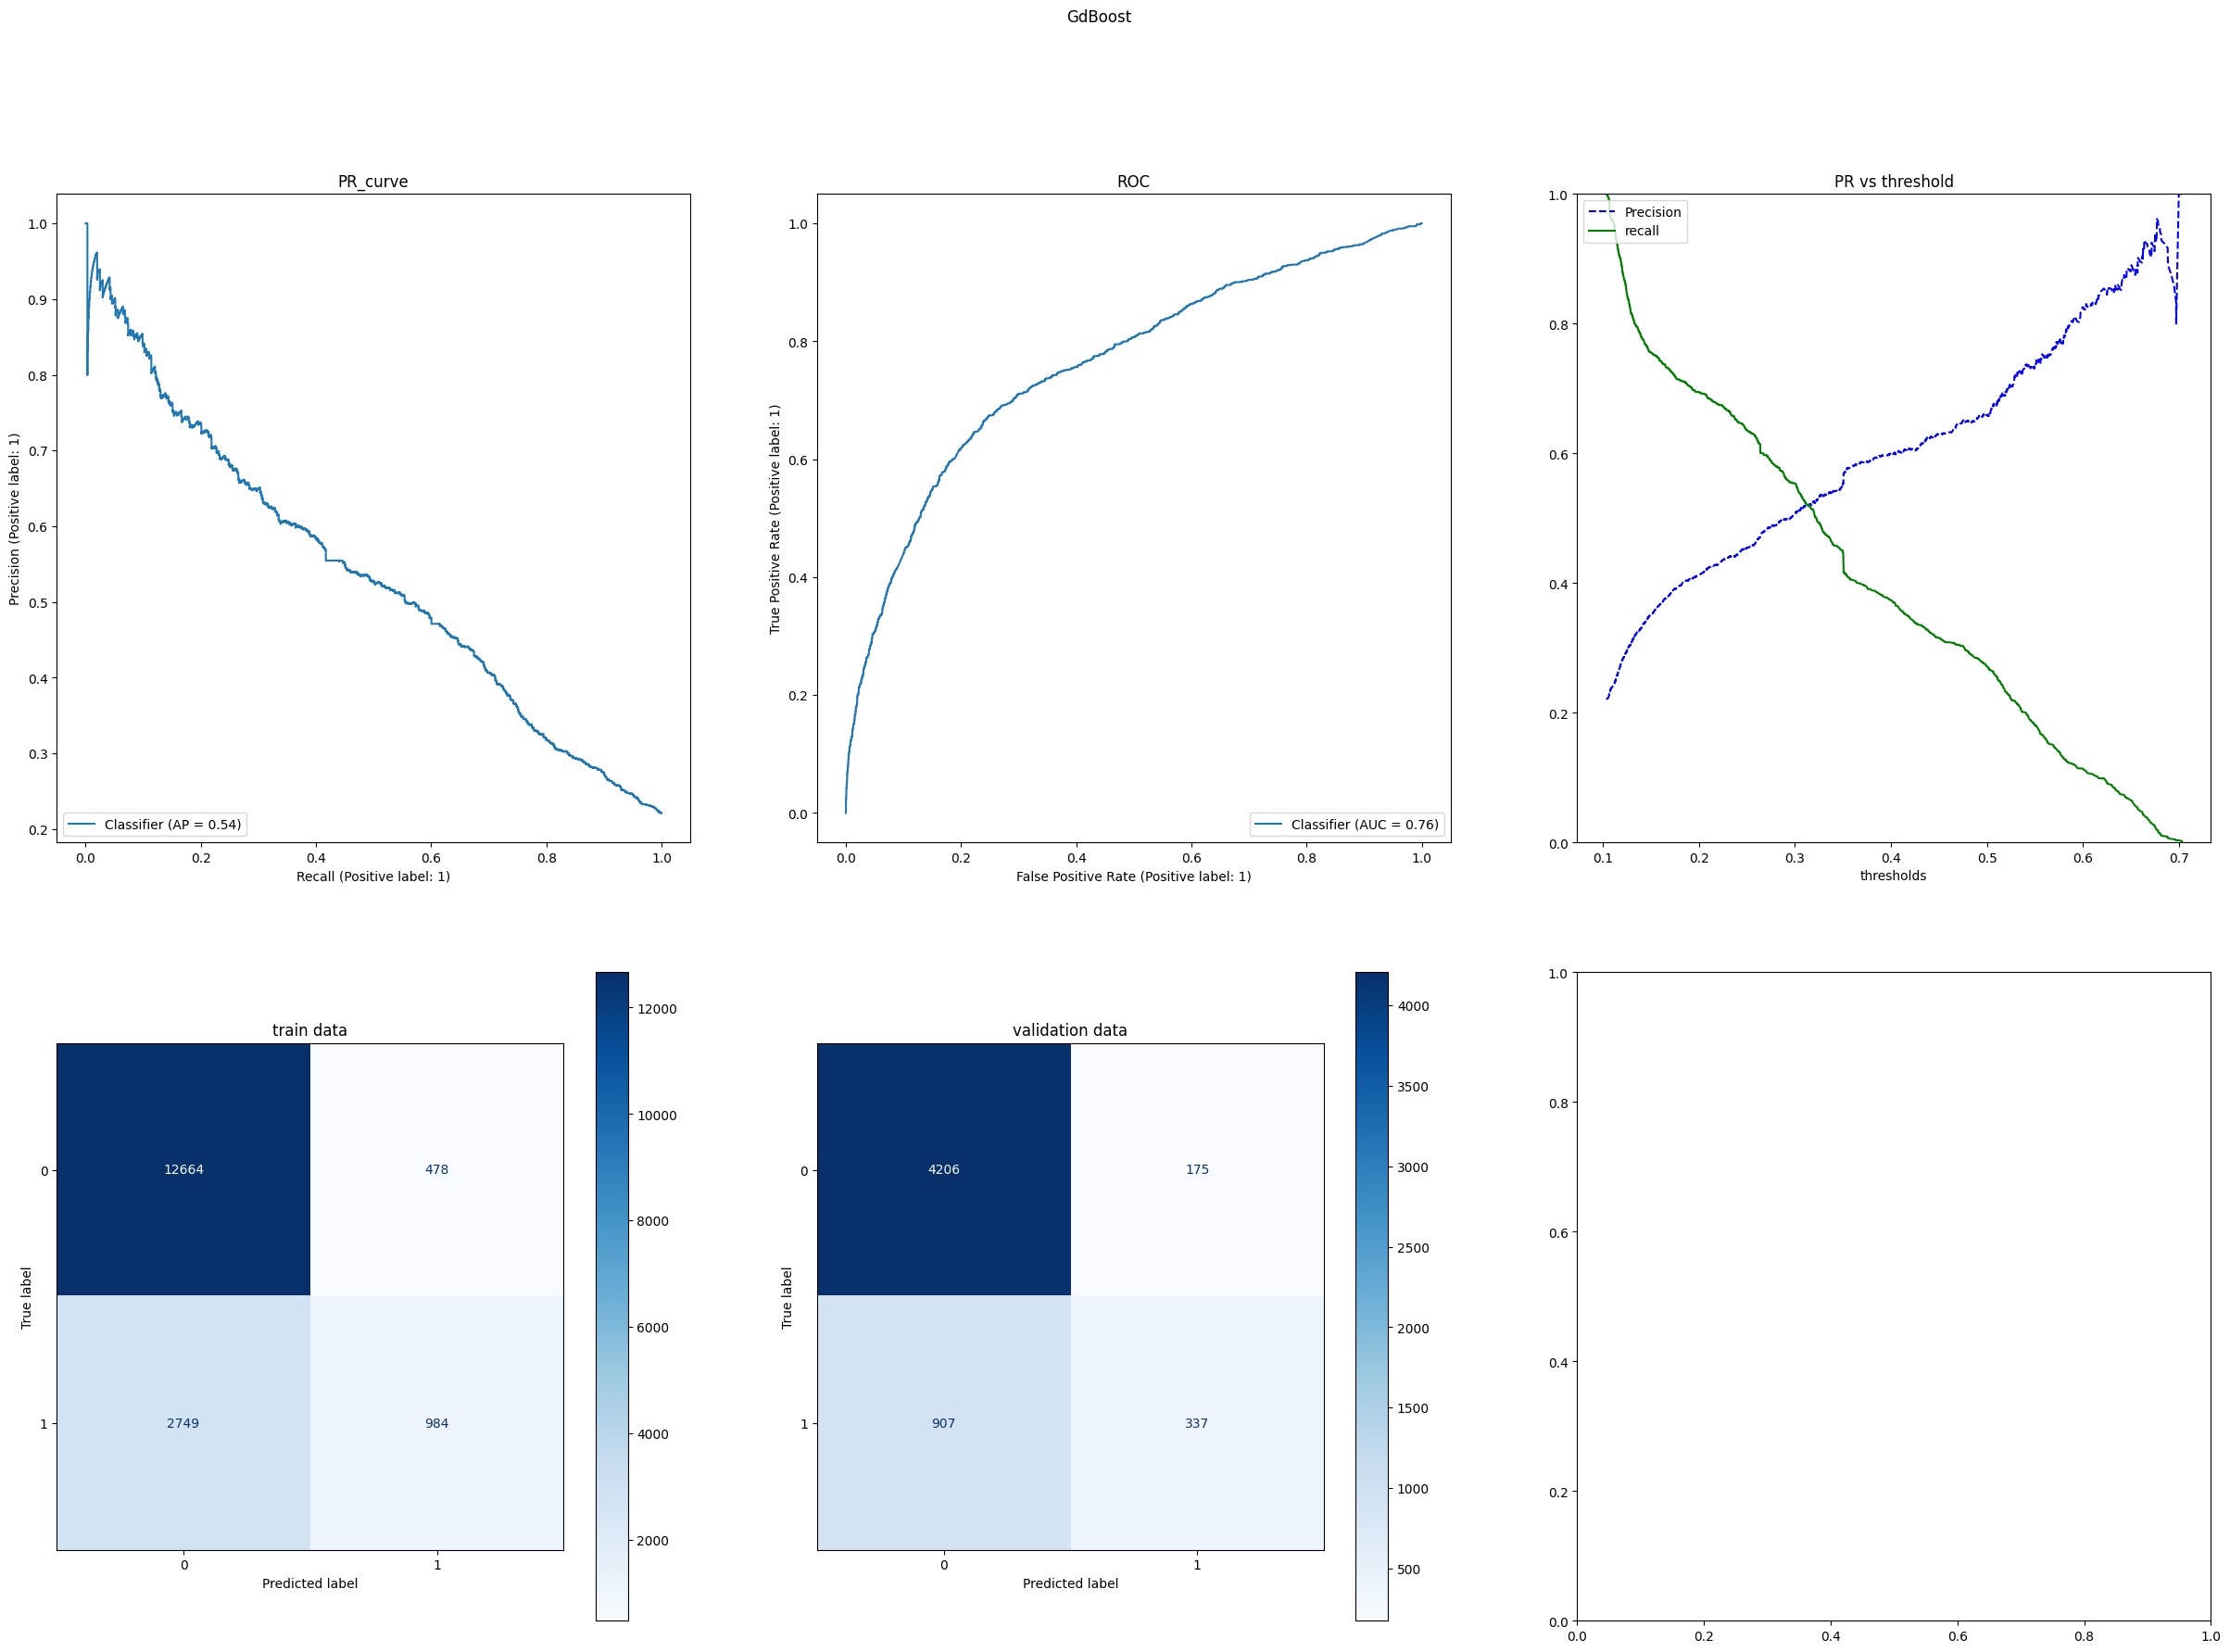

In [56]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [57]:
case_name ='raw,reg'

print(case_name)

raw,reg


Tree
[[4160  221]
 [ 781  463]]

train scores
accuracy : 0.8289777777777778
precision : 0.7120681021532298
recall : 0.38092686847039914
f1_score: 0.4963350785340313

Val scores
accuracy : 0.8218666666666666
precision : 0.6769005847953217
recall : 0.3721864951768489
f1_score: 0.4802904564315353


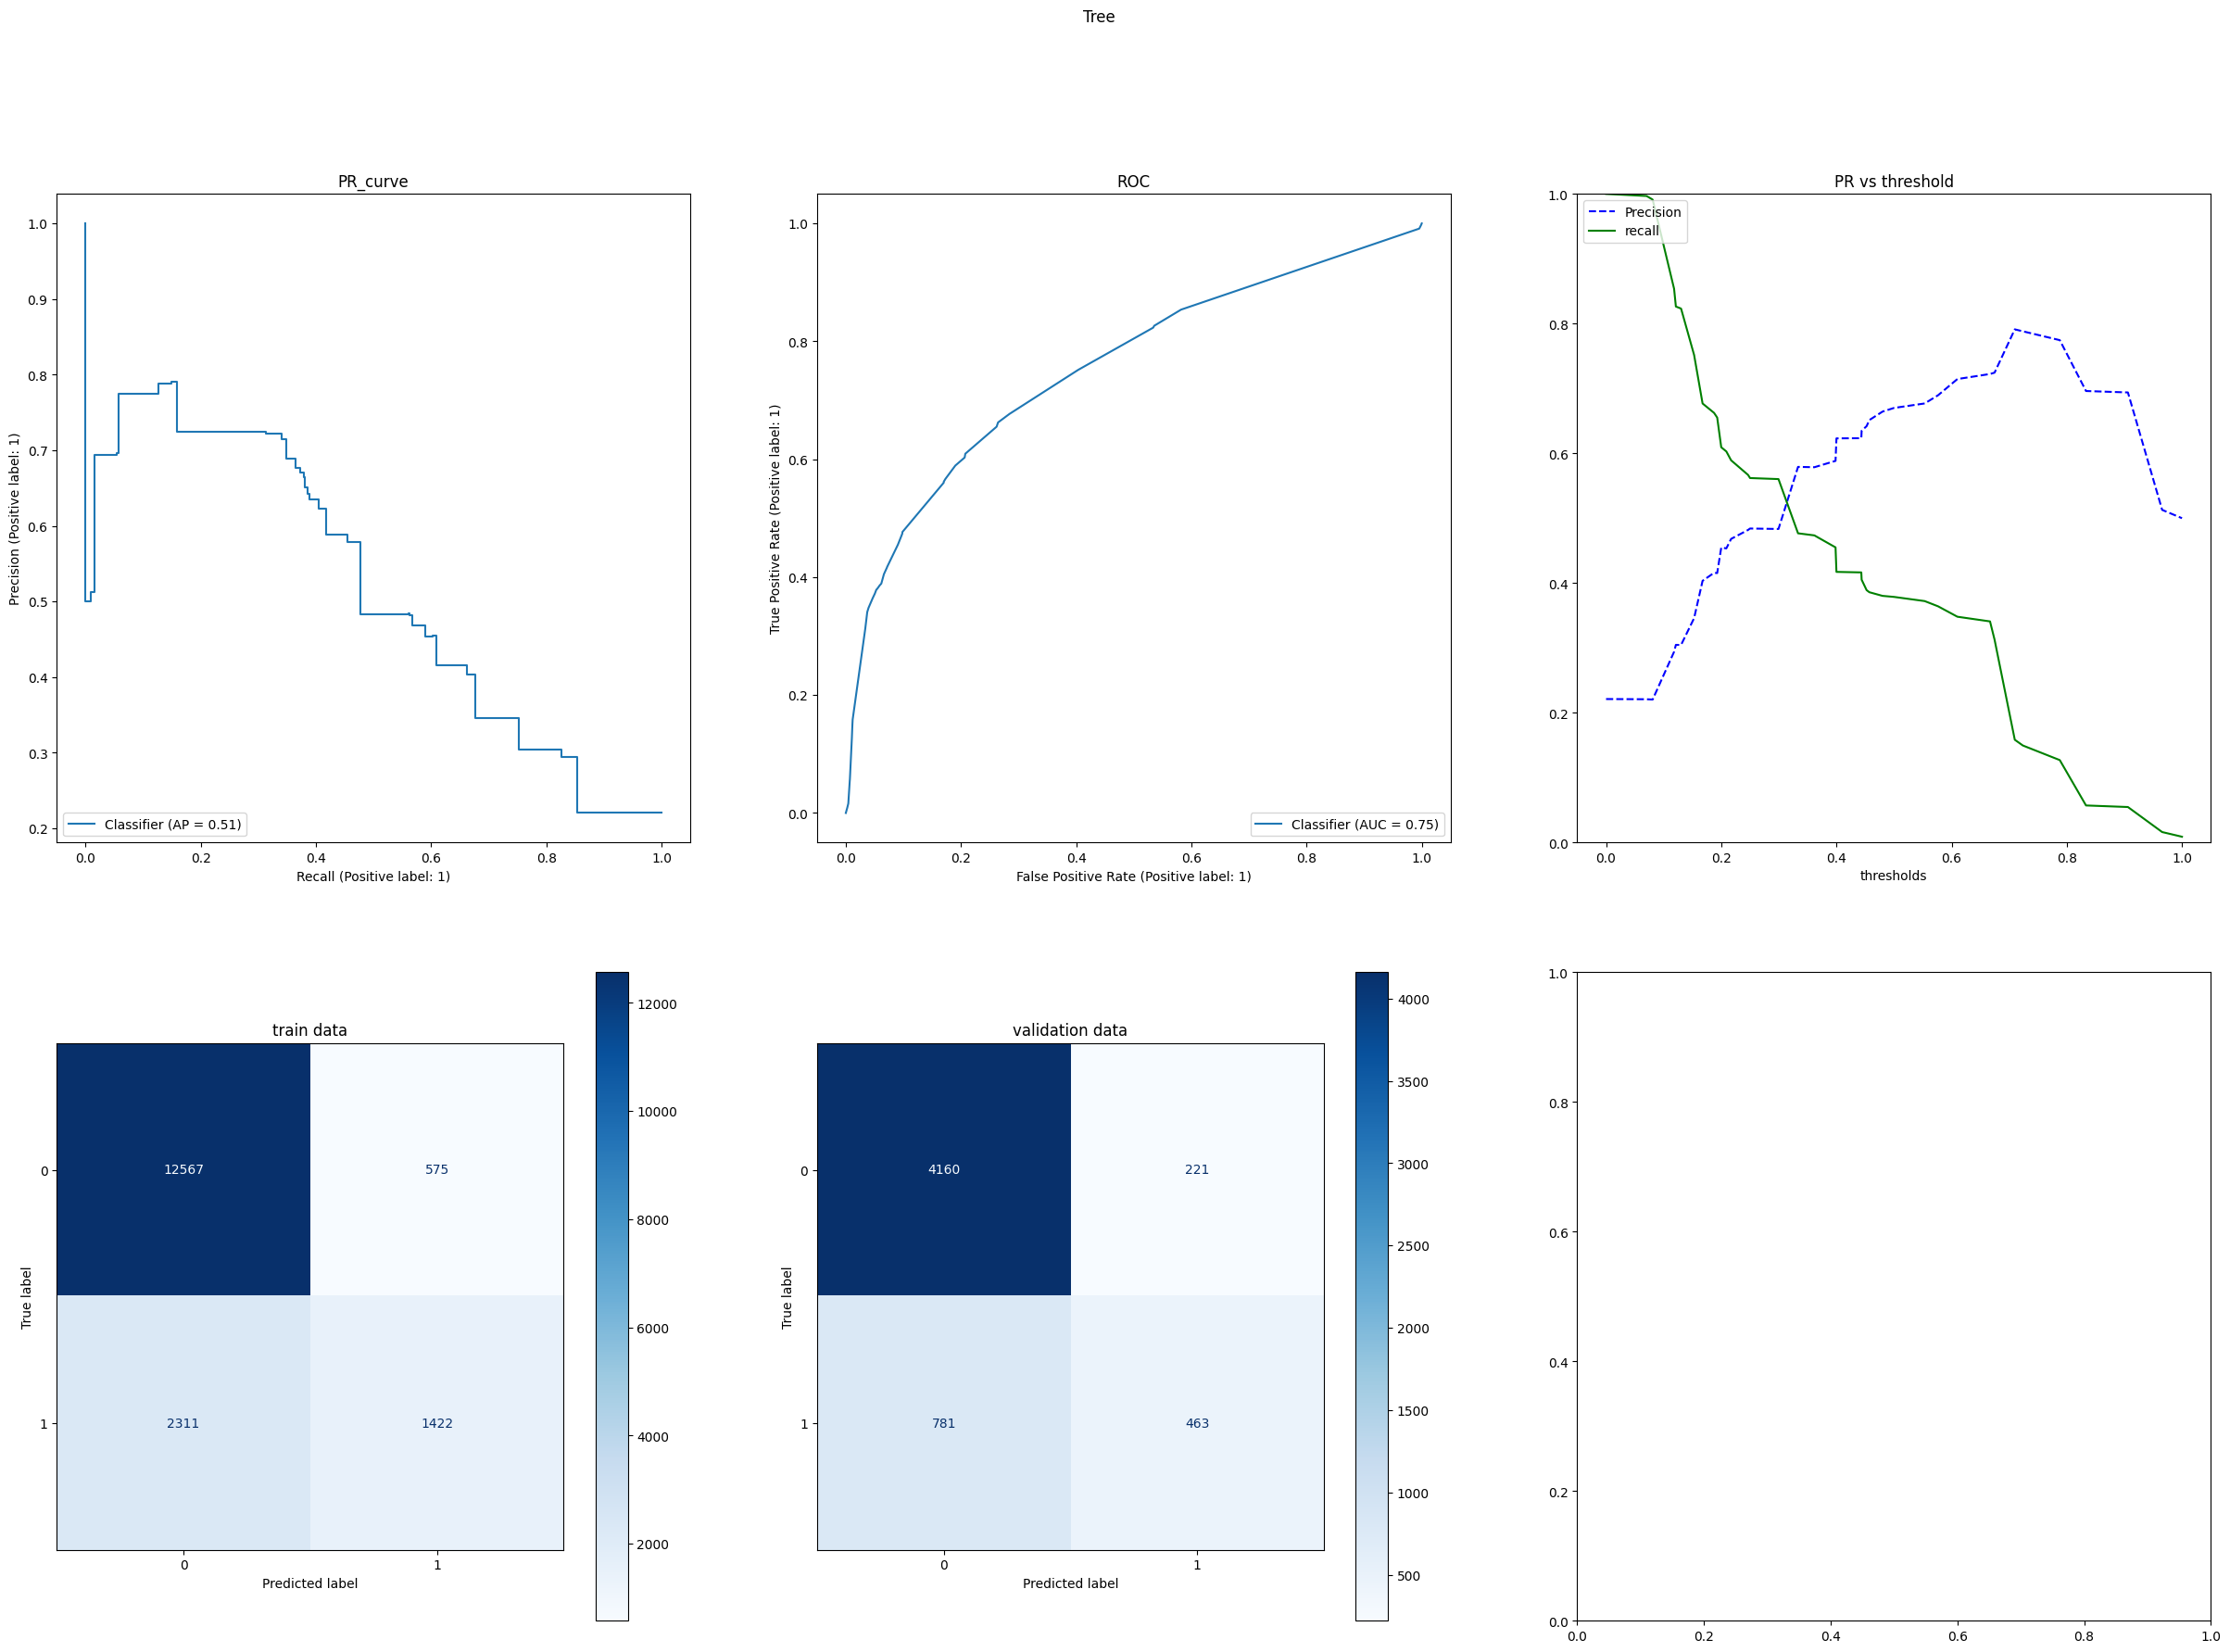

Forest
[[4205  176]
 [ 857  387]]

train scores
accuracy : 0.8250074074074074
precision : 0.7401477832512315
recall : 0.32199303509241894
f1_score: 0.44875863356356166

Val scores
accuracy : 0.8163555555555555
precision : 0.6873889875666075
recall : 0.31109324758842444
f1_score: 0.42833425567238514


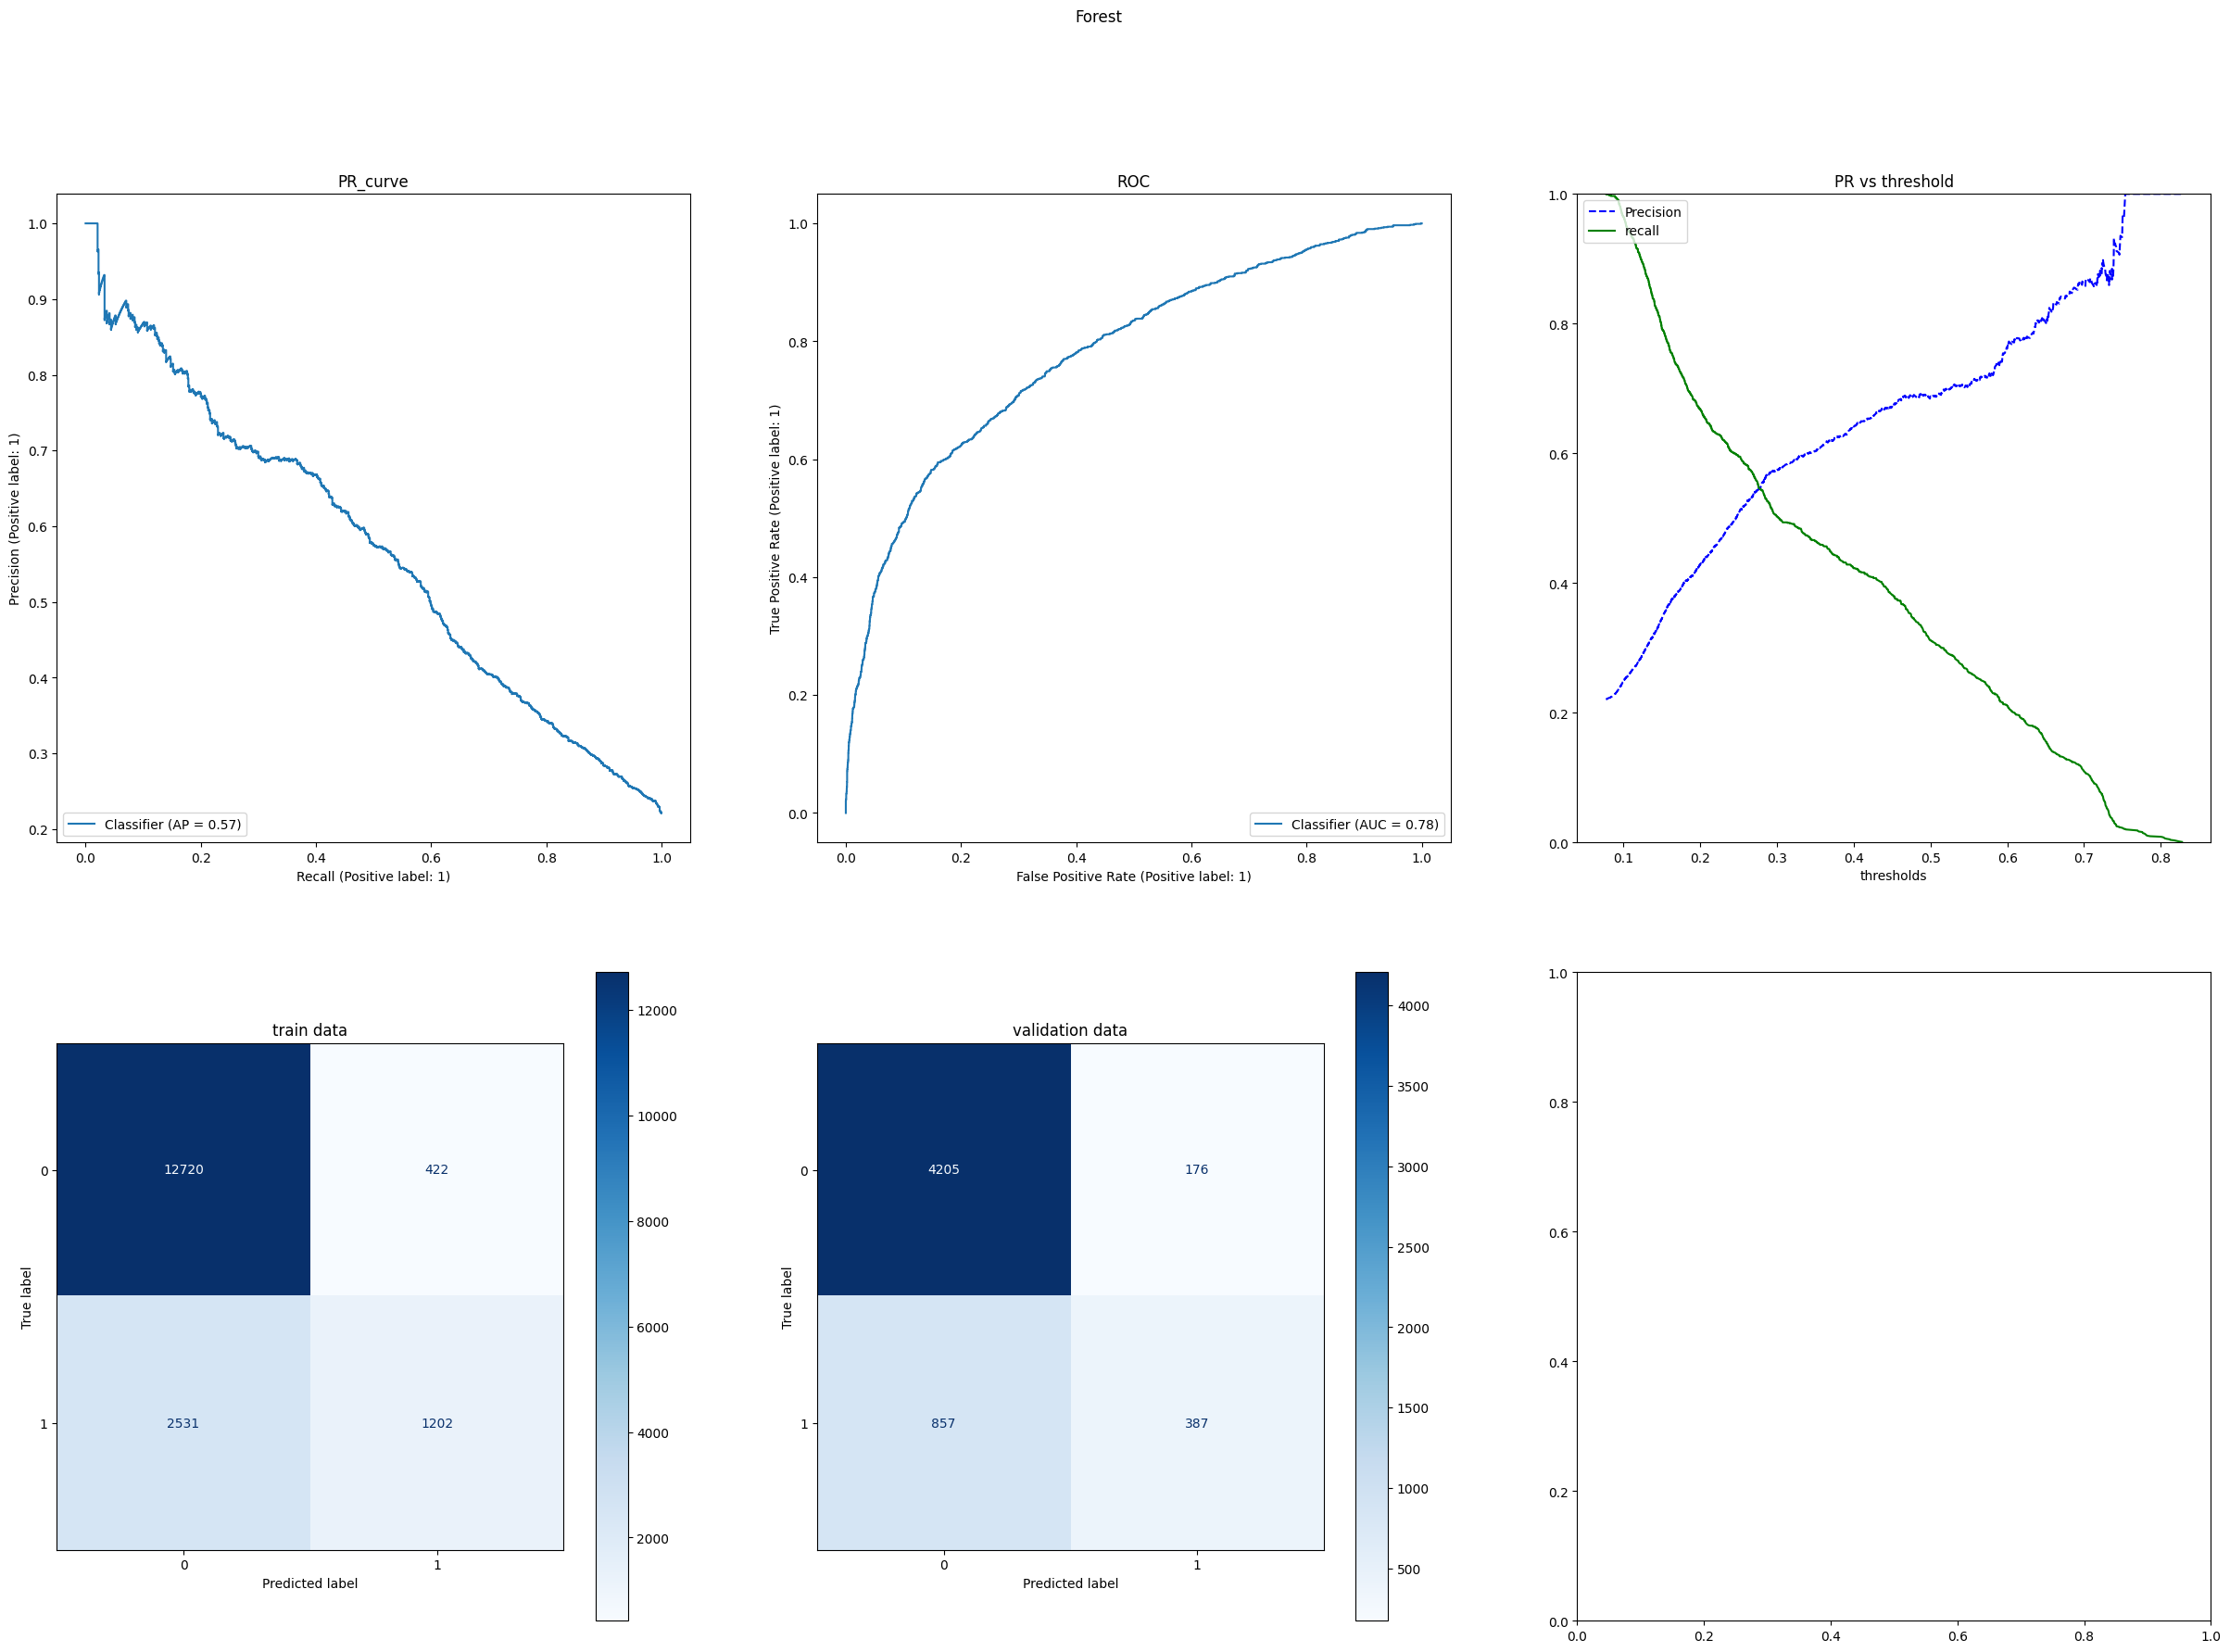

Ada
[[4203  178]
 [ 821  423]]

train scores
accuracy : 0.8181333333333334
precision : 0.688422247446084
recall : 0.324939726761318
f1_score: 0.44149226569608735

Val scores
accuracy : 0.8224
precision : 0.7038269550748752
recall : 0.340032154340836
f1_score: 0.4585365853658537


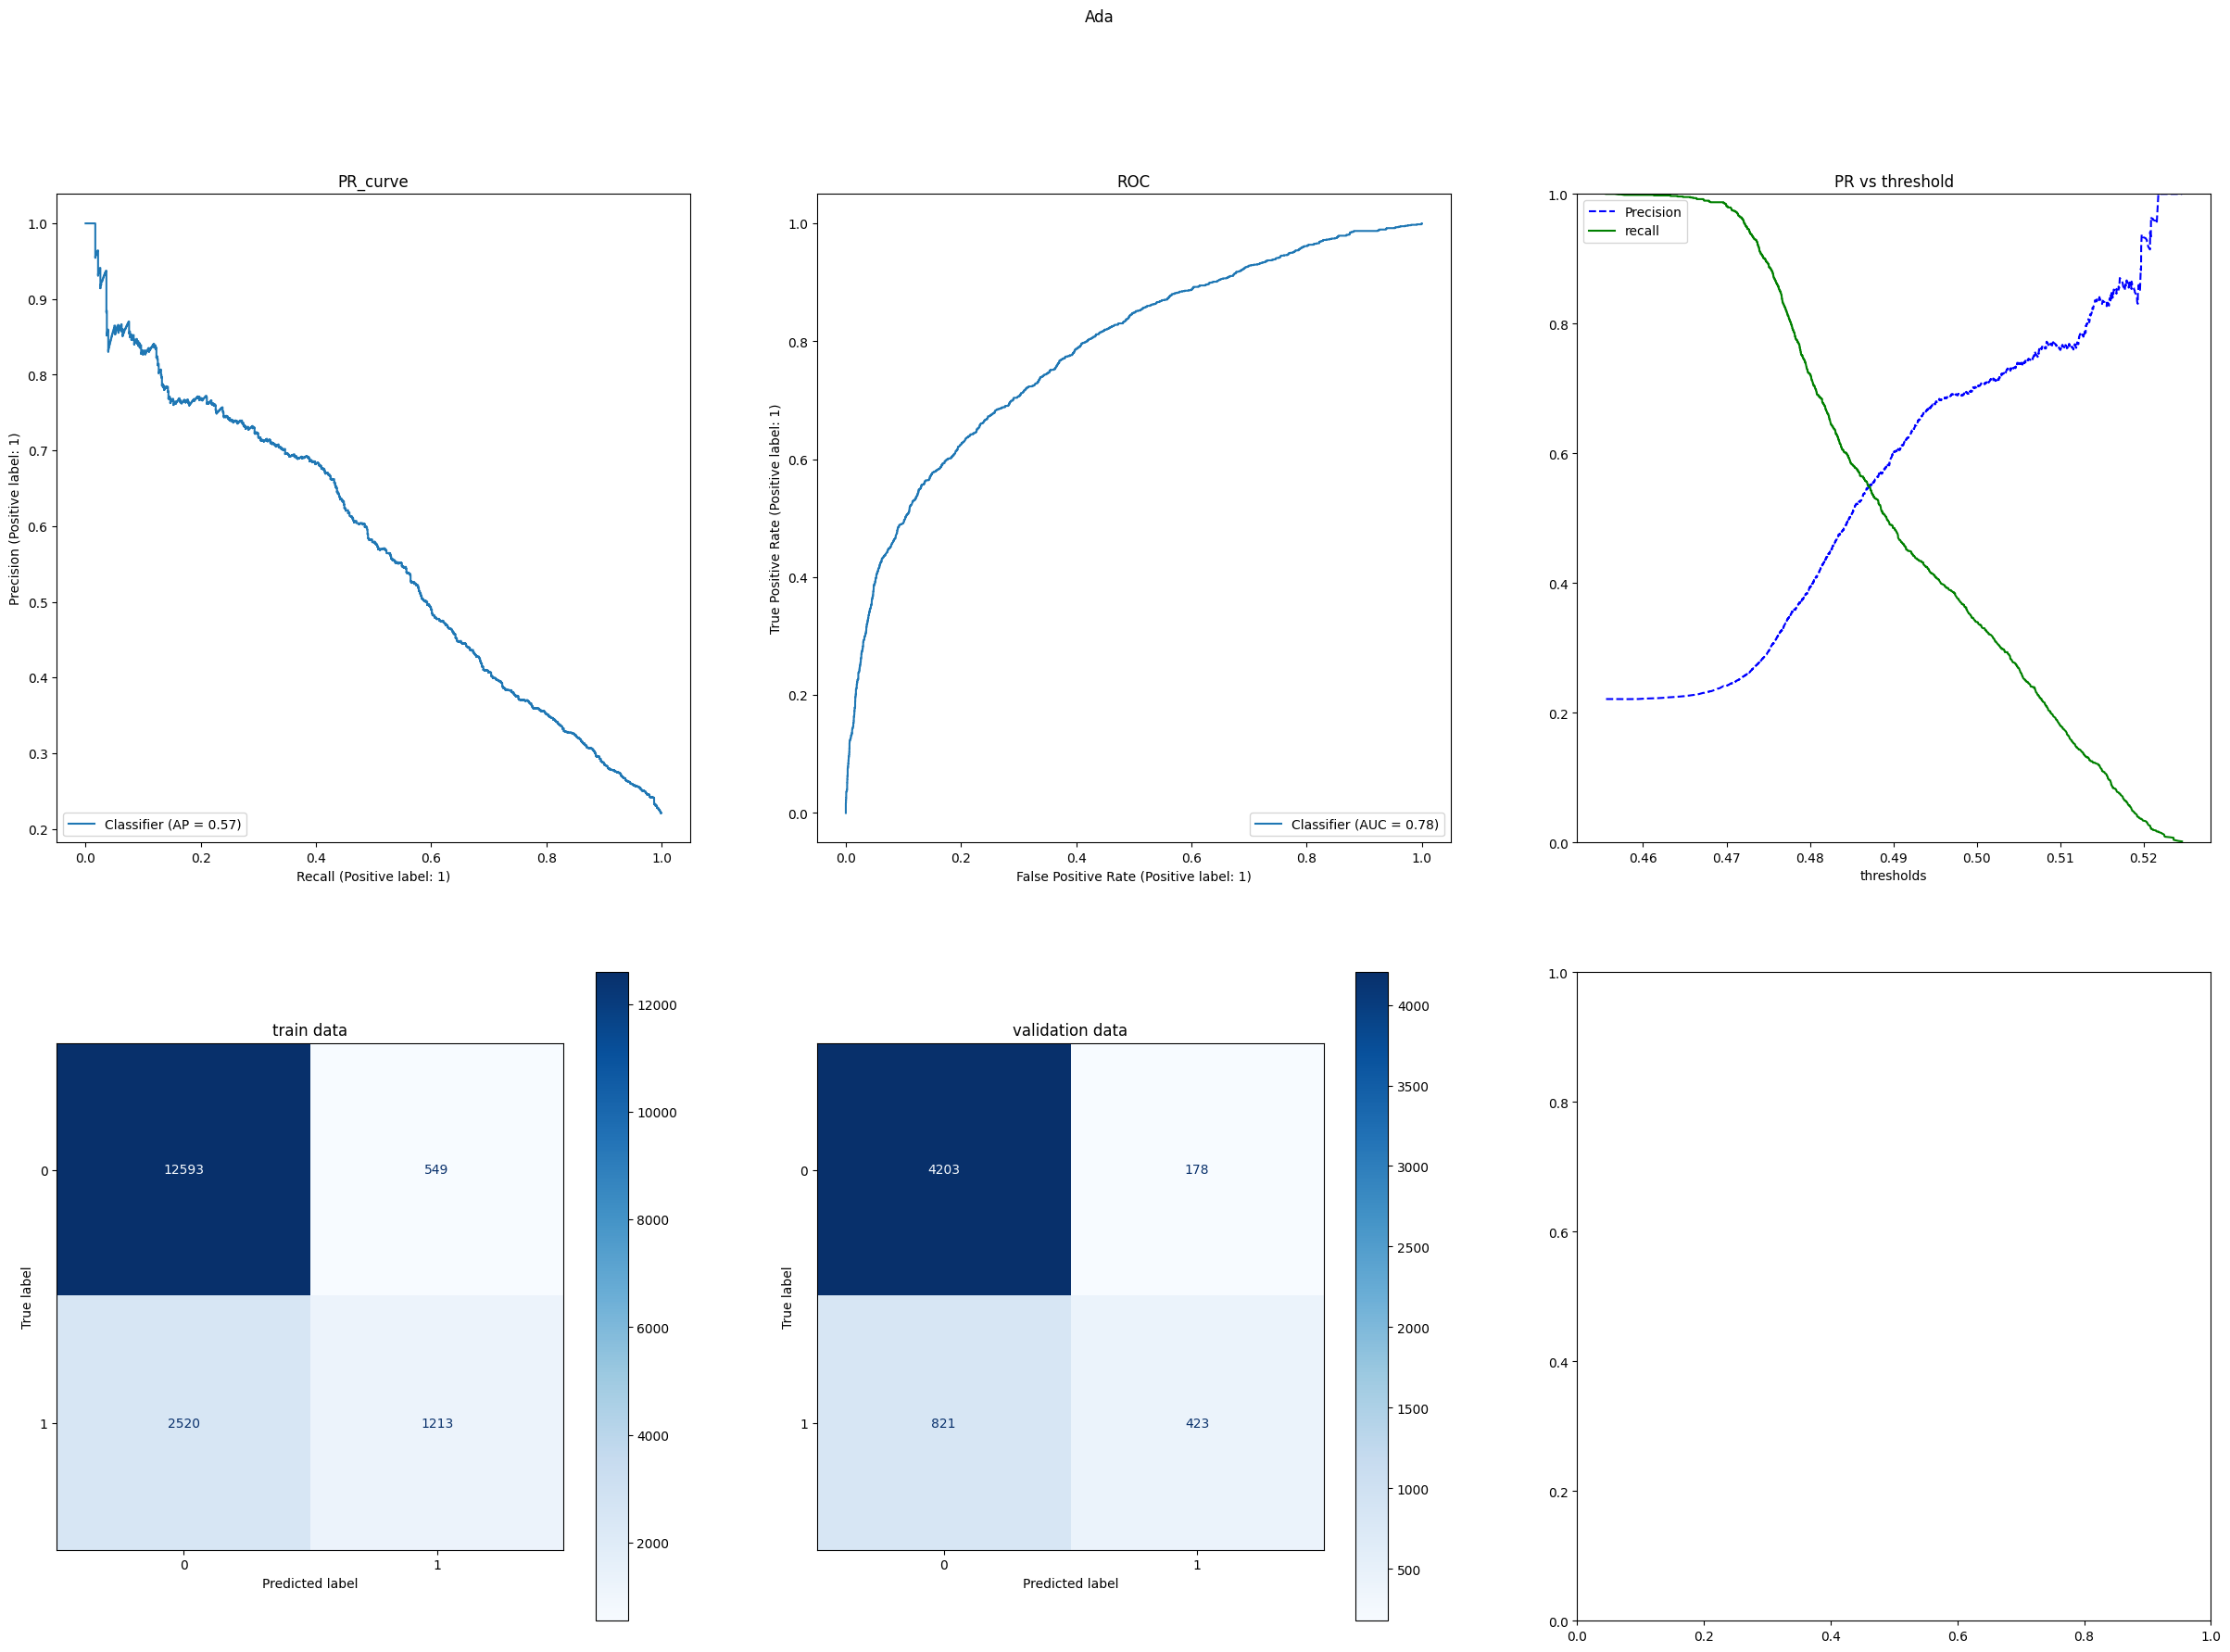

GdBoost
[[4233  148]
 [ 904  340]]

train scores
accuracy : 0.8137481481481481
precision : 0.7113180515759312
recall : 0.2660058933833378
f1_score: 0.3872099824527198

Val scores
accuracy : 0.8129777777777778
precision : 0.6967213114754098
recall : 0.2733118971061093
f1_score: 0.3926096997690531


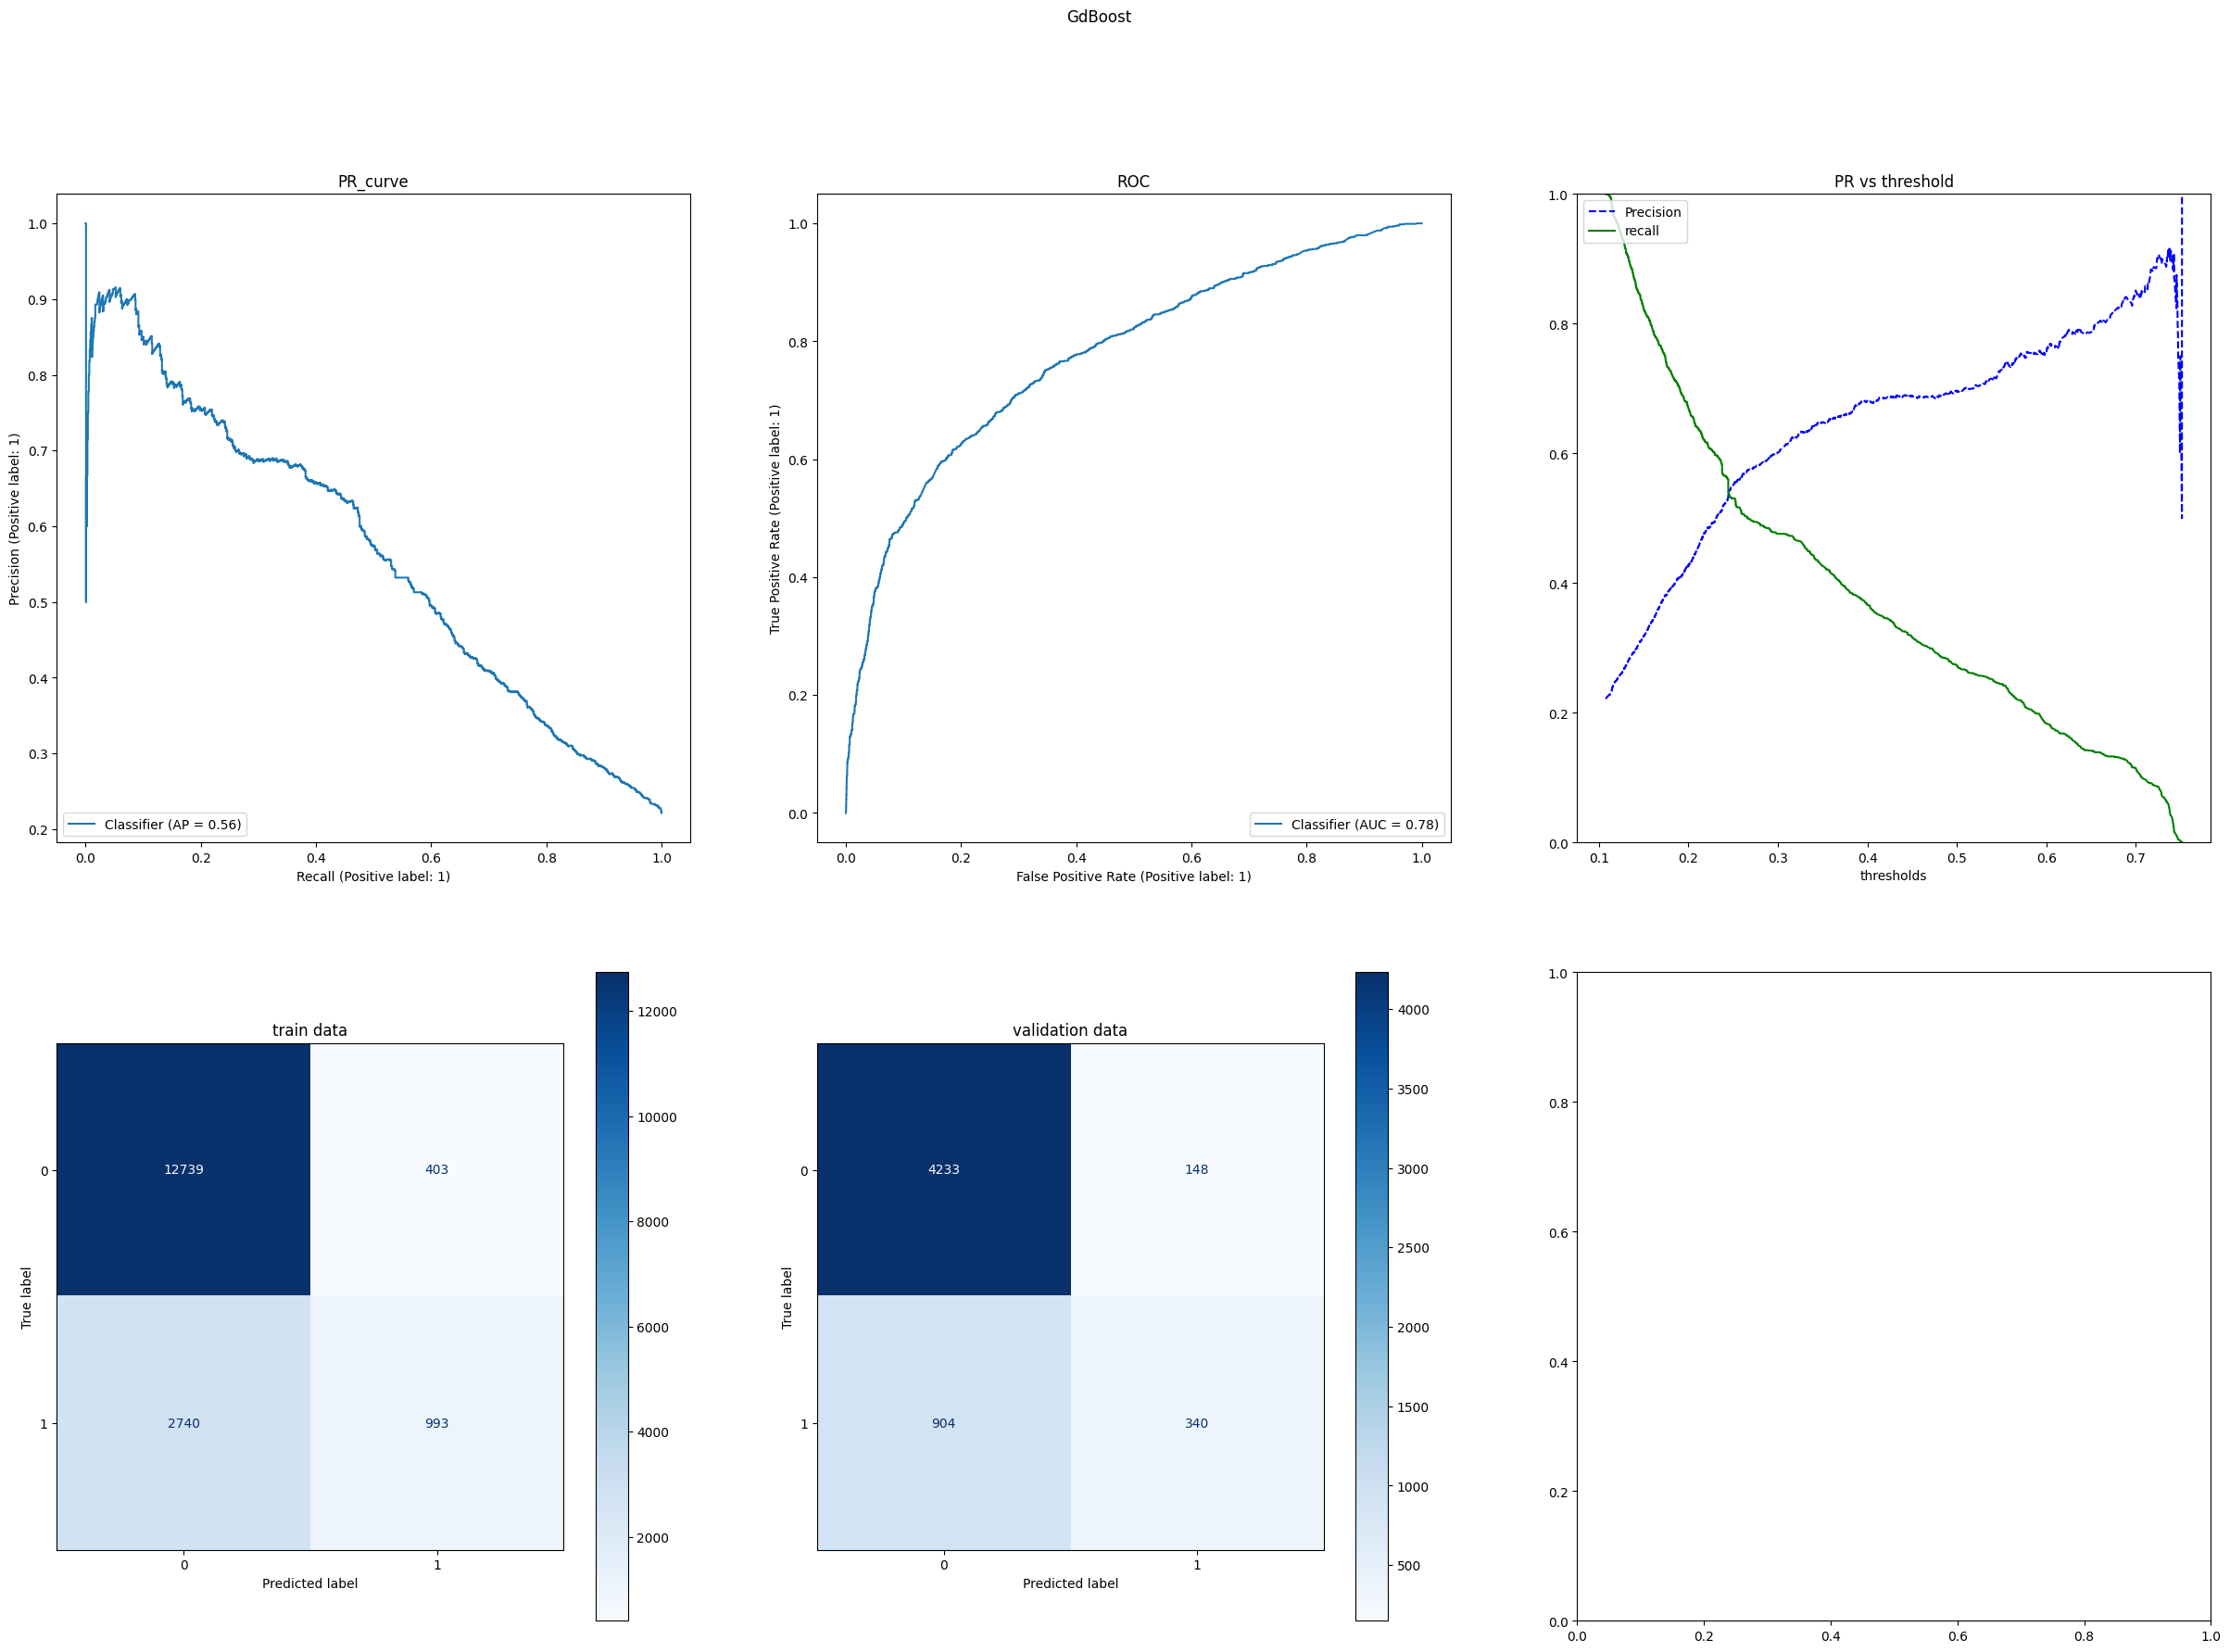

In [58]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [59]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[USAGE,DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,PAY,BILL])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,PAY,BILL])
my_elementary_trans_5 = ElementaryExtractor([USAGE,DIFF])


extractors = [NonTsPass(),
               length_5_bop,
                length_6_bop,
                my_elementary_trans_5,
                my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor
A = my_base_transform.fit_transform(X_train)

In [60]:
case_name = 'non_log,raw,reg'

print(case_name)

non_log,raw,reg


Tree
[[4160  221]
 [ 781  463]]

train scores
accuracy : 0.8289777777777778
precision : 0.7120681021532298
recall : 0.38092686847039914
f1_score: 0.4963350785340313

Val scores
accuracy : 0.8218666666666666
precision : 0.6769005847953217
recall : 0.3721864951768489
f1_score: 0.4802904564315353


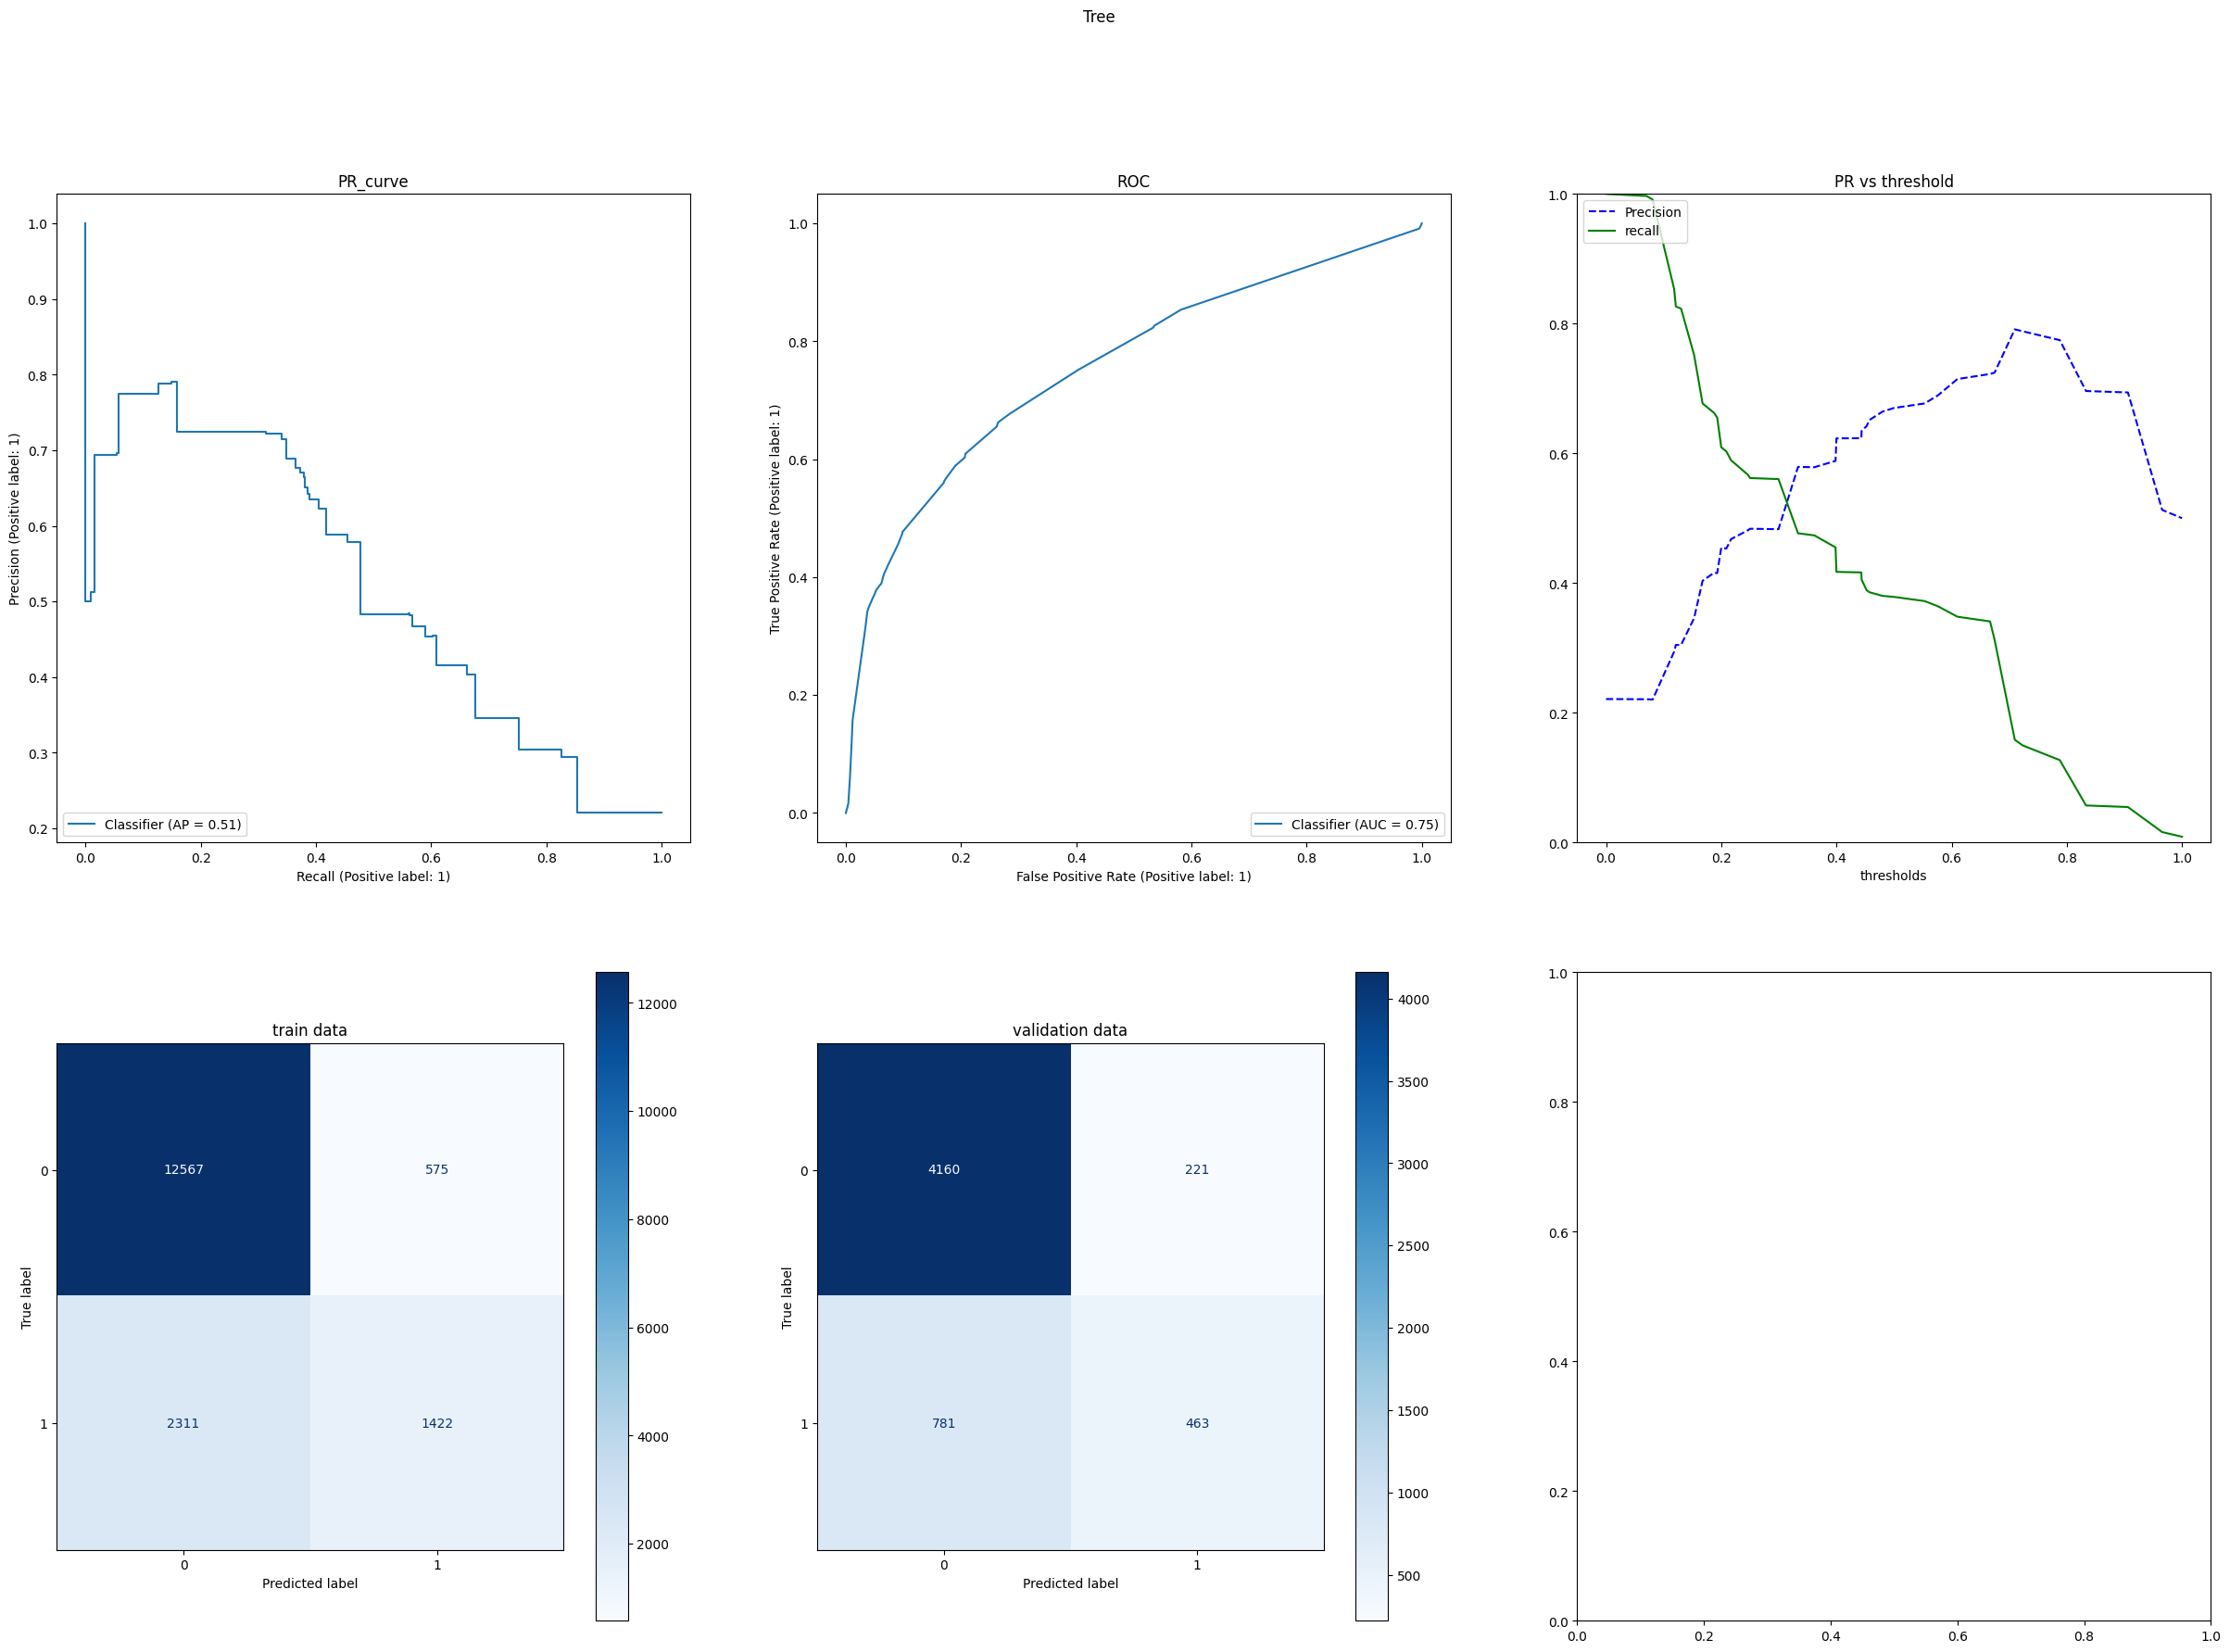

Forest
[[4204  177]
 [ 857  387]]

train scores
accuracy : 0.8250074074074074
precision : 0.7401477832512315
recall : 0.32199303509241894
f1_score: 0.44875863356356166

Val scores
accuracy : 0.8161777777777778
precision : 0.6861702127659575
recall : 0.31109324758842444
f1_score: 0.42809734513274333


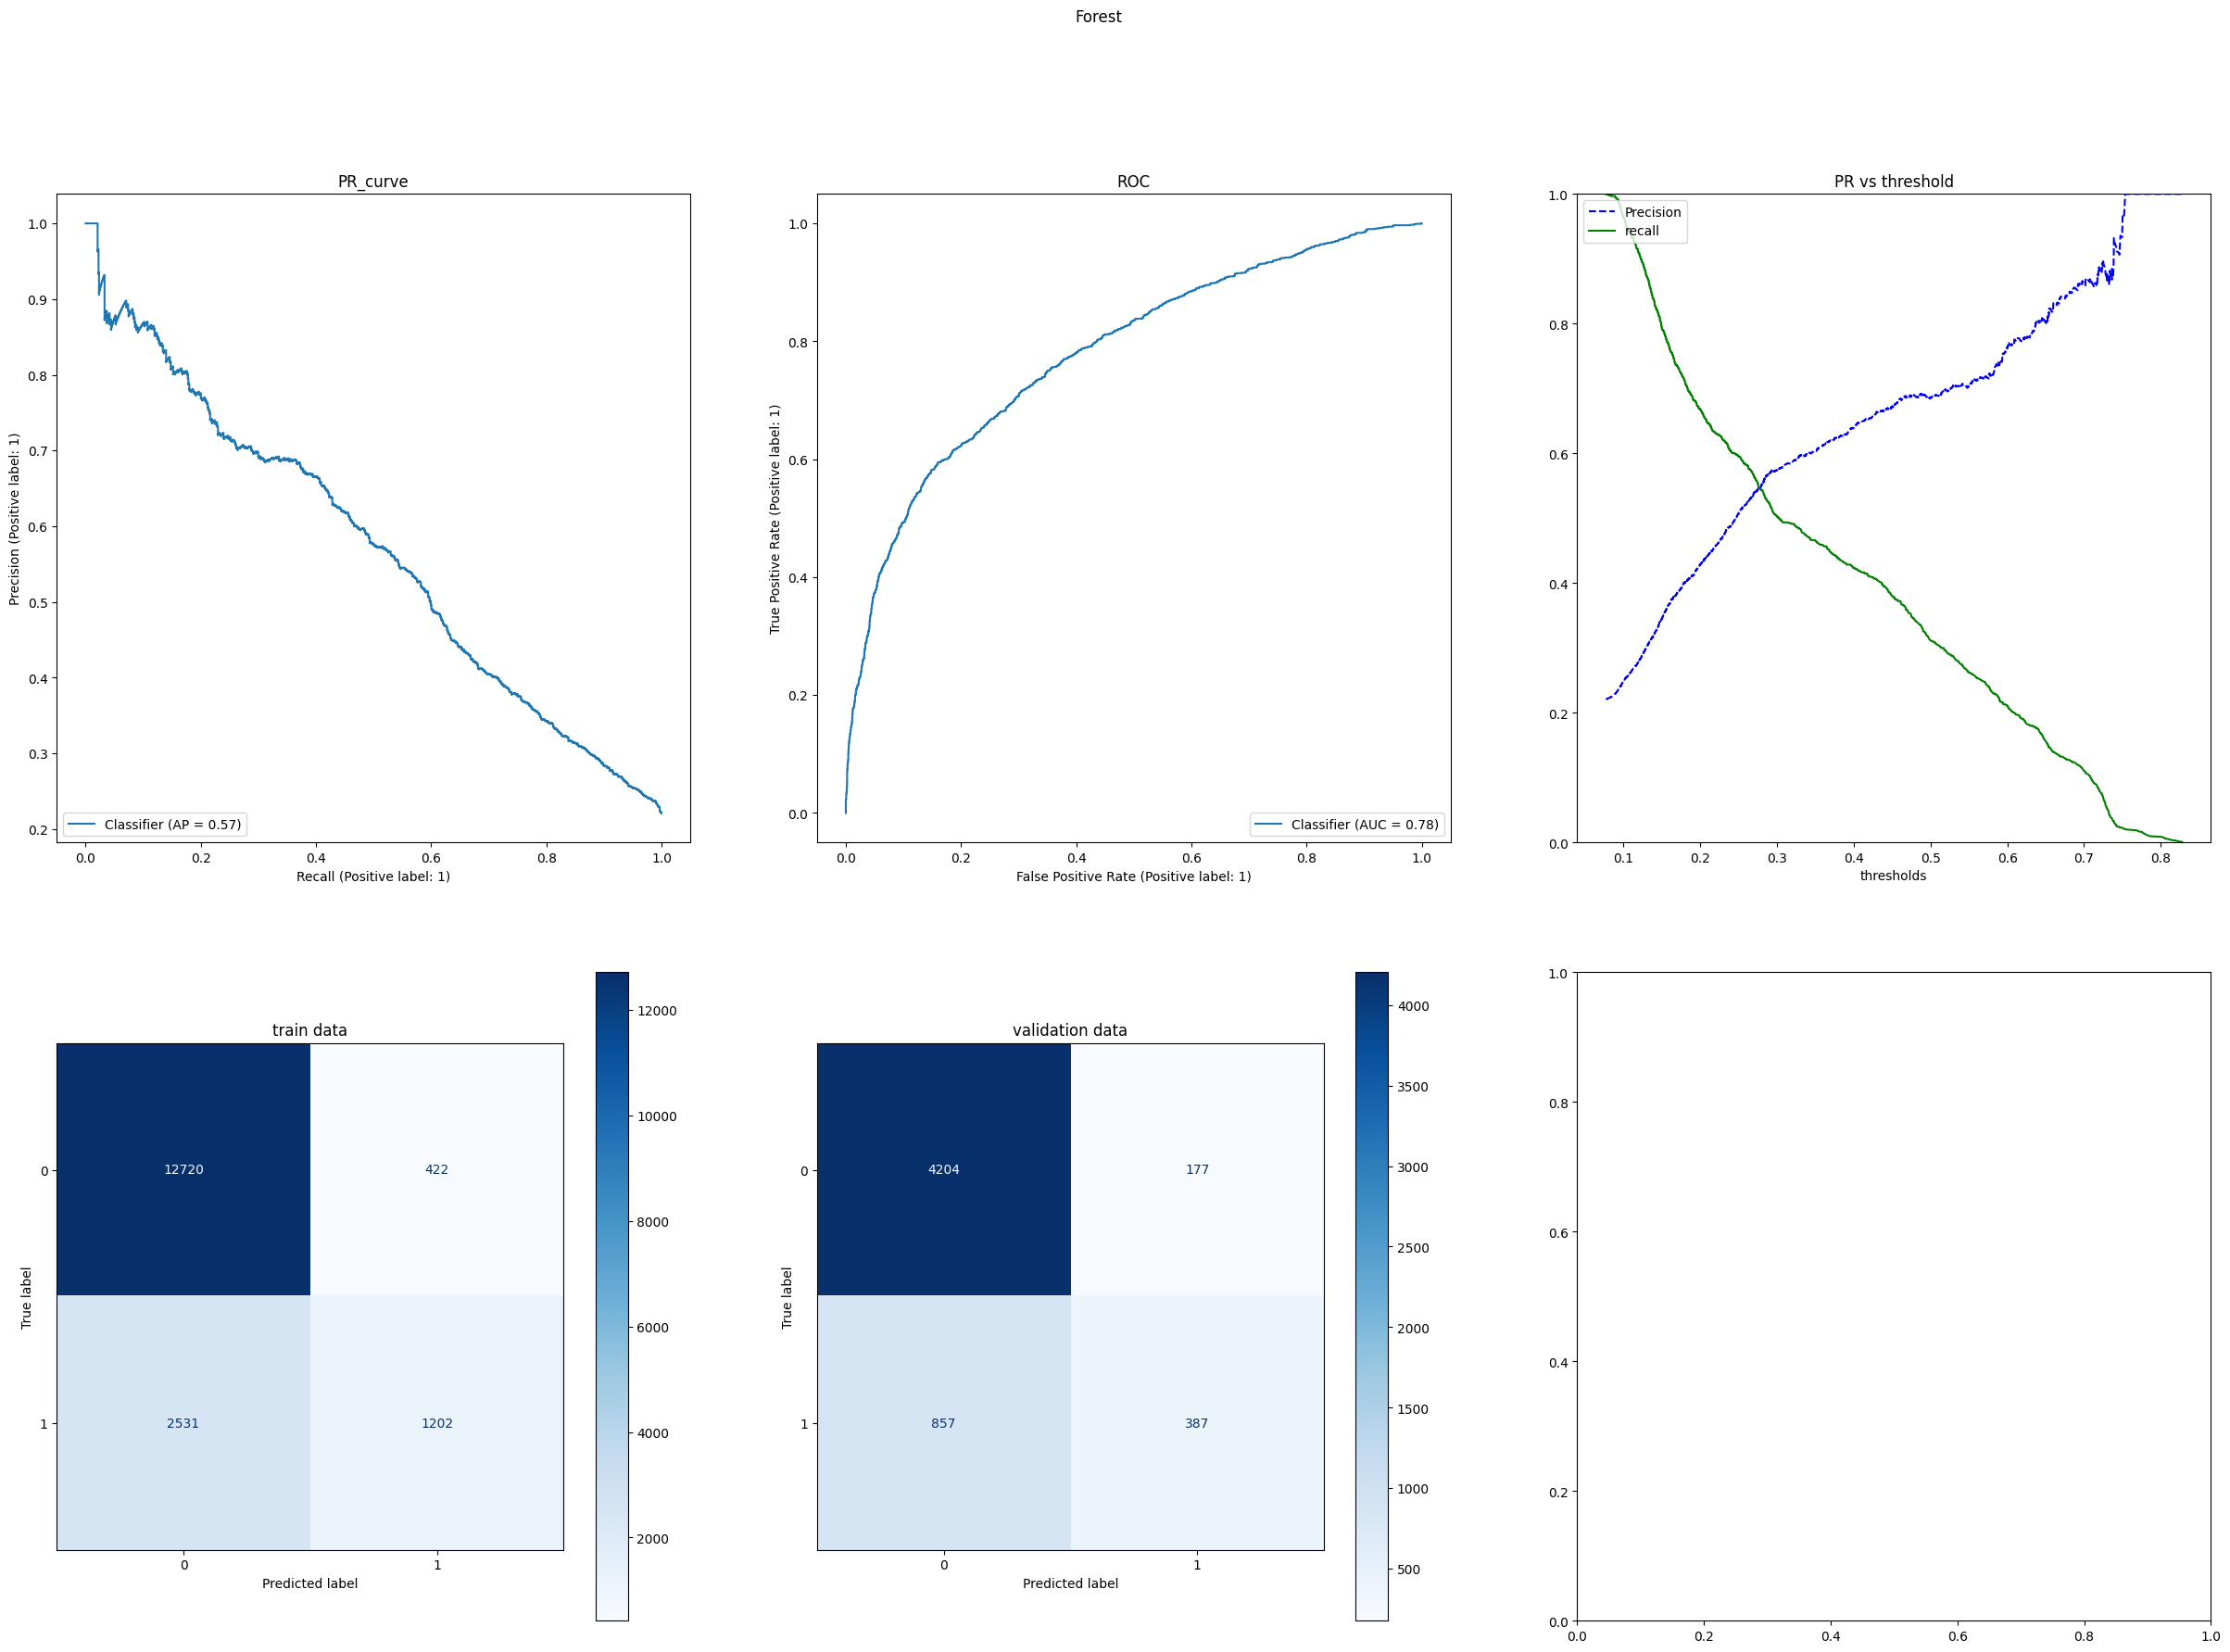

Ada
[[4203  178]
 [ 821  423]]

train scores
accuracy : 0.8181333333333334
precision : 0.688422247446084
recall : 0.324939726761318
f1_score: 0.44149226569608735

Val scores
accuracy : 0.8224
precision : 0.7038269550748752
recall : 0.340032154340836
f1_score: 0.4585365853658537


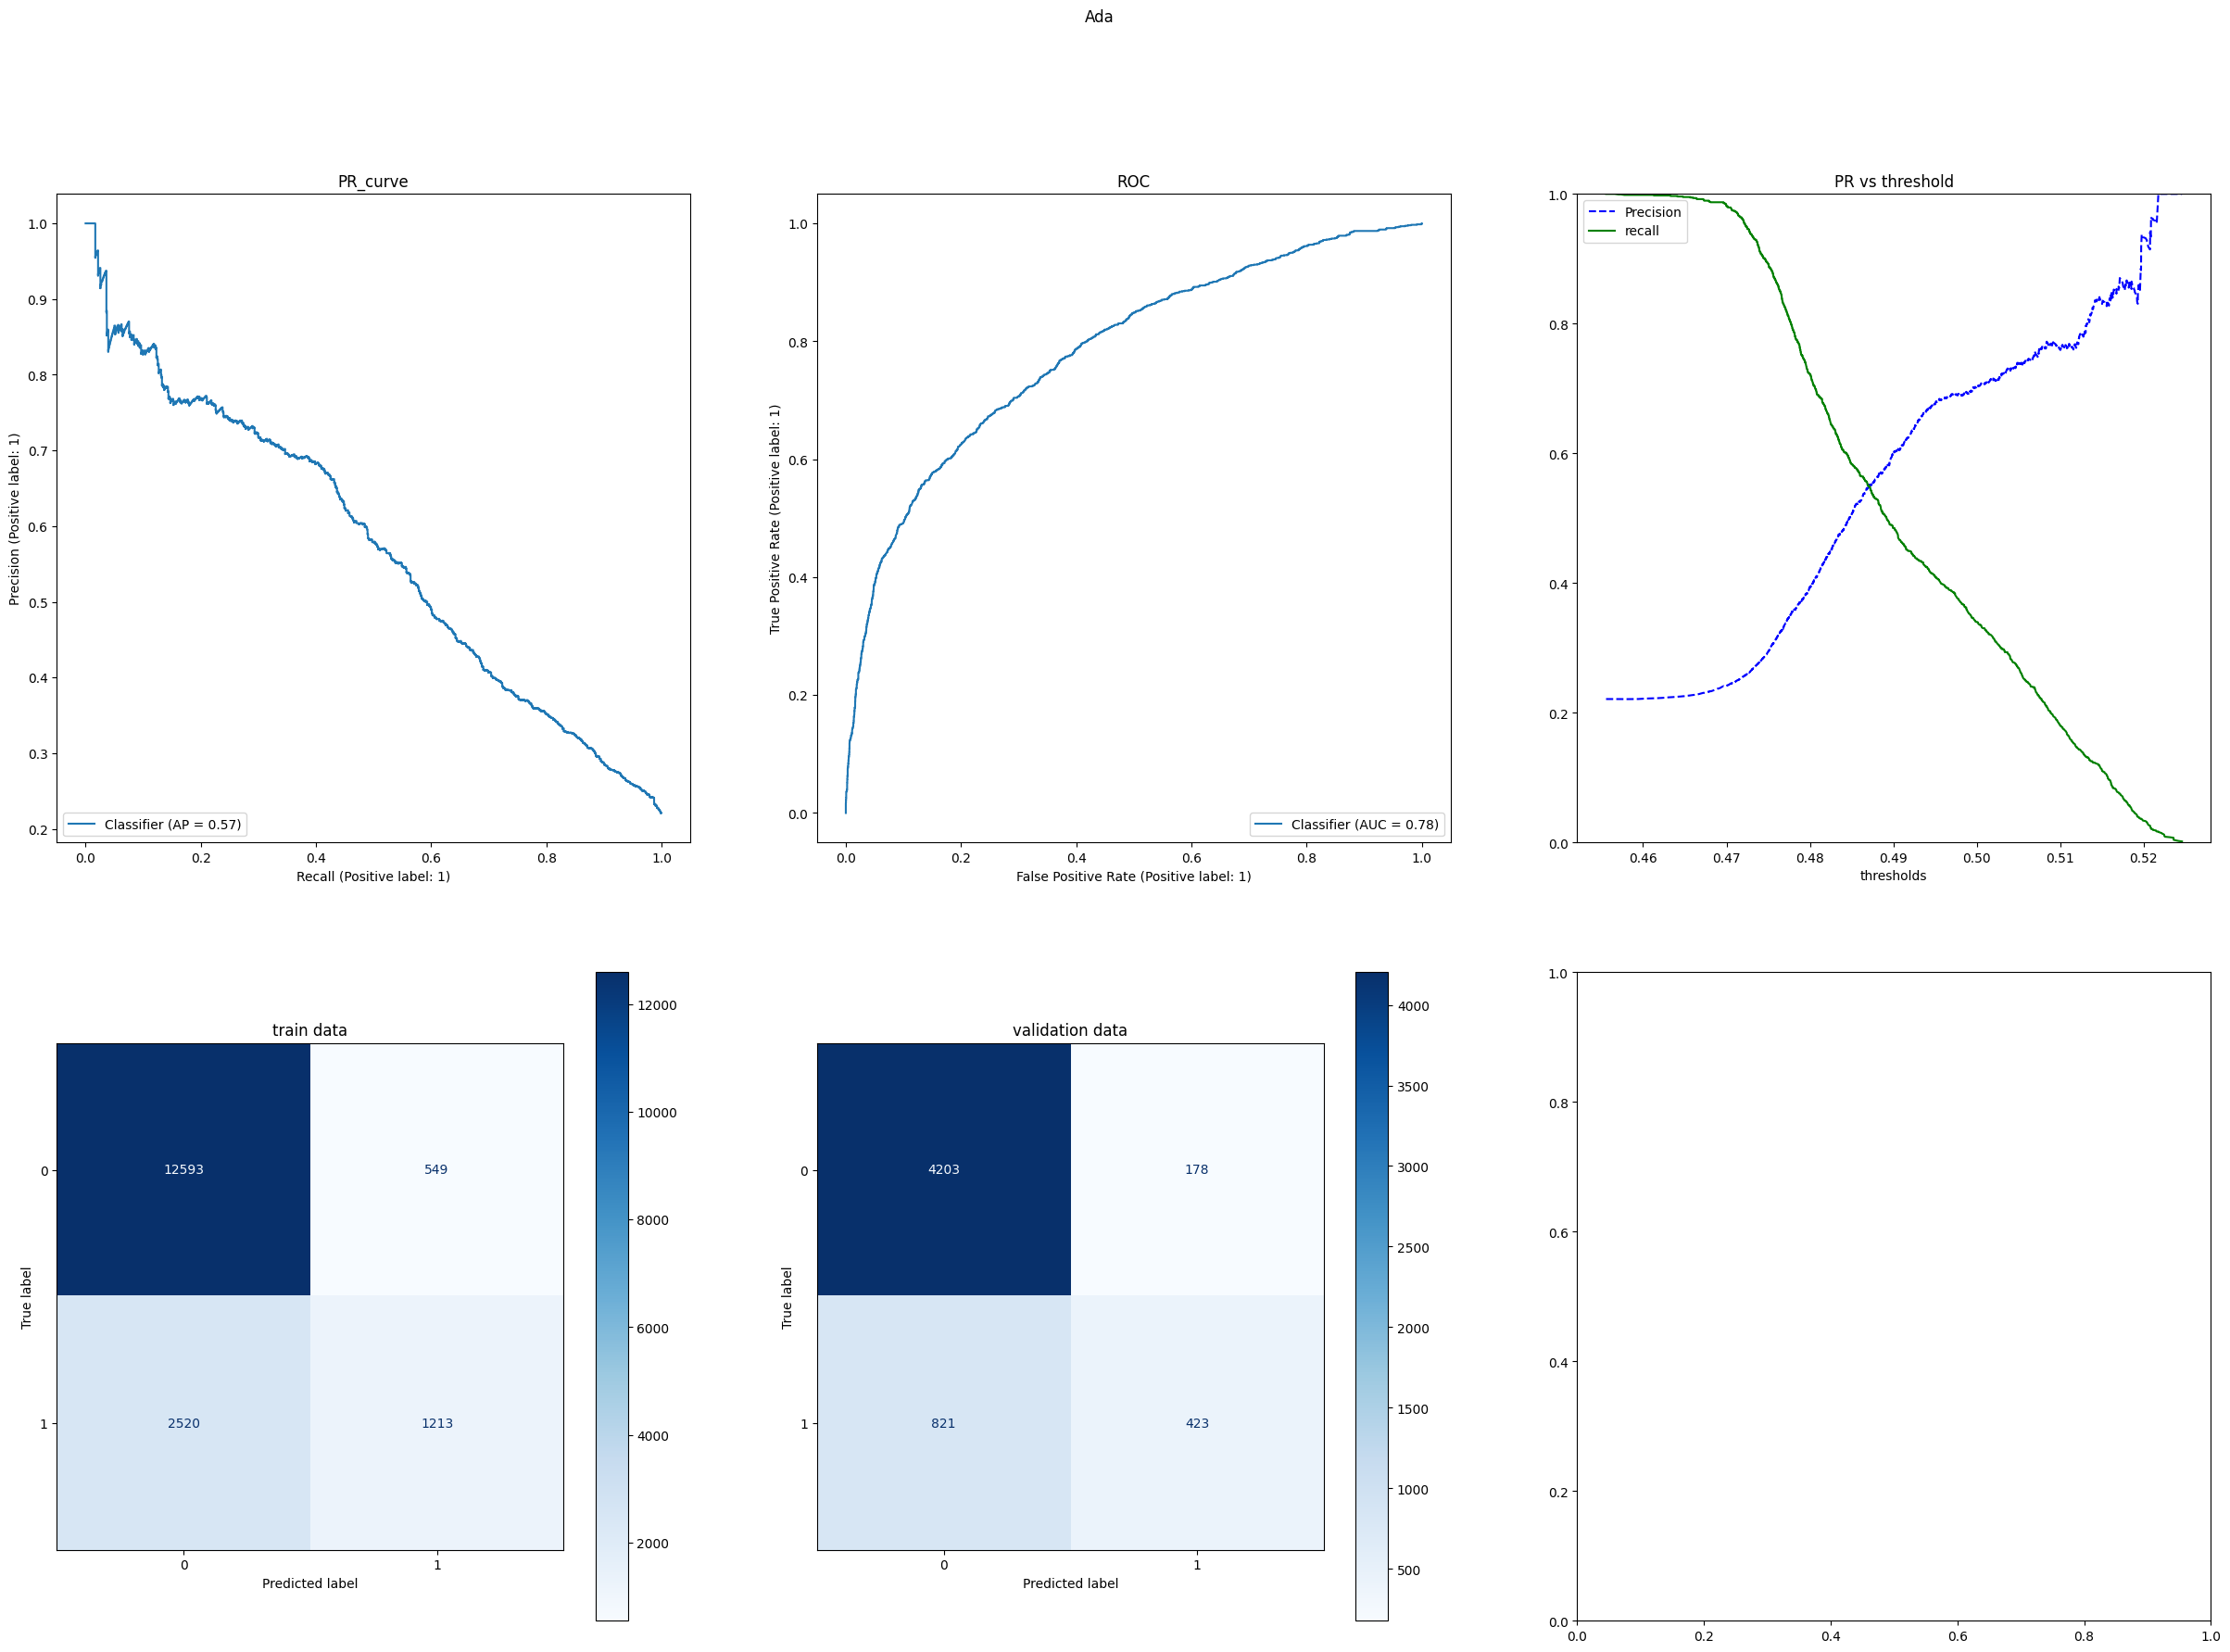

GdBoost
[[4233  148]
 [ 904  340]]

train scores
accuracy : 0.8137481481481481
precision : 0.7113180515759312
recall : 0.2660058933833378
f1_score: 0.3872099824527198

Val scores
accuracy : 0.8129777777777778
precision : 0.6967213114754098
recall : 0.2733118971061093
f1_score: 0.3926096997690531


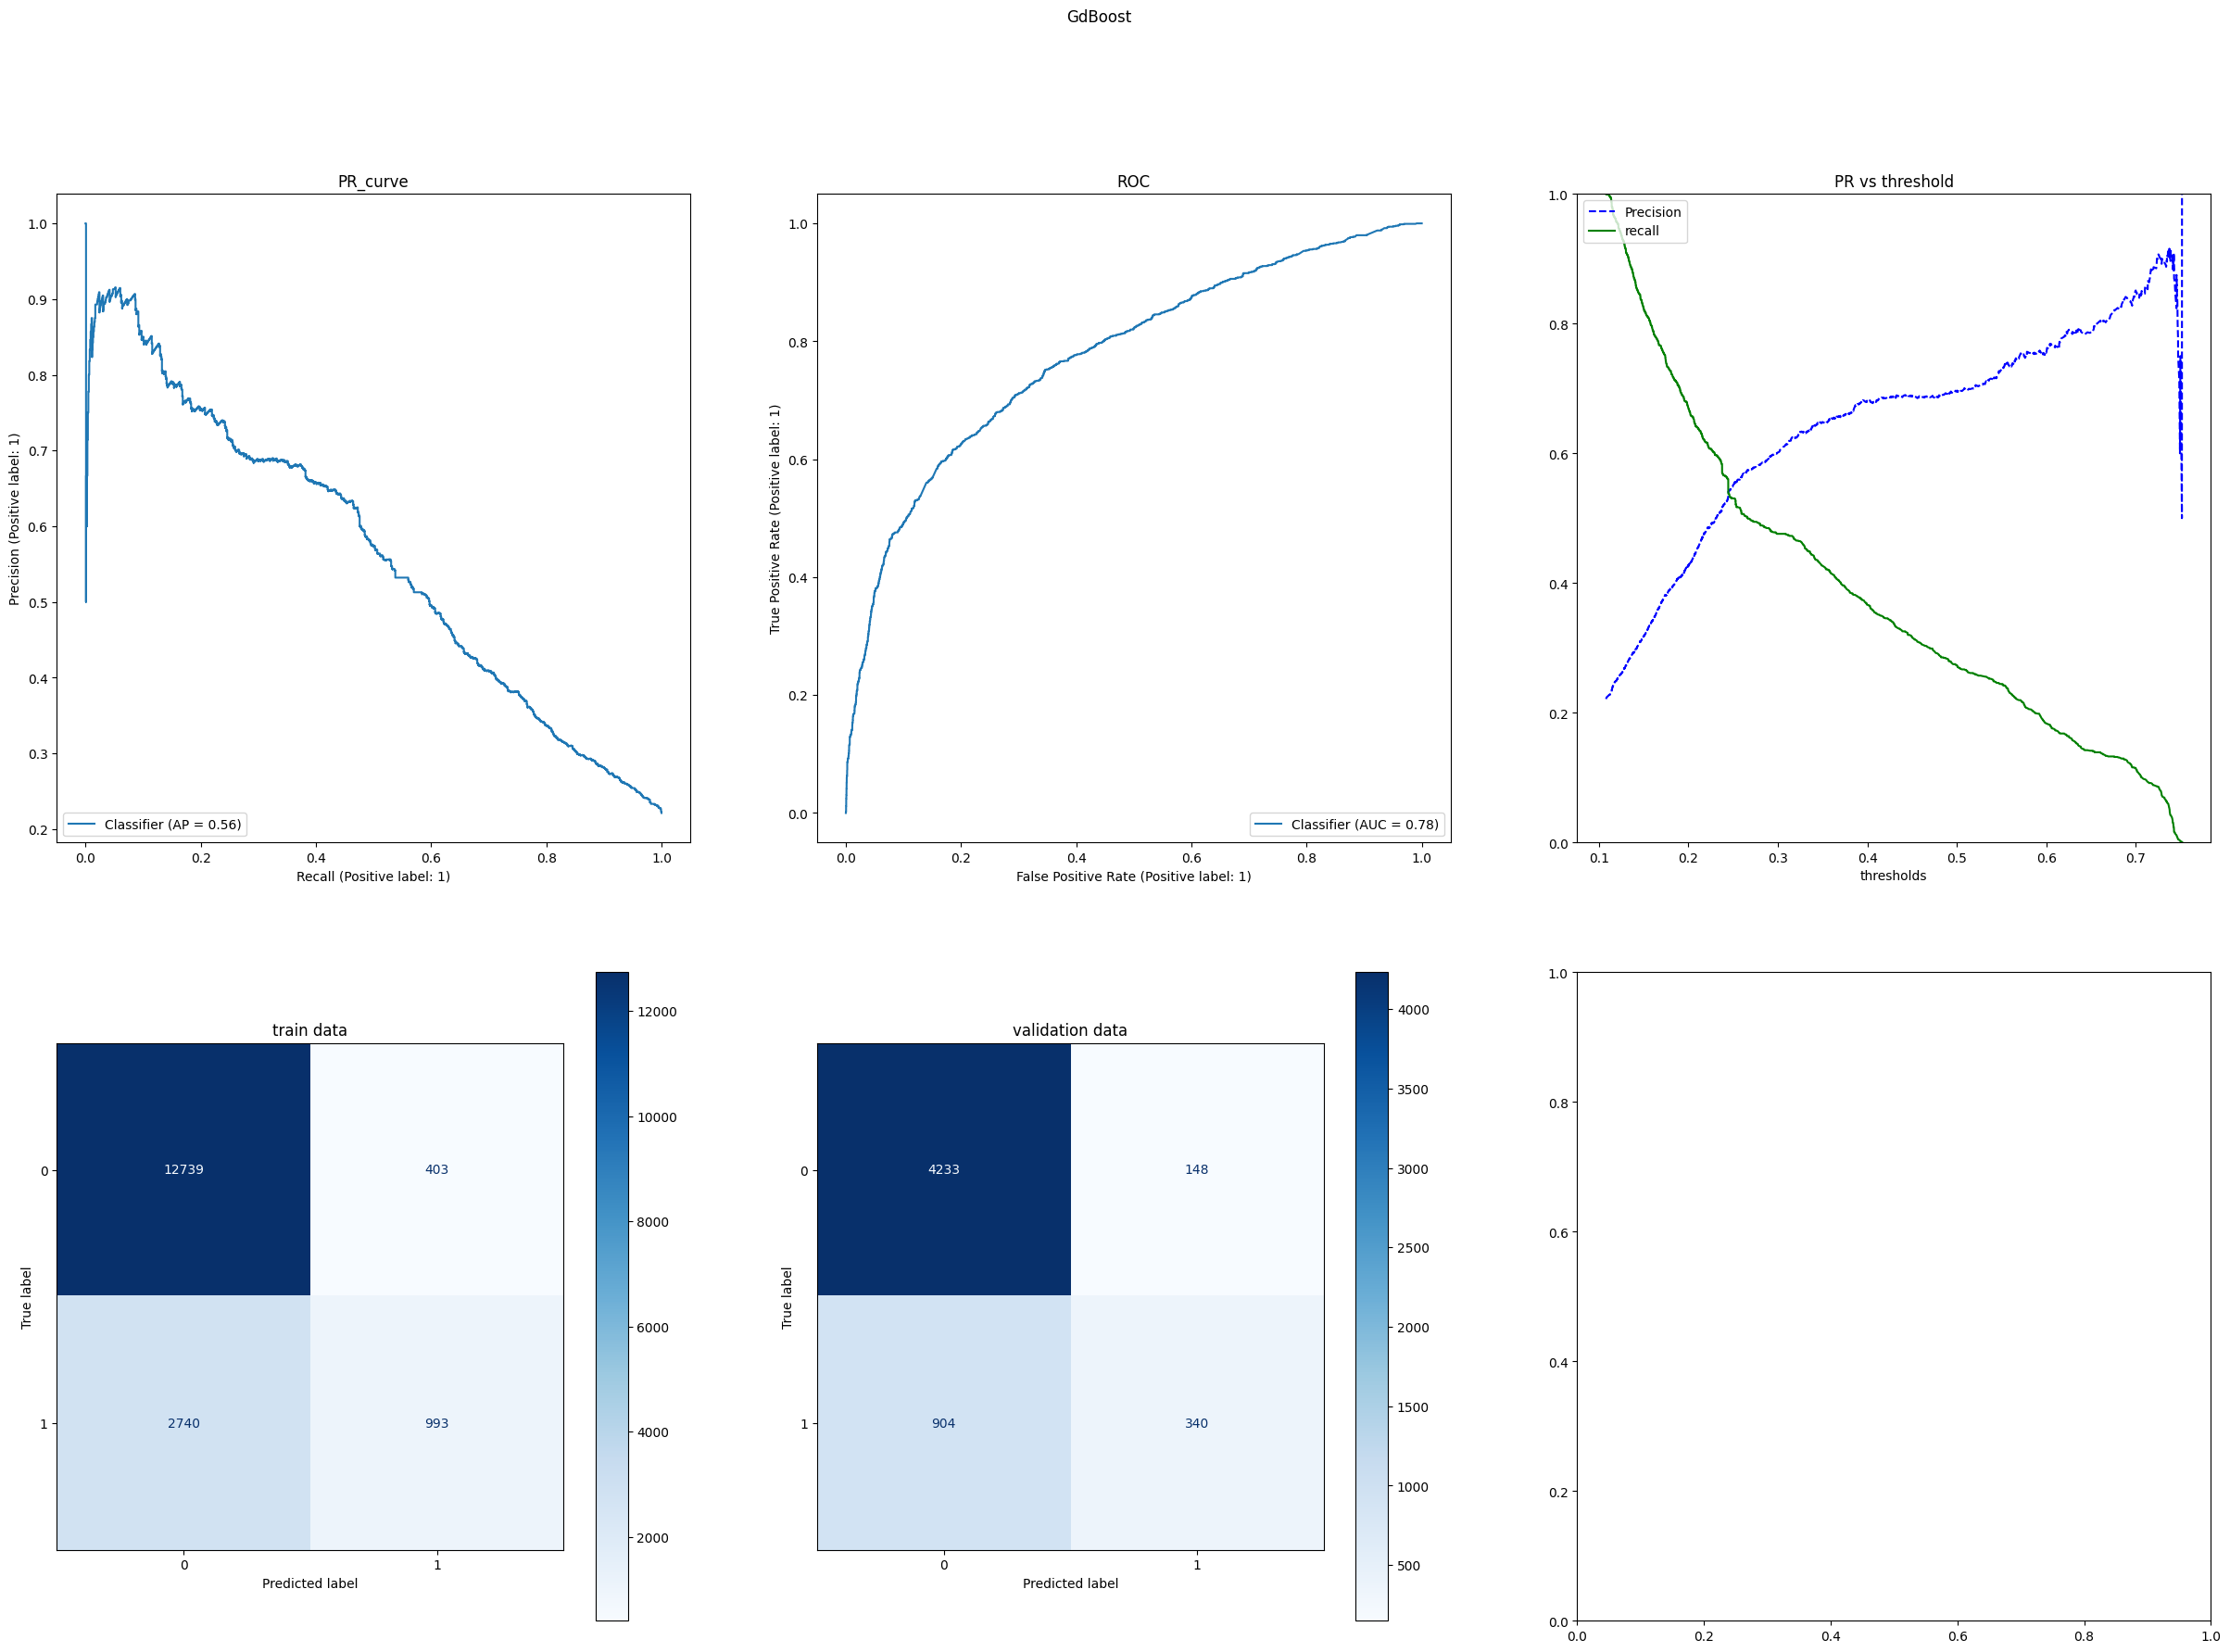

In [61]:

my_base_transform = BasicTransformer(scale="")
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [62]:
case_name = 'non_log,t_series,reg'

print(case_name)

non_log,t_series,reg


Tree
[[4088  293]
 [ 769  475]]

train scores
accuracy : 0.8283851851851852
precision : 0.6854231280460789
recall : 0.41441200107152426
f1_score: 0.5165275459098497

Val scores
accuracy : 0.8112
precision : 0.6184895833333334
recall : 0.38183279742765275
f1_score: 0.4721669980119285


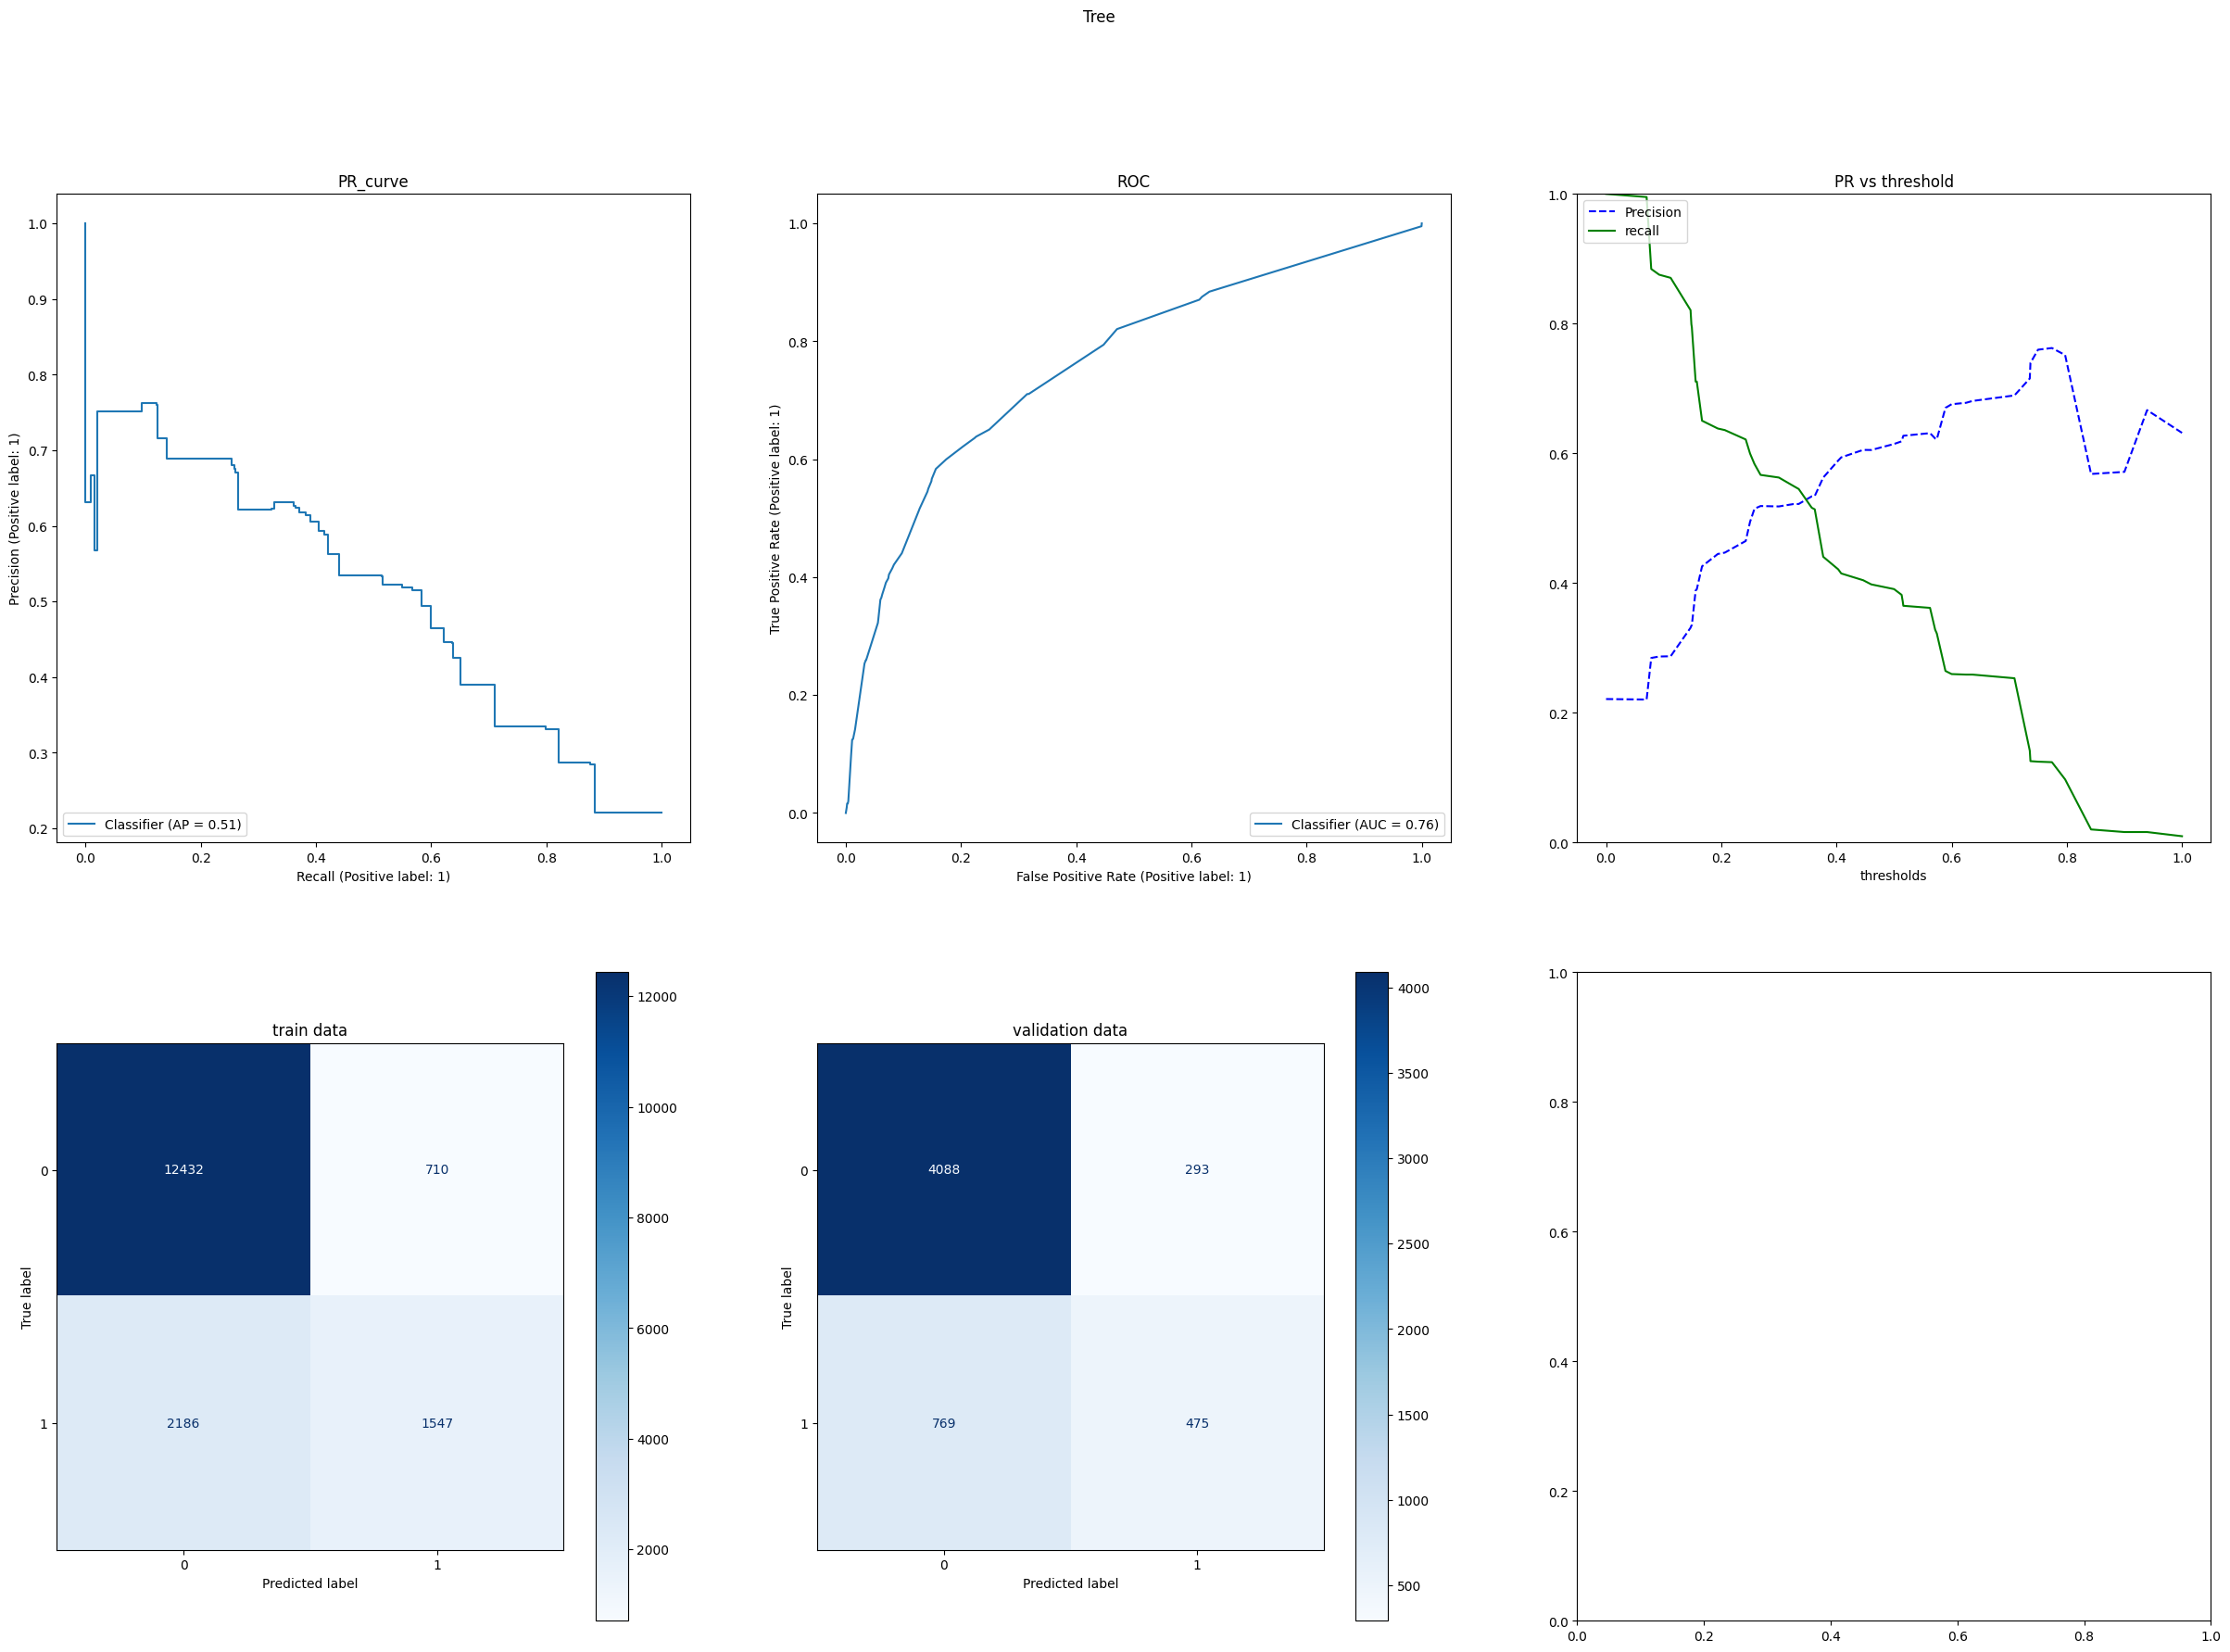

Forest
[[4183  198]
 [ 883  361]]

train scores
accuracy : 0.8213925925925926
precision : 0.7180109157064888
recall : 0.31717117599785694
f1_score: 0.4399851356373095

Val scores
accuracy : 0.8078222222222222
precision : 0.6457960644007156
recall : 0.29019292604501606
f1_score: 0.40044370493621734


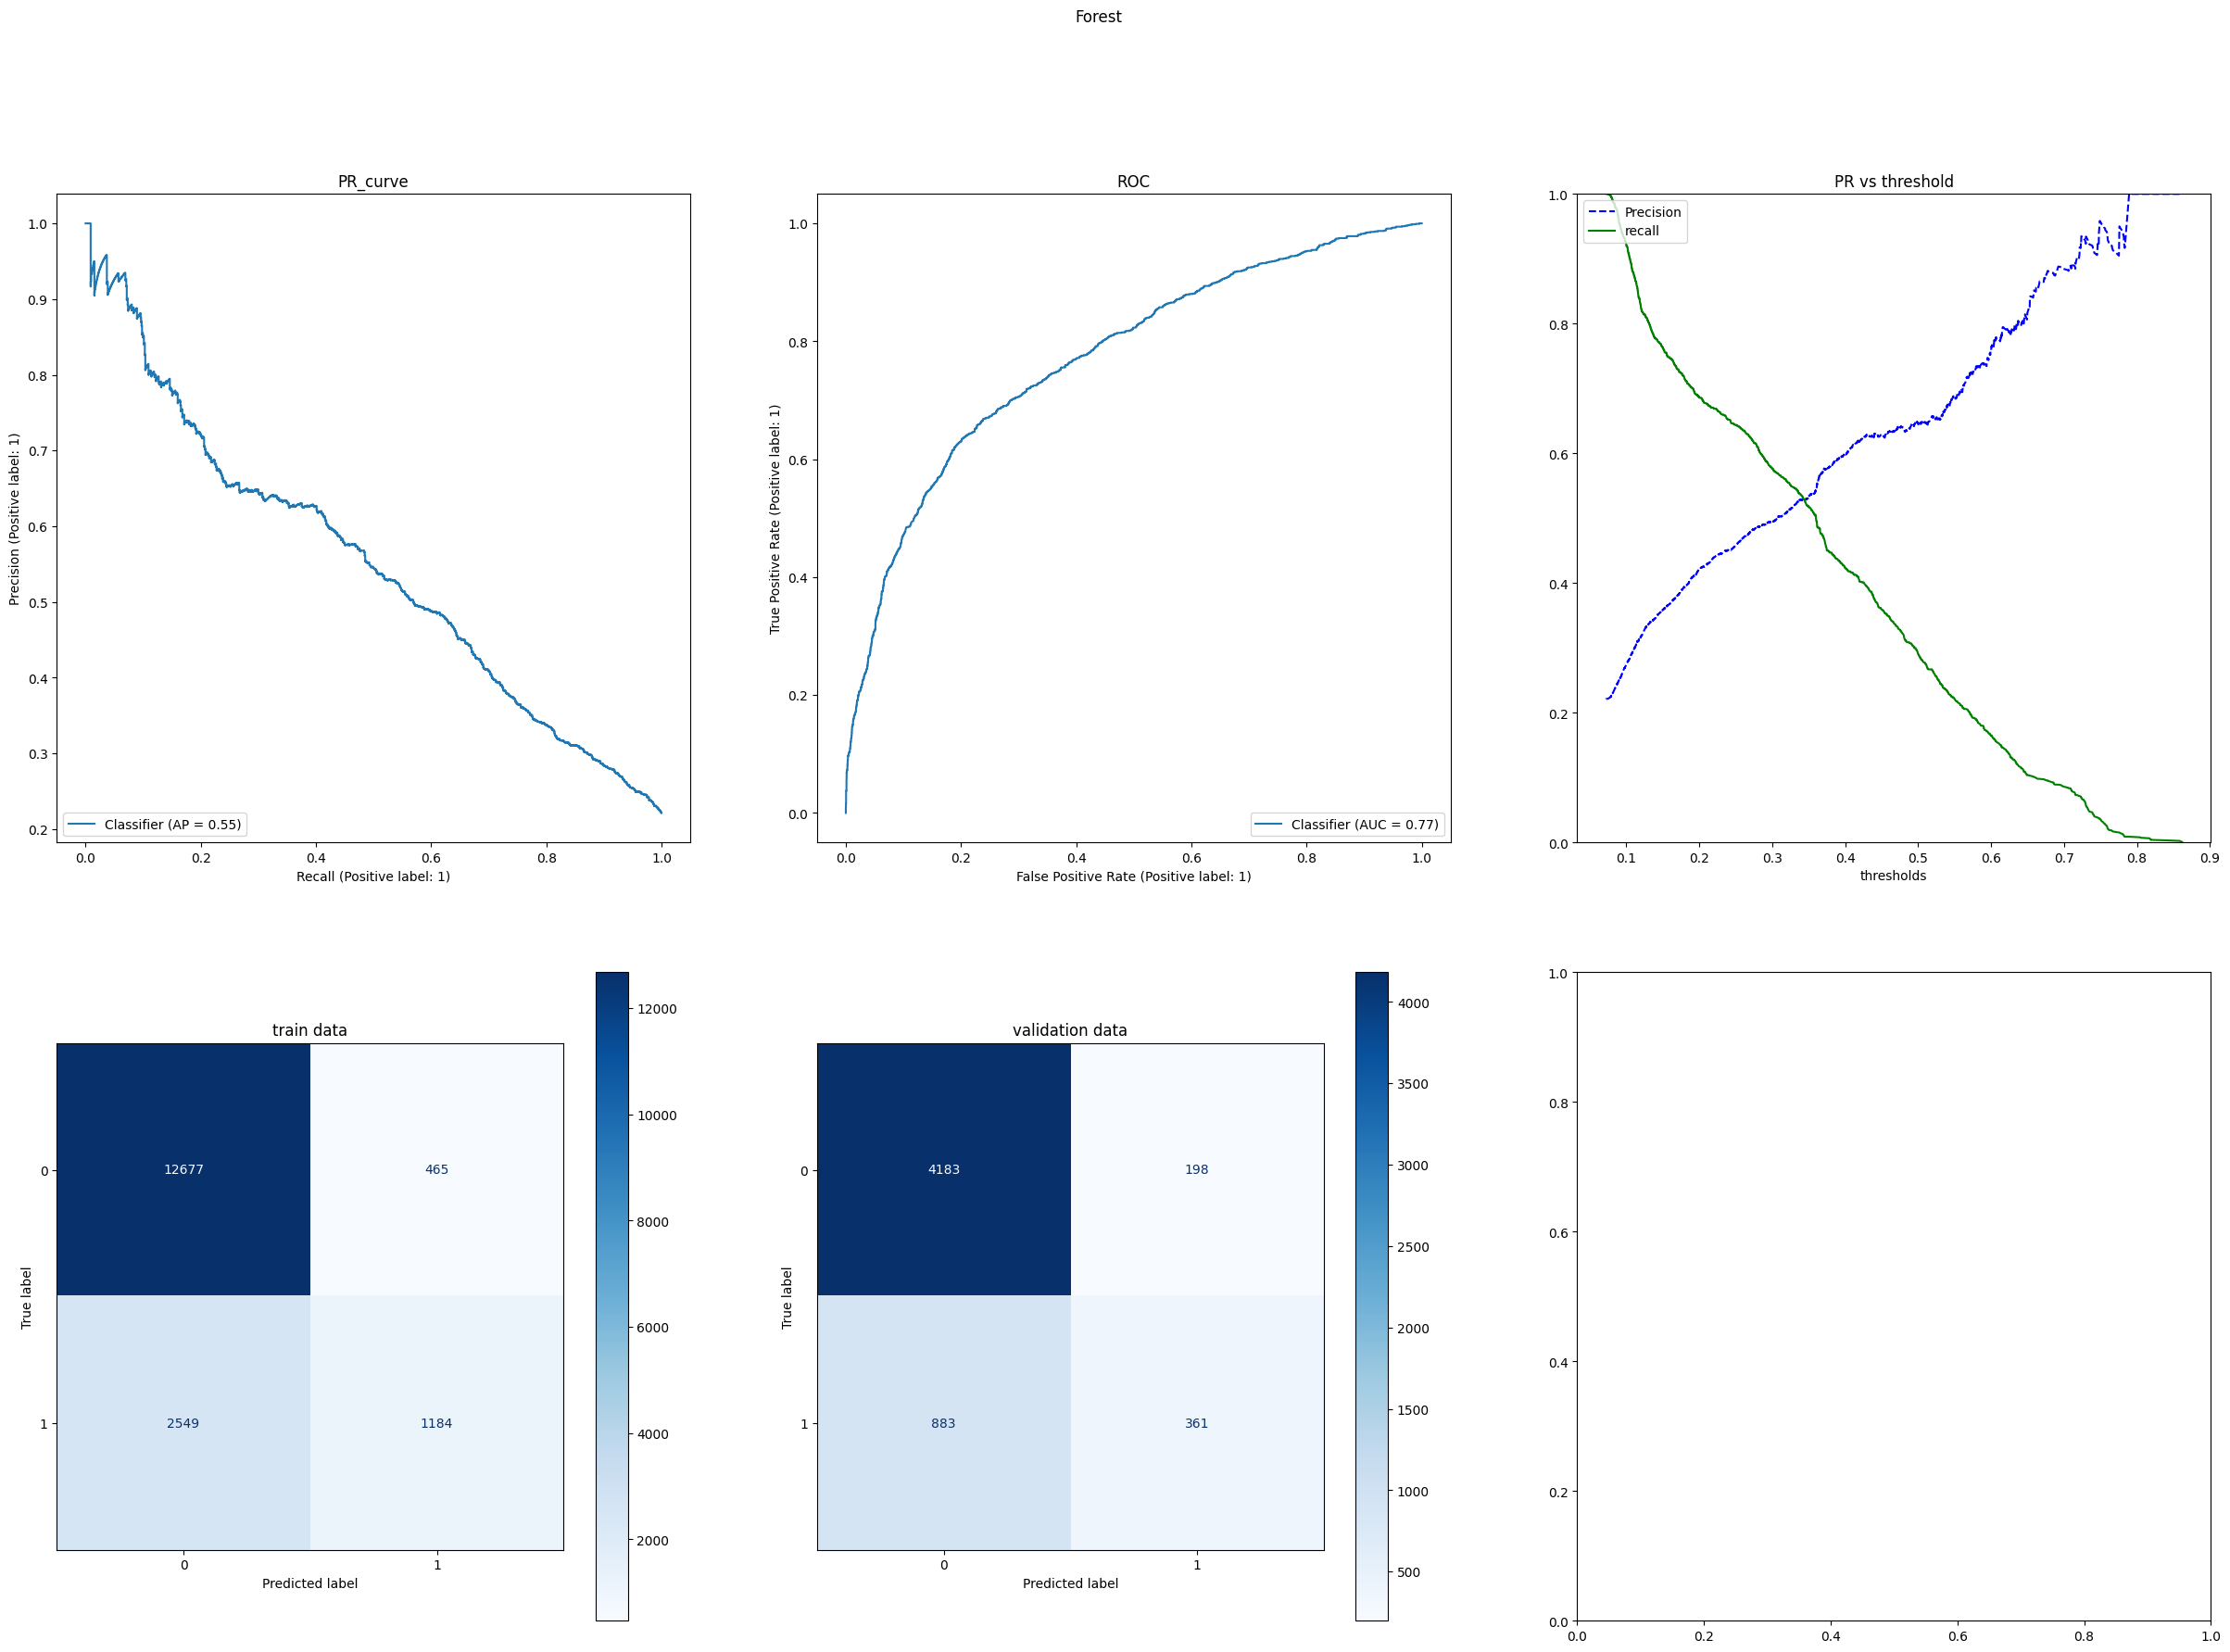

Ada
[[4184  197]
 [ 877  367]]

train scores
accuracy : 0.8097777777777778
precision : 0.6585809581564585
recall : 0.2909188320385749
f1_score: 0.40356744704570796

Val scores
accuracy : 0.8090666666666667
precision : 0.650709219858156
recall : 0.295016077170418
f1_score: 0.4059734513274336


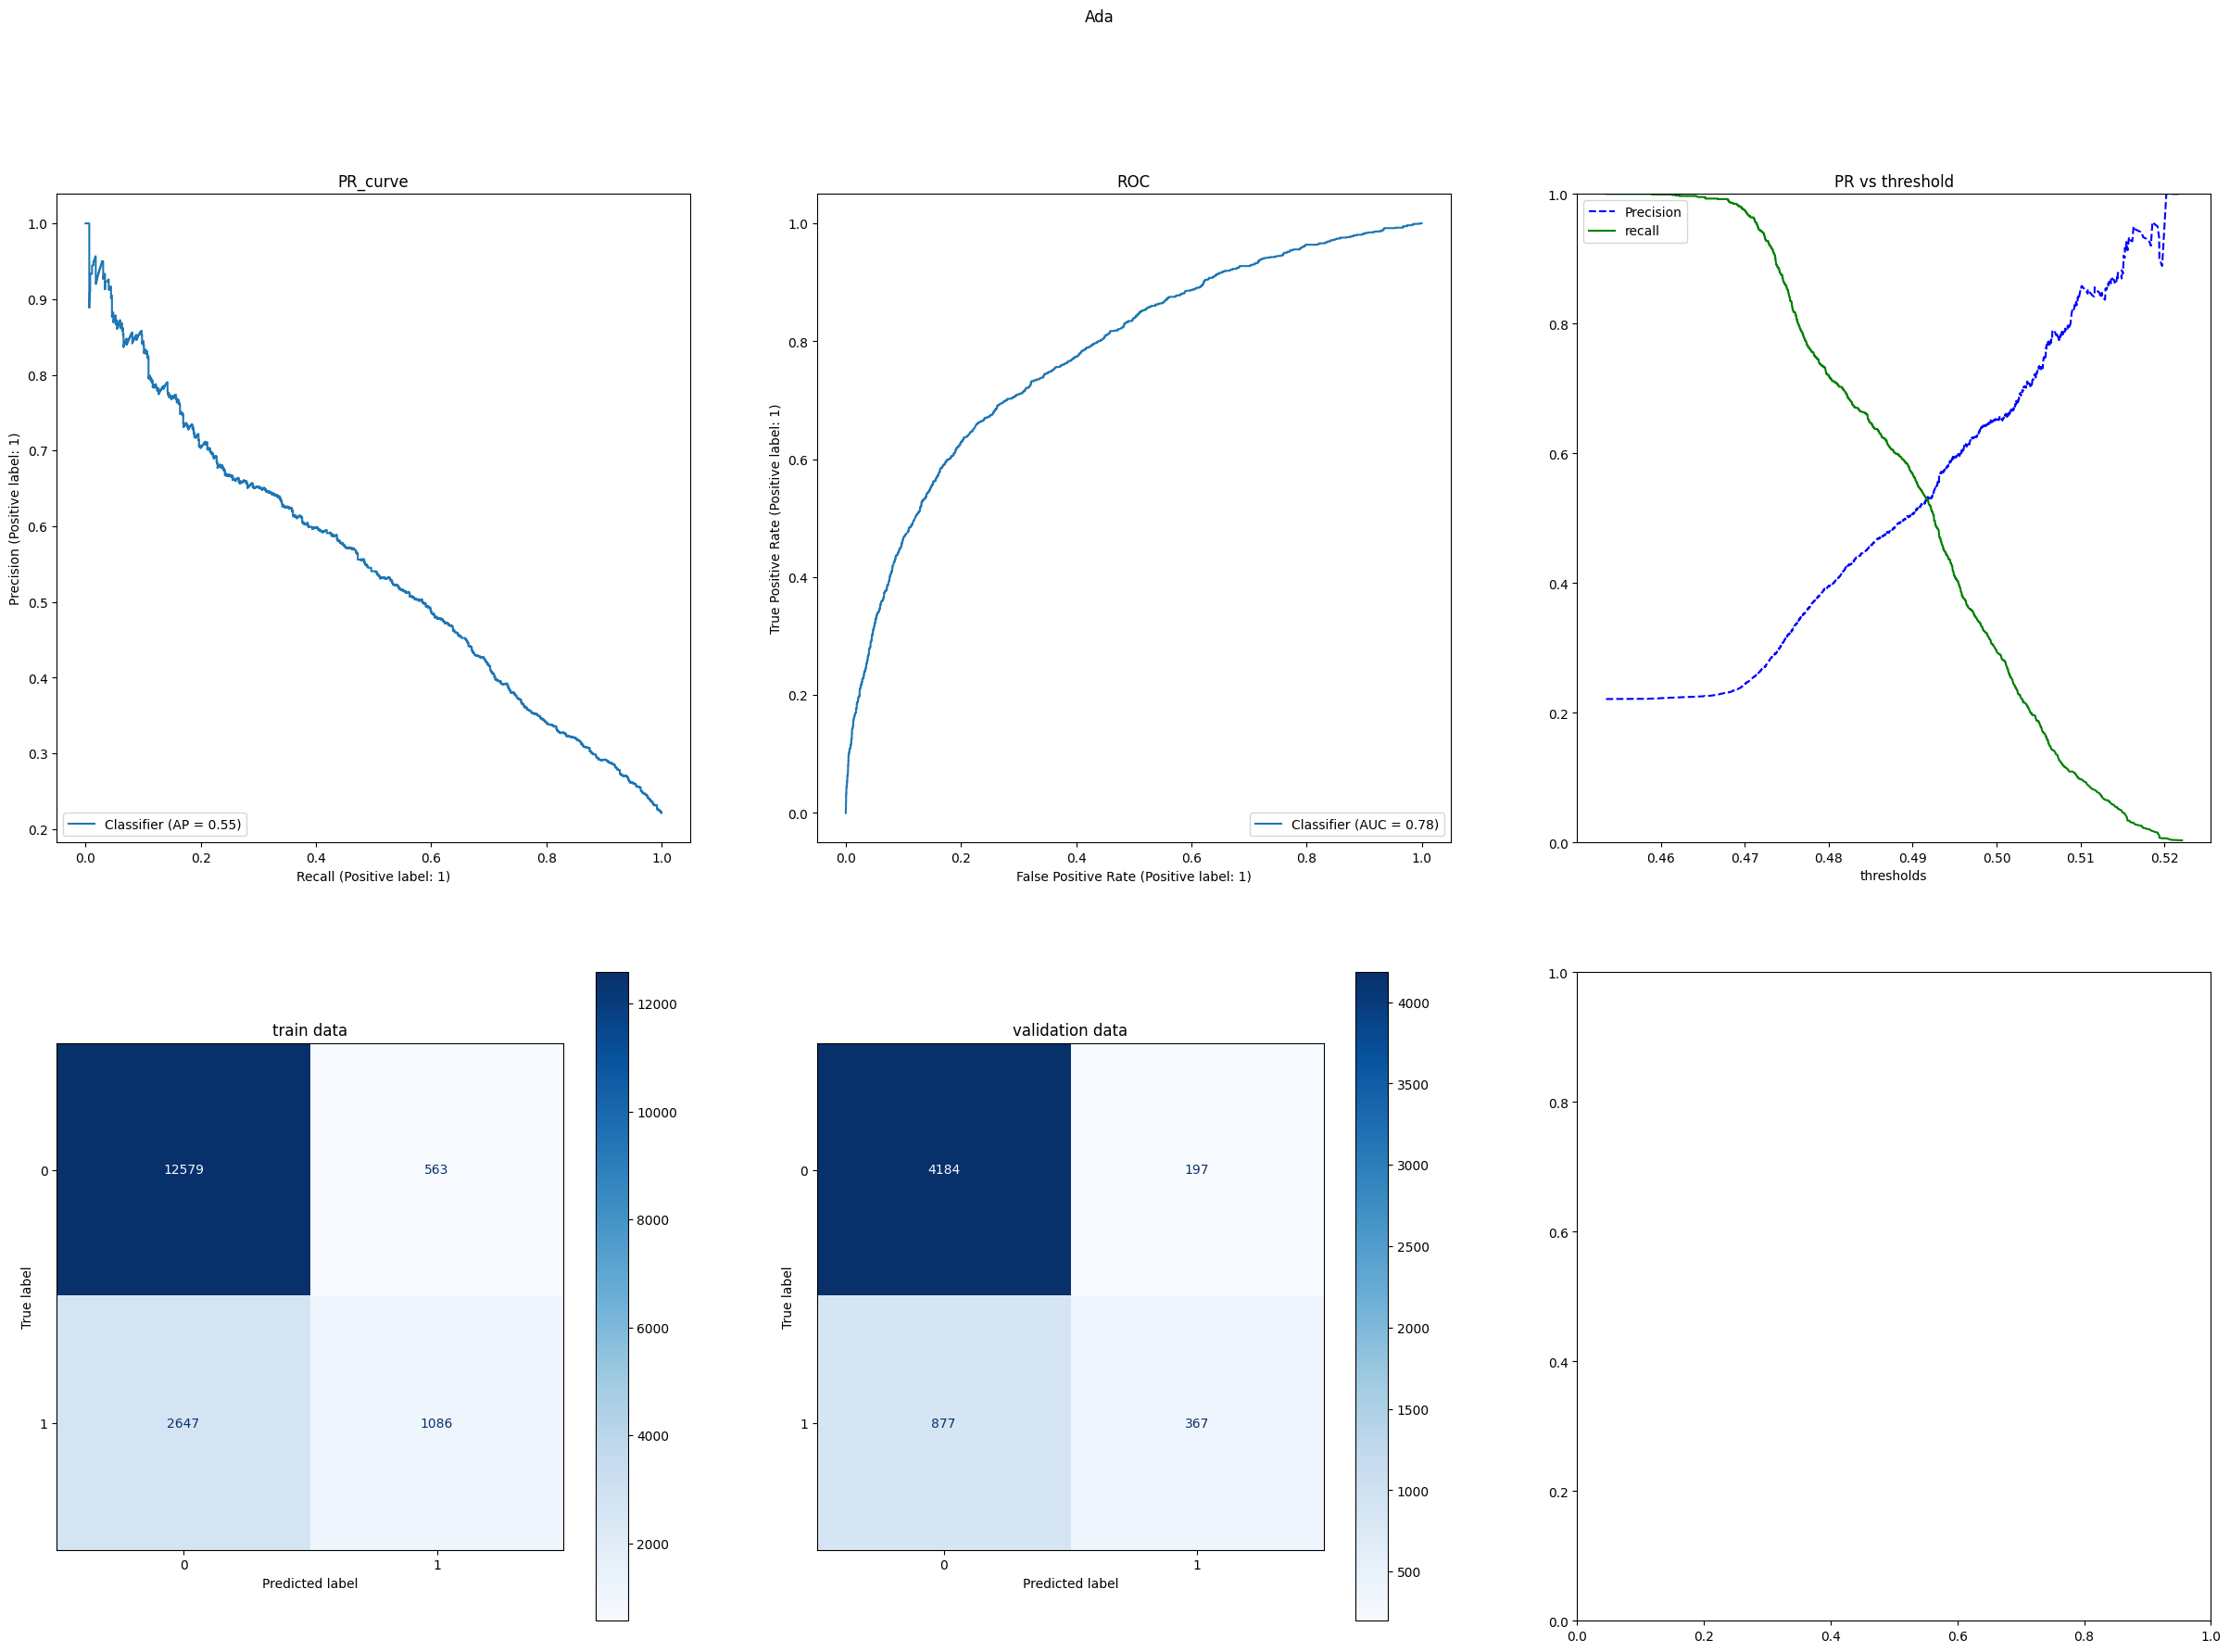

GdBoost
[[4237  144]
 [ 957  287]]

train scores
accuracy : 0.8049185185185185
precision : 0.6734854445318647
recall : 0.2293061880525047
f1_score: 0.34212629896083135

Val scores
accuracy : 0.8042666666666667
precision : 0.665893271461717
recall : 0.23070739549839228
f1_score: 0.3426865671641791


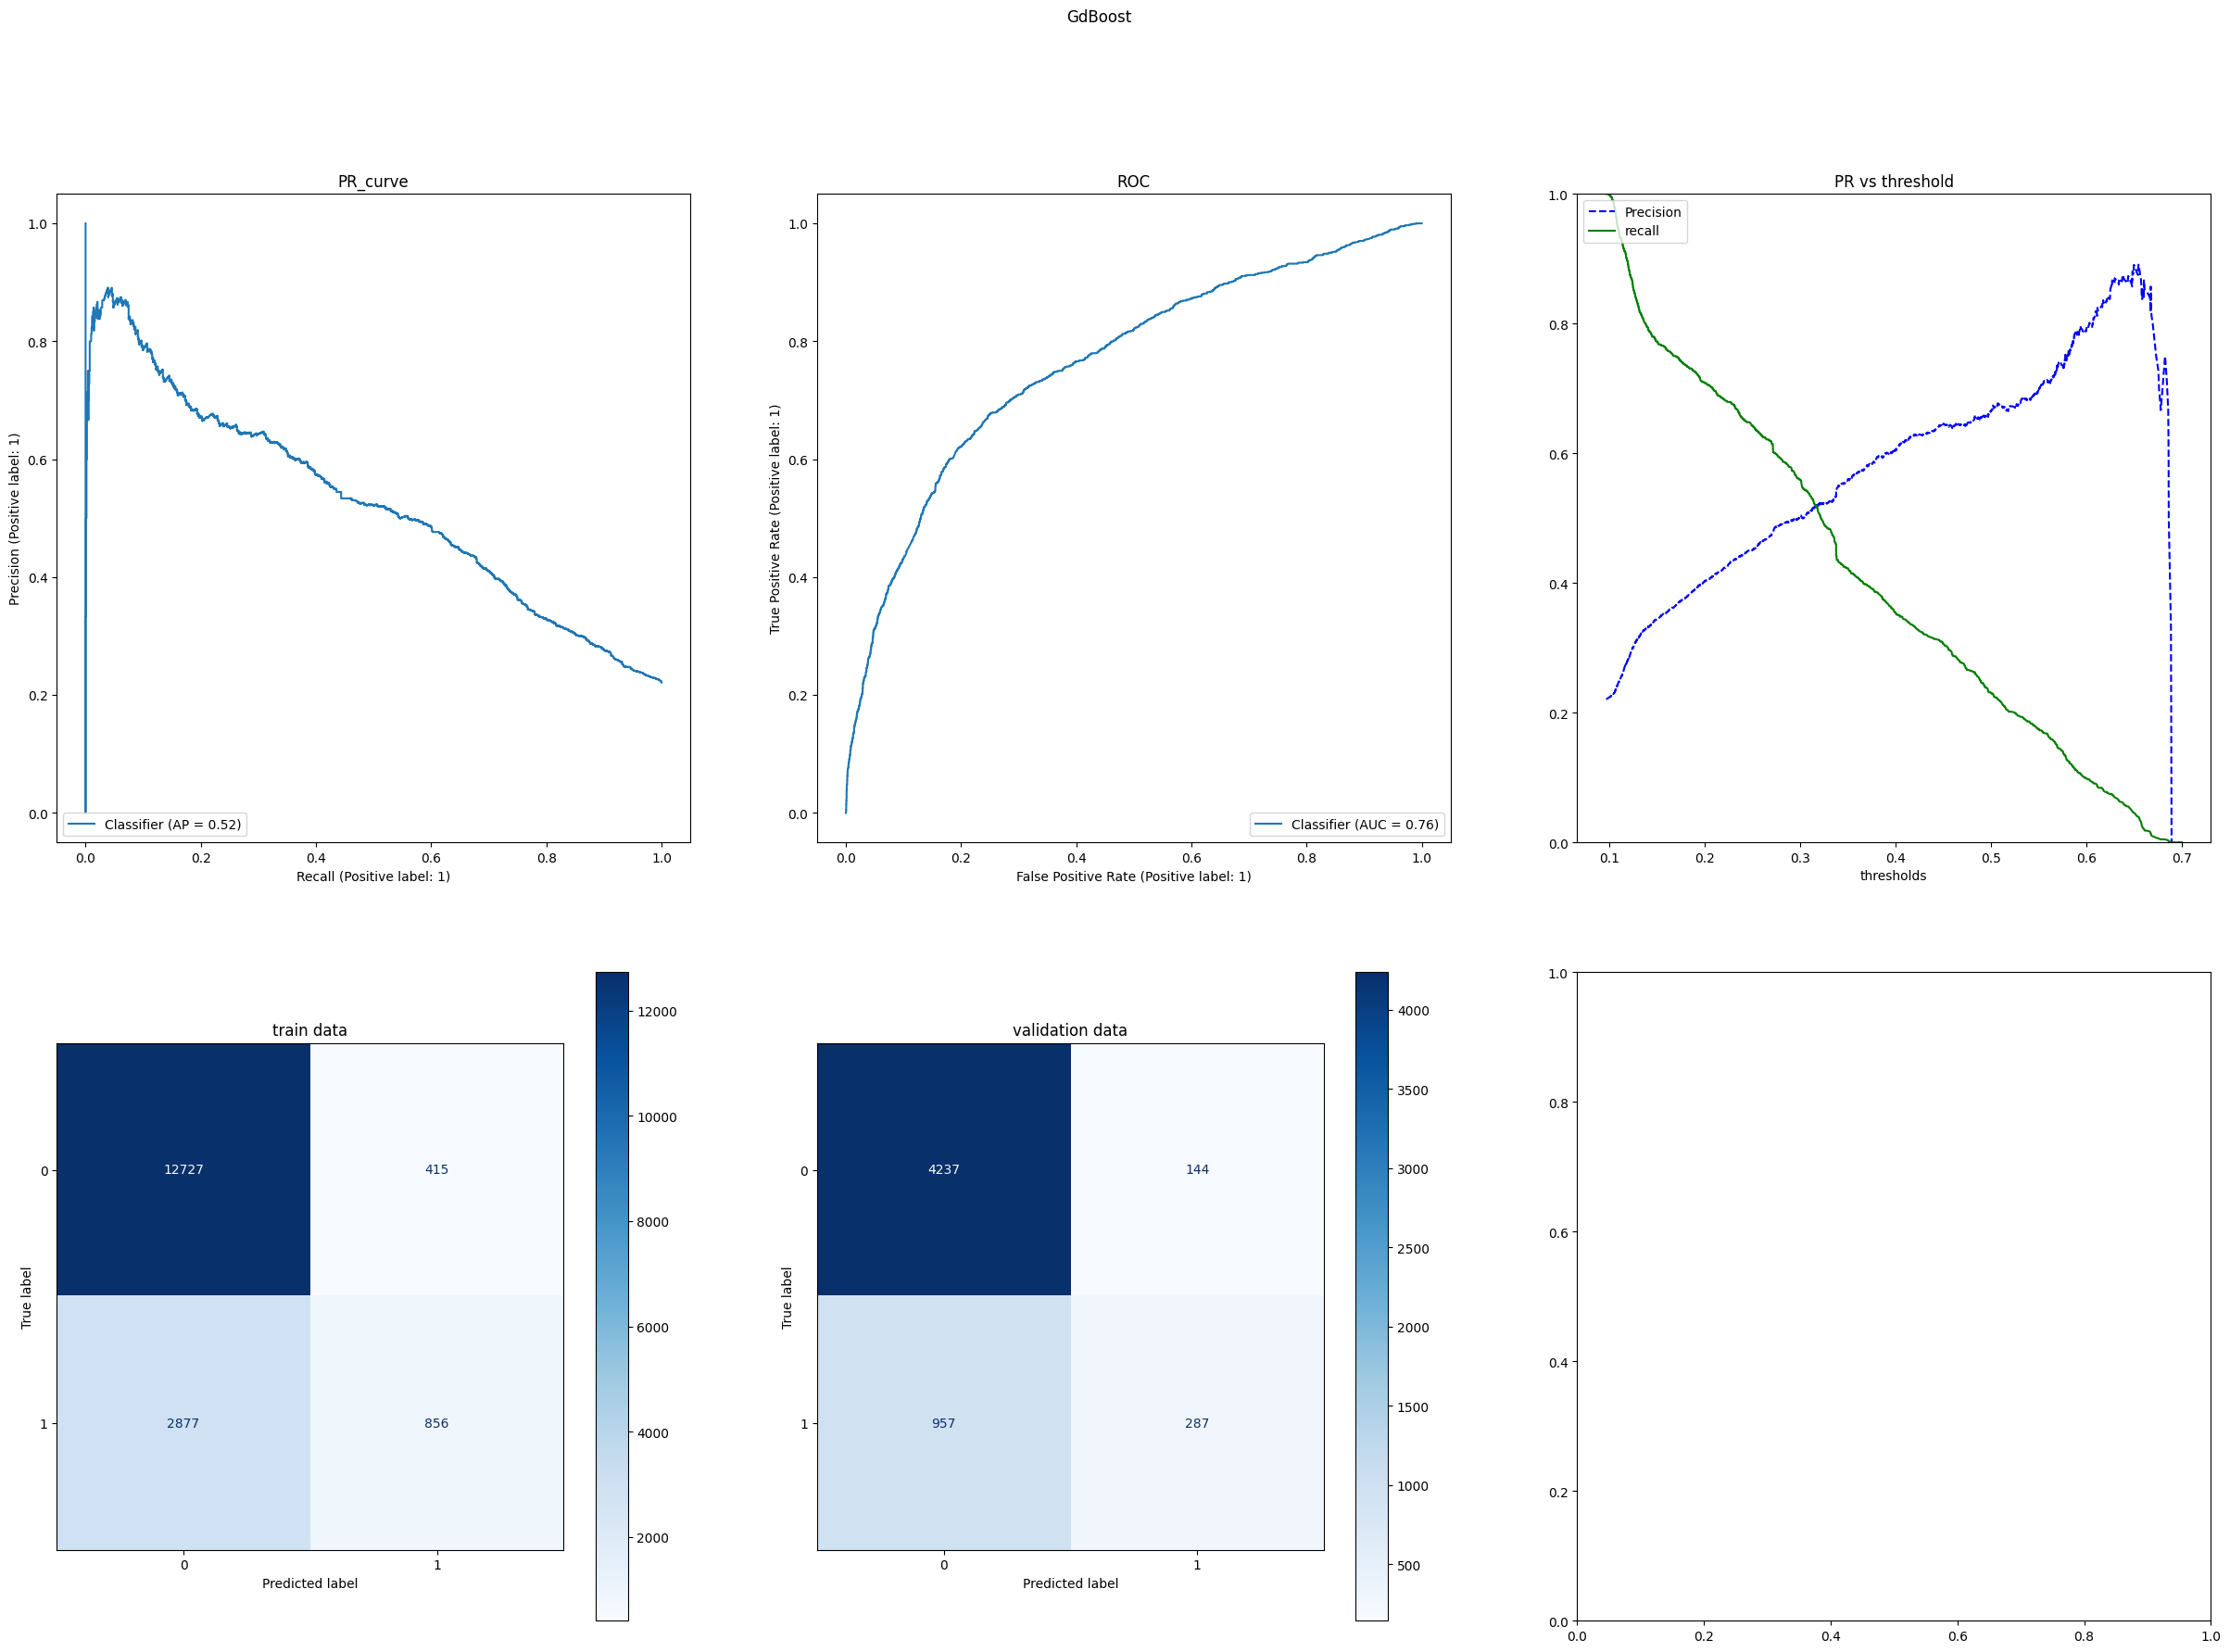

In [63]:

my_base_transform = BasicTransformer(scale="")
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [66]:
V=pd.DataFrame(evals_df_columns)
print(V)

                       0       1       2       3       4
0     t_series,non_regul  0.7374  0.4036  0.3923  0.3979
1     t_series,non_regul  0.8132  0.6271  0.3826  0.4753
2     t_series,non_regul  0.8116  0.6398  0.3384  0.4427
3     t_series,non_regul  0.8140  0.6427  0.3585  0.4603
4          raw,non_regul  0.7252  0.3854  0.4084  0.3966
5          raw,non_regul  0.8174  0.6484  0.3810  0.4800
6          raw,non_regul  0.8212  0.6932  0.3432  0.4591
7          raw,non_regul  0.8229  0.6808  0.3754  0.4839
8           t_series,reg  0.8169  0.6760  0.3304  0.4438
9           t_series,reg  0.8114  0.6575  0.3071  0.4186
10          t_series,reg  0.8108  0.6573  0.3023  0.4141
11          t_series,reg  0.8076  0.6582  0.2709  0.3838
12               raw,reg  0.8219  0.6769  0.3722  0.4803
13               raw,reg  0.8164  0.6874  0.3111  0.4283
14               raw,reg  0.8224  0.7038  0.3400  0.4585
15               raw,reg  0.8130  0.6967  0.2733  0.3926
16       non_log,raw,reg  0.821